---
Online Education Platforms Analysis
---

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Introduction:**
This analysis embarks on a comprehensive examination of the impact of the COVID-19 pandemic on digital learning in the United States. As an experienced data scientist, my goal is to provide educators, policymakers, and academic researchers with valuable insights into how digital learning unfolded during this unprecedented time. Utilizing a rich dataset from LearnPlatform, this study focuses on the engagement patterns in digital learning tools and platforms, scrutinizing their relation to various demographic and geographic factors.

#**Problem Statement:**
The COVID-19 pandemic has led to a seismic shift in educational practices, affecting over 56 million students in the U.S. With the closure of educational institutions in the Spring of 2020, there was a swift pivot to remote teaching through digital platforms. This study seeks to understand the nuances of this transition, exploring the digital divide and the potential long-term learning loss among vulnerable student populations.

#**Overview of the Solution:**
The analysis will involve a thorough exploration of the dataset, ensuring data integrity and addressing any missing values or anomalies.
Descriptive statistics will provide a foundational understanding of the engagement trends.
Advanced visualizations will be employed to uncover patterns and correlations within the data.

#**Dataset Description:**
###**The dataset comprises:**
**1.Engagement Data:**
 Collected through LearnPlatform’s Student Chrome Extension, capturing page load events across 10K+ educational technology products.

**2.Products Info:**
 Detailing the characteristics of the top 372 educational products used in 2020.

**3.Districts Info:**
Providing information on the demographics and characteristics of various school districts, supplemented by NCES and FCC data.

#**Insights and Visualizations:**
**1.State of Digital Learning in 2020:**
Graphical trends illustrating how digital engagement evolved during the year, especially during the COVID-19 peak from May to September 2020.

**2.Comparative Analysis by Geography and Demographics:**
Charts comparing digital engagement across different geographies, racial/ethnic groups, and socioeconomic backgrounds.

**3.Correlation Analysis:**
Heatmaps or scatter plots to explore correlations between digital engagement and state interventions or policies.
Future Predictions and Trends:

Projection of how digital learning might evolve post-pandemic, using the observed data trends.

#**Benefits and Consequences:**
##**Benefits:**
**Educational Strategy:** The insights will aid in shaping future digital learning strategies and policies, especially in times of crisis.

**Resource Allocation:** Helps in identifying areas needing more digital resources or support.

##**Consequences:**
**Data Reliance:** There's a risk of over-reliance on quantitative data, potentially overlooking qualitative aspects of education.

**Potential Biases:** The dataset may have inherent biases, affecting the generalizability of the findings.

#**Strengths & Limitations:**
##**Strengths:**
**Rich Data Source:** The dataset offers a broad spectrum of metrics and a comprehensive view of the digital learning landscape during the pandemic.

**Diverse Perspectives:** Covers a wide range of demographics and geographies, providing a holistic view of the situation.

##**Limitations:**
**Scope of Data:**The dataset might not encapsulate all nuances of the pandemic’s impact on different student groups.

**Interpretation Challenges:**The subjective nature of some data points, like engagement levels, may pose challenges in interpretation.


#**Importing Libraries:**


In [3]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib
from datetime import datetime

---
# Data Definition/Description of districts info

---

**Data Definition:**

A) District information data
* The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab.
 * In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification.
 * For data generalization purposes some data points are released with a range where the actual value falls under.
  * Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset.
  
  ---

In [4]:
# Loading dataset districts_info.csv
districts_dataframe = pd.read_csv('/content/districts_info.csv')

---
**Q: What is the structure of districts info dataset?**

---
| No. | Feature Name | Description of the feature |
| :-- | :--| :--|
|01| **district_id**   | The unique identifier of the school district|
|02| **state** | The state where the district resides in                 |
|03| **locale**   | NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information. |
|04| **pct_black/hispanic** | Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data |
|05| **pct_free/reduced**   | Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data |
|06| **county_connections_ratio**   | ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.|
|07| **pp_total_raw**   | Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.|

In [5]:
# get shape of dataframe
print('Shape of districts info dataset is:', districts_dataframe.shape)

# print summary of dataframe
districts_dataframe.info()

Shape of districts info dataset is: (233, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


**districts info dataset information:**

* There are 233 data points (rows) and 7 feature (column) in districts info dataset.
* There is one numerical column and six columns are of categorical or object type.
* There are missing values (non-null count is not 233) for six columns.

---

---
**Q: What does data looks like for districts info dataset?**

---

In [6]:
# print first 10 rows of dataframe
districts_dataframe.head(10)

district_id           state  locale pct_black/hispanic pct_free/reduced  \
0         8815        Illinois  Suburb           [0, 0.2[         [0, 0.2[   
1         2685             NaN     NaN                NaN              NaN   
2         4921            Utah  Suburb           [0, 0.2[       [0.2, 0.4[   
3         3188             NaN     NaN                NaN              NaN   
4         2238             NaN     NaN                NaN              NaN   
5         5987       Wisconsin  Suburb           [0, 0.2[         [0, 0.2[   
6         3710            Utah  Suburb           [0, 0.2[       [0.4, 0.6[   
7         7177  North Carolina  Suburb         [0.2, 0.4[       [0.2, 0.4[   
8         9812            Utah  Suburb           [0, 0.2[       [0.2, 0.4[   
9         6584  North Carolina   Rural         [0.4, 0.6[       [0.6, 0.8[   

  county_connections_ratio    pp_total_raw  
0                [0.18, 1[  [14000, 16000[  
1                      NaN             NaN  
2                [0.18, 1[    [6000, 8000[  
3                      NaN             NaN  
4                      NaN             NaN  
5                [0.18, 1[  [10000, 12000[  
6                [0.18, 1[    [6000, 8000[  
7                [0.18, 1[   [8000, 10000[  
8                [0.18, 1[    [6000, 8000[  
9                [0.18, 1[   [8000, 10000[

---
**Q: What is the statistics description for districts info dataset?**

---

In [7]:
# print descriptive statistics for both object and numeric type
districts_dataframe.describe(include='all')

district_id        state  locale pct_black/hispanic pct_free/reduced  \
count    233.000000          176     176                176              148   
unique          NaN           23       4                  5                5   
top             NaN  Connecticut  Suburb           [0, 0.2[       [0.2, 0.4[   
freq            NaN           30     104                116               48   
mean    5219.776824          NaN     NaN                NaN              NaN   
std     2595.751581          NaN     NaN                NaN              NaN   
min     1000.000000          NaN     NaN                NaN              NaN   
25%     2991.000000          NaN     NaN                NaN              NaN   
50%     4937.000000          NaN     NaN                NaN              NaN   
75%     7660.000000          NaN     NaN                NaN              NaN   
max     9927.000000          NaN     NaN                NaN              NaN   

       county_connections_ratio   pp_total_raw  
count                       162            118  
unique                        2             11  
top                   [0.18, 1[  [8000, 10000[  
freq                        161             30  
mean                        NaN            NaN  
std                         NaN            NaN  
min                         NaN            NaN  
25%                         NaN            NaN  
50%                         NaN            NaN  
75%                         NaN            NaN  
max                         NaN            NaN

**districts info dataset data description:**

* There are 23 **state**(s) for which data points are available.
* Connecticut **state** has the highest frequency of occurrence.
* **locale** has 4 type(s) for which data points are available.
* Suburb **locale** has the highest frequency of occurrence.
* **pct_black/hispanic** has 5 different range for percentage of students in that district.
* 0,0.2 range for percentage has the highest frequency of occurrence.
* **pct_free/reduced** has 5 different range for percentage of students in that district.
* 0.2,0.4 range for percentage has the highest frequency of occurrence.
* **county_connections_ratio** has 2 different range for ratio of residential fixed high-speed connections at county level.
* 0.18,1 range for ratio has the highest frequency of occurrence.
* **pp_total_raw** has 11 different range for Per-pupil total expenditure
* 6000, 8000 range for Per-pupil total expenditure has the highest frequency of occurrence.

--------

**Handle missing value for districts_data:**

---

In [8]:
#check for missing values
districts_dataframe.isna().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

---
**Q: Are there missing values for all columns in a row?**

---

In [9]:
# check if there are rows for which all columns have missing values
districts_dataframe[districts_dataframe['pp_total_raw'].isna()]

district_id        state locale pct_black/hispanic pct_free/reduced  \
1           2685          NaN    NaN                NaN              NaN   
3           3188          NaN    NaN                NaN              NaN   
4           2238          NaN    NaN                NaN              NaN   
12          1904  Connecticut  Rural           [0, 0.2[         [0, 0.2[   
17          8515          NaN    NaN                NaN              NaN   
..           ...          ...    ...                ...              ...   
218         9536     New York   City           [0.8, 1[         [0.8, 1[   
221         2201  Connecticut   City         [0.4, 0.6[       [0.4, 0.6[   
222         9463          NaN    NaN                NaN              NaN   
231         7975   California   City         [0.6, 0.8[       [0.6, 0.8[   
232         7164   California   City         [0.6, 0.8[       [0.6, 0.8[   

    county_connections_ratio pp_total_raw  
1                        NaN          NaN  
3                        NaN          NaN  
4                        NaN          NaN  
12                 [0.18, 1[          NaN  
17                       NaN          NaN  
..                       ...          ...  
218                [0.18, 1[          NaN  
221                [0.18, 1[          NaN  
222                      NaN          NaN  
231                [0.18, 1[          NaN  
232                [0.18, 1[          NaN  

[115 rows x 7 columns]

* There are rows for which all six columns has missing value (NaN) and so we need to drop those rows.

In [10]:
#drop rows which has missing values for all the six columns
districts_dataframe.dropna(thresh=6, inplace=True)

* Drop rows which has missing value for all six columns as they are not useful for further analysis.

In [11]:
#check for missing values
districts_dataframe.isna().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            22
county_connections_ratio     4
pp_total_raw                50
dtype: int64

**Note:** Need to impute (populate) with relevant values for Missing values in **pct_free/reduced**, **county_connections_ratio** and **pp_total_raw** columns further during analyis as it requires special handling.

----

# Data Analysis/EDA of districts info

---

**districts info dataset data distribution:**

* Explore districts info dataset and check distribution of data with respect to various features (columns)

---

---
**Q: What is the percentage distribution count for locale?**

---

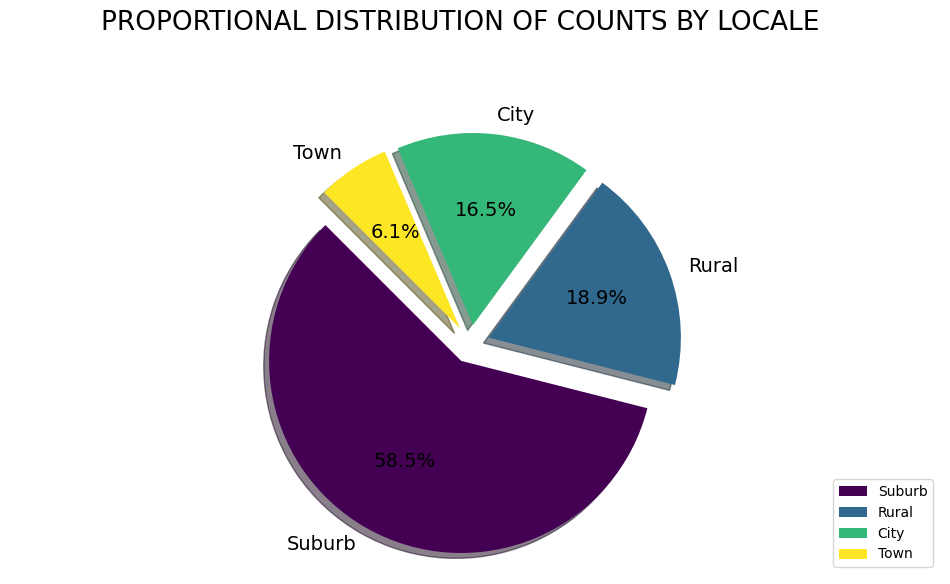

In [12]:
districts_dataframe['locale'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1], fontsize=14, autopct='%3.1f%%',
                                               figsize=(12, 6), shadow=True, startangle=135, legend=False, cmap='viridis')
plt.suptitle(t = 'PROPORTIONAL DISTRIBUTION OF COUNTS BY LOCALE', y = 1.05, size = 19)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = districts_dataframe['locale'].value_counts().index, loc ='lower right', frameon = True)

# Show plot
plt.show()

* **locale** 'Suburb' has majority of data points and then 'Rural' followed by 'City' and 'Town'.

---
**Q: What is the percentage distribution count for state?**

---

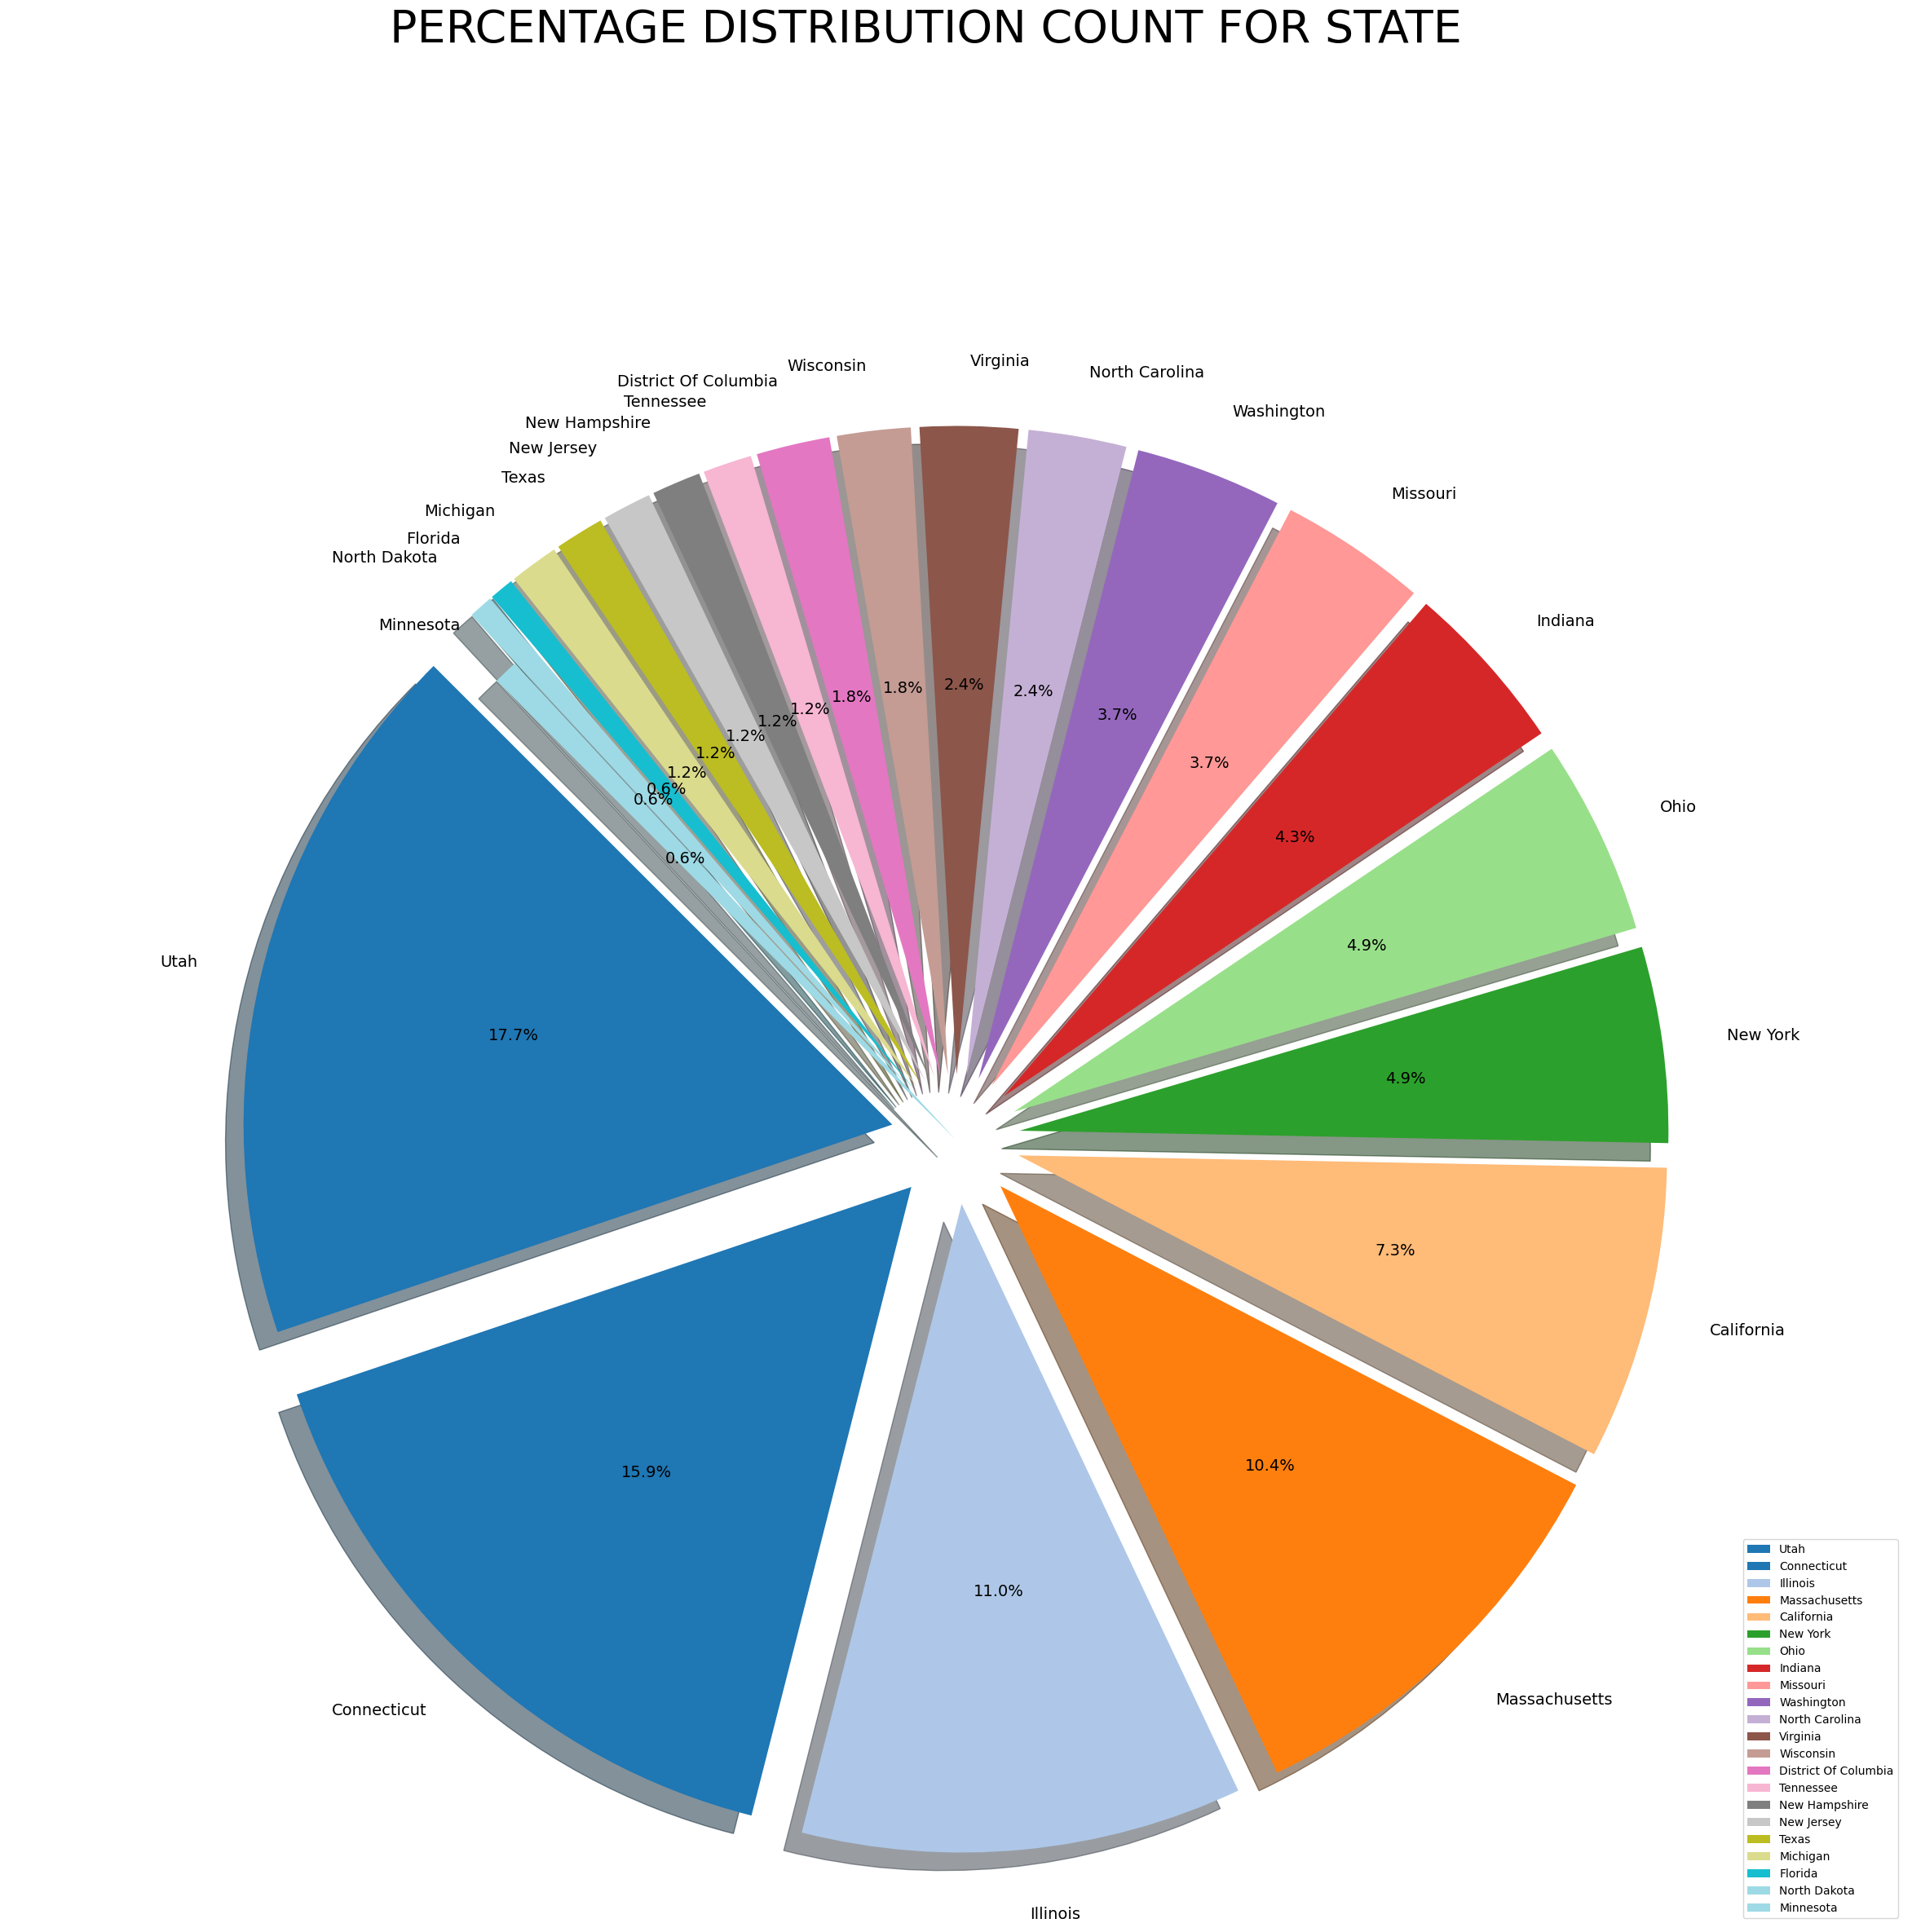

In [13]:
# plot percentage distribution count of state
districts_dataframe['state'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0], fontsize=14, autopct='%3.1f%%',
                                               figsize=(30,25), shadow=True, startangle=135, legend=False, cmap='tab20')
plt.suptitle(t = 'PERCENTAGE DISTRIBUTION COUNT FOR STATE', y = 1.05, size = 40)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = districts_dataframe['state'].value_counts().index, loc ='lower right', frameon = True)
plt.show()

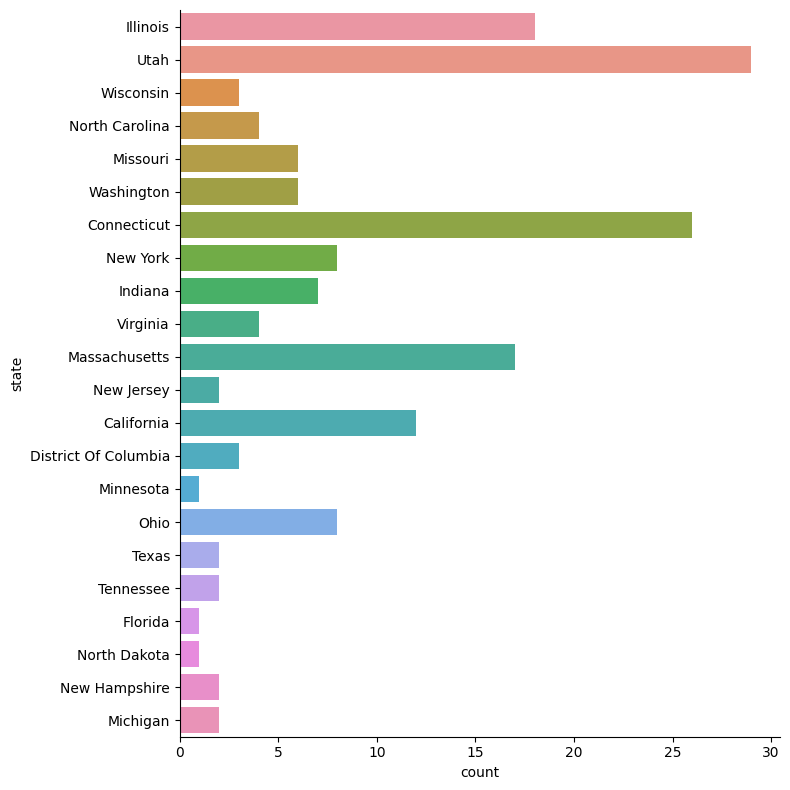

In [14]:
#distribution of count for state
sns.catplot(data=districts_dataframe,y='state', kind='count', height=8, aspect=1)
plt.show()

* Majority of data points are for **state** 'Utah' and 'Connecticut' followed by 'Massachusetts', 'Illinois', 'Ohio and "California'

---
**Q: What is the distribution between state and locale?**

---

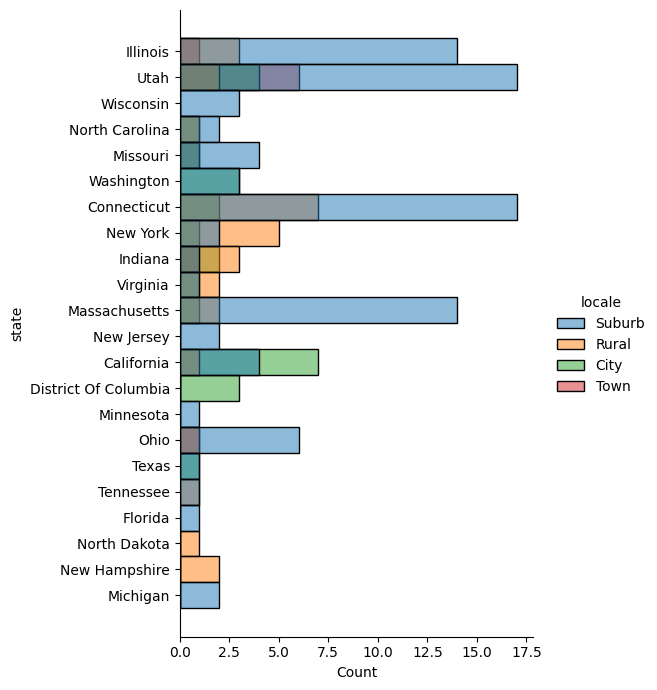

In [15]:
#distribution of state and locale
sns.displot(data=districts_dataframe, y='state', hue='locale', height=7, aspect=0.8)
plt.show()

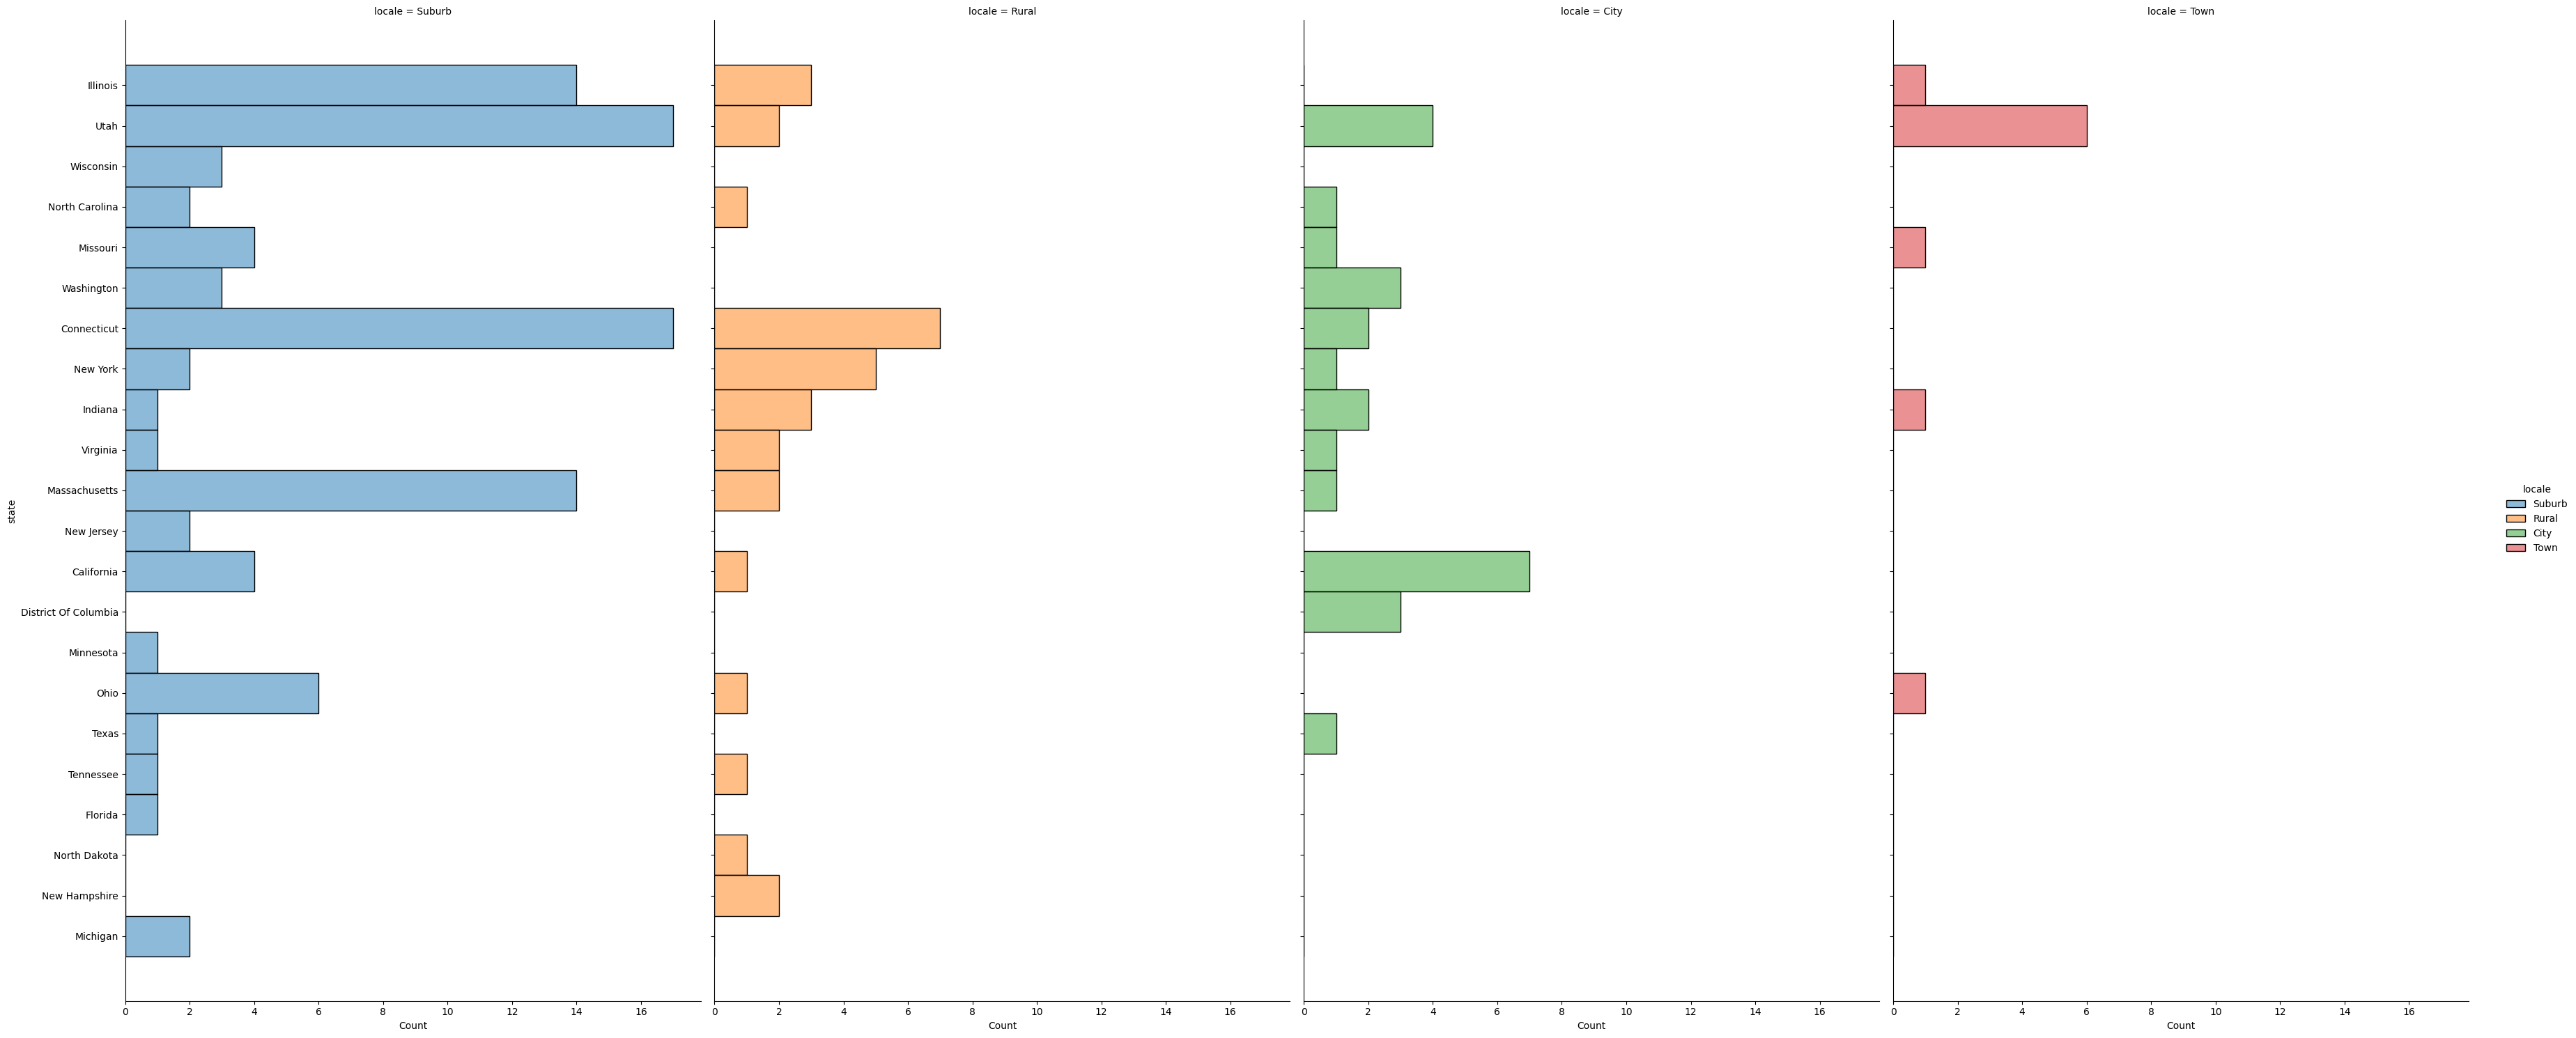

In [16]:
#distribution of state and locale
sns.displot(data=districts_dataframe, y='state', hue='locale', col='locale', height=15, aspect=0.6)
plt.show()

* Above plot shows that state 'Illinois', 'Utah', 'Connecticut', Massachusetts' and 'Ohio' has majority data points for locale 'Suburb'.
* State 'Connecticut', 'New York', Illinois and 'Indiana' has majority data points for locale 'Rural'.
* State 'California', 'Utah', 'Washington' and 'D.C.' has majority data points for locale 'City'.
* State 'Utah' has majority data points for locale 'Town'

---
**Q: What is the distribution for pct_black/hispanic?**

---

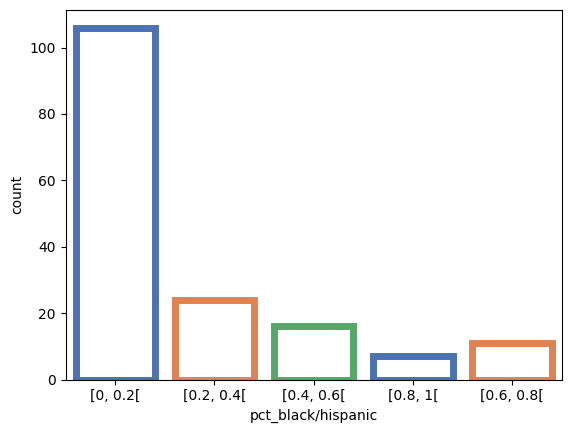

In [17]:
#distribution of count for pct_black/hispanic
sns.countplot(data=districts_dataframe, x='pct_black/hispanic', facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("deep", 3))
plt.show()

* Above plot shows that majority data points is for range 0,0.2 **pct_black/hispanic** percentage

* **pct_black/hispanic** does not have missing values but need to perform extraction/conversion of numeric range value to mean value for percentage value reperesentation.

In [18]:
# process and separate pct_black/hispanic
pct_black_hispanic = districts_dataframe['pct_black/hispanic'].str.split(",",n=1,expand=True)
# extract pct_black and pct_hispanic
districts_dataframe['pct_black']=pct_black_hispanic[0].str.replace('[','',regex=True)
districts_dataframe['pct_hispanic']= pct_black_hispanic[1].str.replace('[','',regex=True)
# convert pct_black and pct_hispanic to numeric
districts_dataframe['pct_black']=pd.to_numeric(districts_dataframe['pct_black'])
districts_dataframe['pct_hispanic']=pd.to_numeric(districts_dataframe['pct_hispanic'])
# combine with mean value
districts_dataframe['pct_black/hispanic']=(districts_dataframe['pct_black'] + districts_dataframe['pct_hispanic'])/2

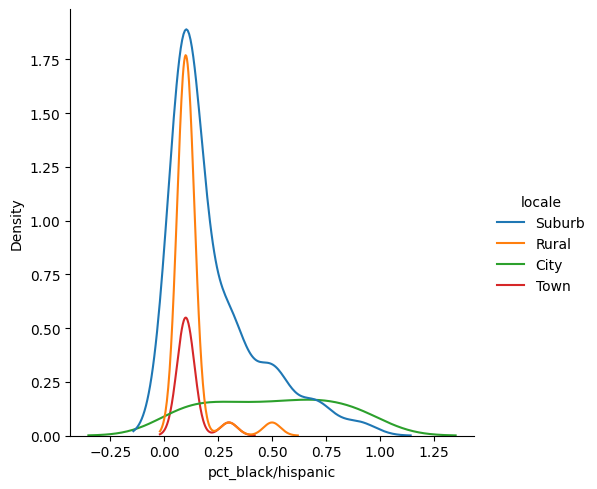

In [19]:
#distribution of pct_black/hispanic with locale
sns.displot(data=districts_dataframe, x='pct_black/hispanic', hue='locale',kind='kde')
plt.show()

* Above plot shows that **locale** 'Suburb' and 'Rural' appears to have majority of data points for **pct_black/hispanic**

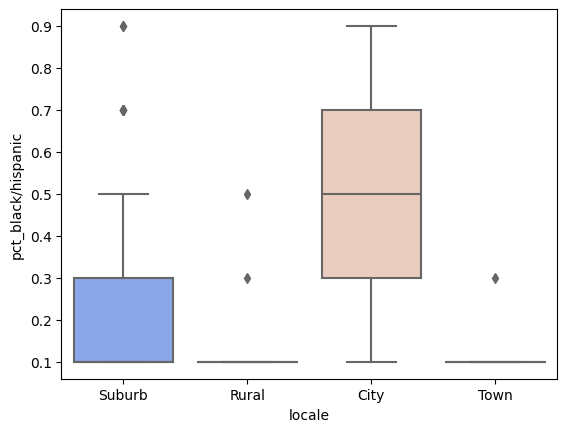

In [20]:
#distribution of pct_black/hispanic by locale
sns.boxplot(x='locale',y='pct_black/hispanic',data=districts_dataframe, palette='coolwarm')
plt.show()

* Above box plot shows that **locale** 'Suburb','Rural' and 'Town' appears to have outlier of data points for **pct_black/hispanic**

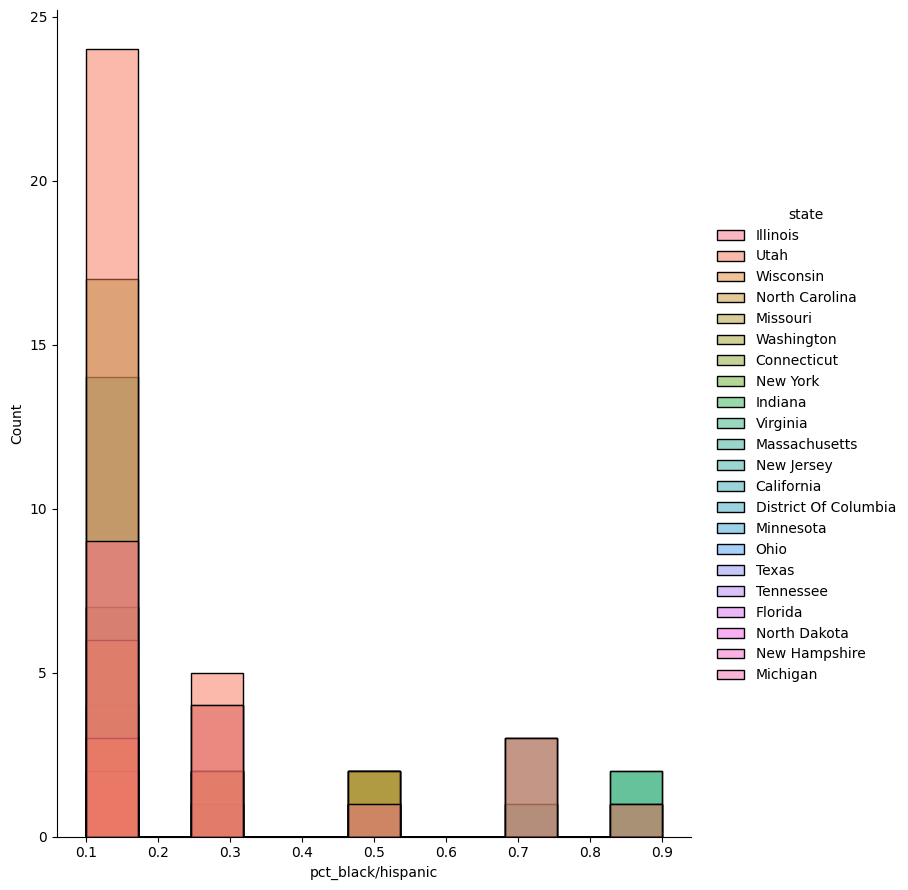

In [21]:
# distribution of pct_black/hispanic with state
sns.displot(data=districts_dataframe, x="pct_black/hispanic", hue='state', height=9, aspect=.8)
plt.show()

* Above plot shows that majority of state in data points has lesser percentage of **pct_black/hispanic** distribution.

---
**Q: What is the distribution for pct_free/reduced?**

---

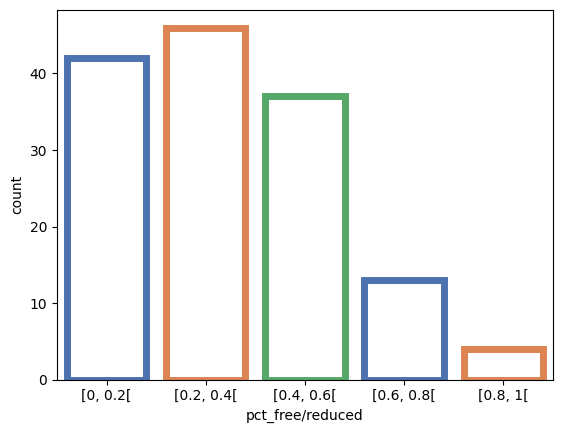

In [22]:
#distribution of count for pct_free/reduced
sns.countplot(data=districts_dataframe, x='pct_free/reduced', facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("deep", 3))
plt.show()

* Above plot shows that majority data points is for **pct_free/reduced** is with range 0.2,0.4 percentage

* **pct_free/reduced** does have missing values so need to impute those with median value and also perform extraction/conversion of numeric range value to mean value for percentage value representation.

In [23]:
pct_free_reduced = districts_dataframe['pct_free/reduced'].str.split(",",n=1,expand=True)

districts_dataframe['pct_free']=pct_free_reduced[0].str.replace('[','',regex=True)
districts_dataframe['pct_reduced']= pct_free_reduced[1].str.replace('[','',regex=True)

districts_dataframe['pct_free']=pd.to_numeric(districts_dataframe['pct_free'])
districts_dataframe['pct_reduced']=pd.to_numeric(districts_dataframe['pct_reduced'])

In [24]:
# populate missing value for pct_free and pct_reduced with median
districts_dataframe['pct_free'].fillna(districts_dataframe['pct_free'].median(), inplace=True)
districts_dataframe['pct_reduced'].fillna(districts_dataframe['pct_reduced'].median(), inplace=True)
#combine pct_free and pct_reduced with mean value
districts_dataframe['pct_free/reduced']=(districts_dataframe['pct_free'] + districts_dataframe['pct_reduced'])/2

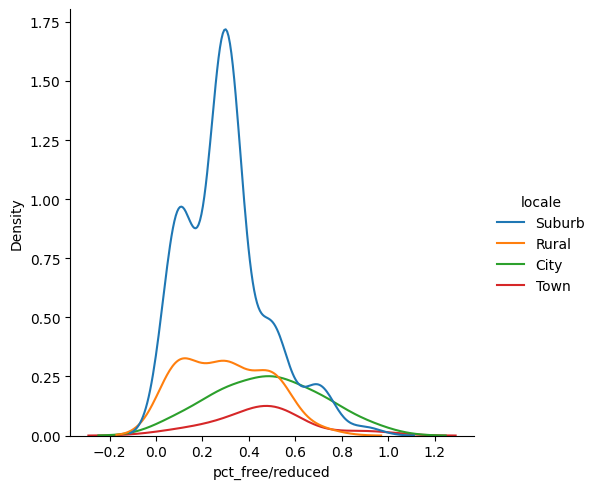

In [25]:
#distribution of pct_free/reduced with locale
sns.displot(data=districts_dataframe, x='pct_free/reduced', hue='locale',kind='kde')
plt.show()

* Above plot shows that **locale** 'Suburb' appears to have majority of data points for **pct_free/reduced**.

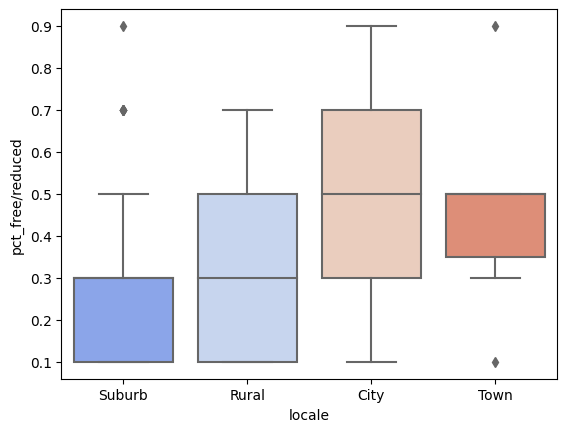

In [26]:
#distribution of pct_free/reduced by locale
sns.boxplot(x='locale',y='pct_free/reduced',data=districts_dataframe, palette='coolwarm')
plt.show()

* Above box plot shows that **locale** 'Suburb' and 'Town' appears to have outlier of data points for **pct_free/reduced**.

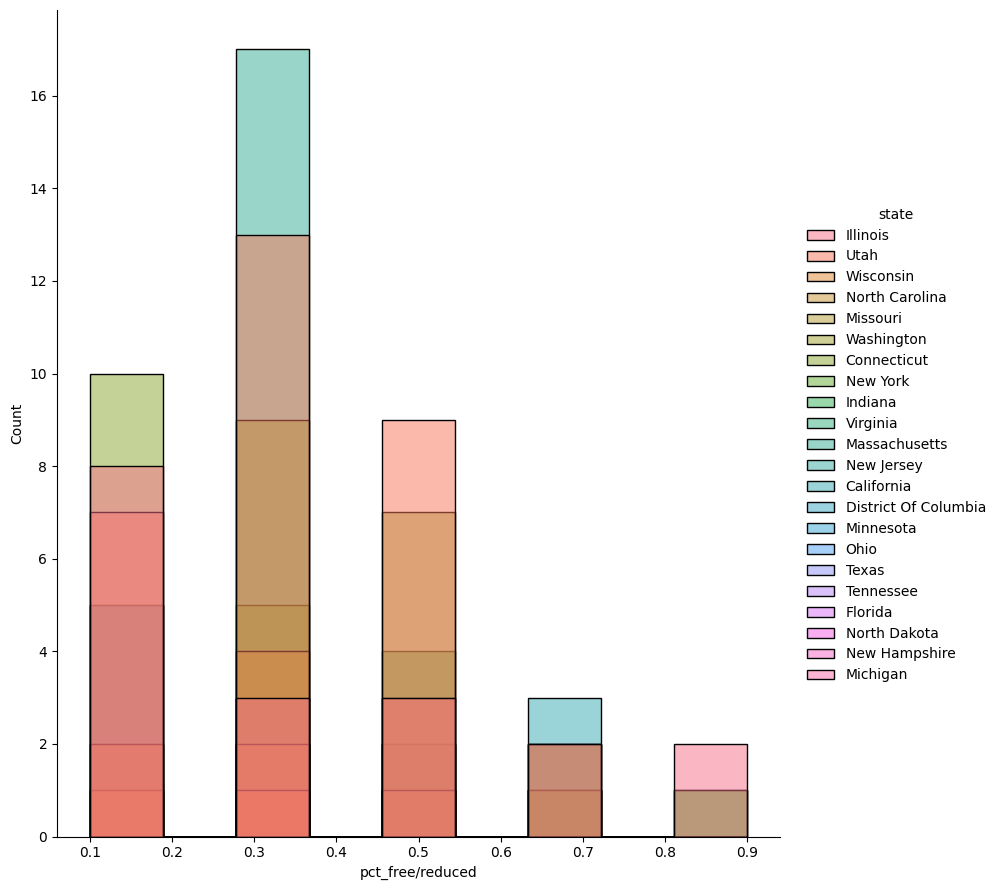

In [27]:
# distribution of pct_free/reduced with state
sns.displot(data=districts_dataframe, x="pct_free/reduced", hue='state', height=9, aspect=.9)
plt.show()

* Above plot shows that most of **state** in data points has average percentage of **pct_free/reduced** distribution.

---
**Q: What is the distribution for county_connections_ratio?**

---

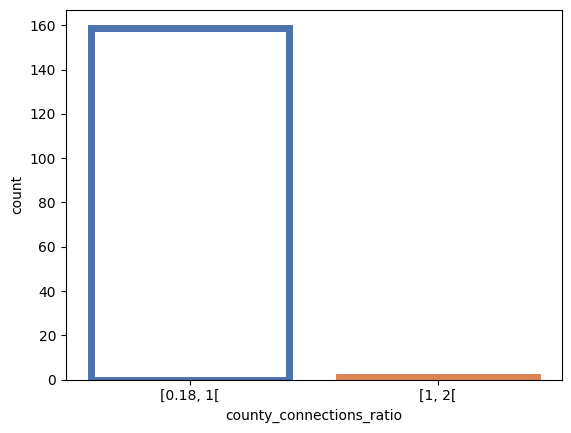

In [28]:
#distribution of count for county_connections_ratio
sns.countplot(data=districts_dataframe, x='county_connections_ratio', facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("deep", 3))
plt.show()

* Above plot shows that majority data points for **county_connections_ratio** is with range 0.18,1 ratio

* **county_connections_ratio** does have missing values so need to impute those with median value and also perform extraction/conversion of numeric range value to mean value for ratio value representation.

In [29]:
# process and separate county_connections_ratio
county_connections_ratio = districts_dataframe['county_connections_ratio'].str.split(",",n=1,expand=True)
#extract county and connections value
districts_dataframe['county']=county_connections_ratio[0].str.replace('[','',regex=True)
districts_dataframe['connections']= county_connections_ratio[1].str.replace('[','',regex=True)
# convert county and connections to numeric
districts_dataframe['county']=pd.to_numeric(districts_dataframe['county'])
districts_dataframe['connections']=pd.to_numeric(districts_dataframe['connections'])

In [30]:
# populate missing value for county and connections with median
districts_dataframe['county'].fillna(districts_dataframe['county'].median(), inplace=True)
districts_dataframe['connections'].fillna(districts_dataframe['connections'].median(), inplace=True)
#combine county and connections with mean value
districts_dataframe['county_connections_ratio'] = (districts_dataframe['county'] + districts_dataframe['connections'])/2

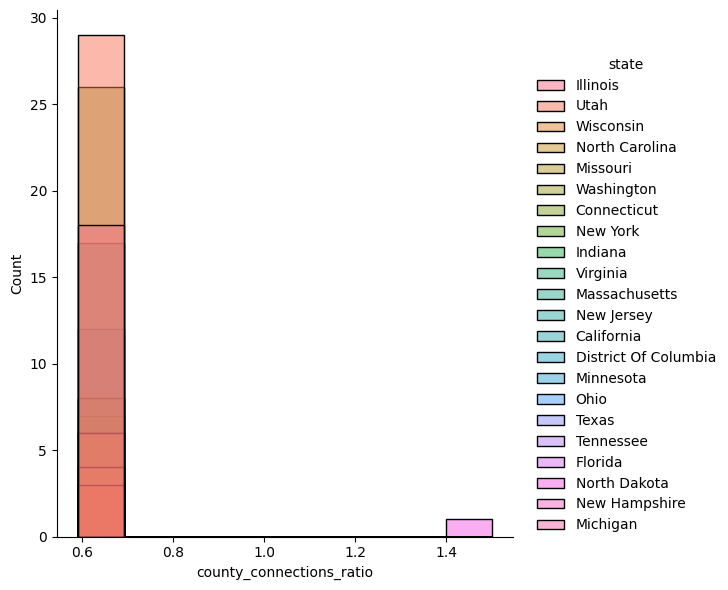

In [31]:
# distribution of county connections ratio with state
sns.displot(data=districts_dataframe, x="county_connections_ratio", hue='state', height=6, aspect=.9)
plt.show()

* Above plot shows that majority of **state** in data points has lesser percentage of **county_connections_ratio** distribution.

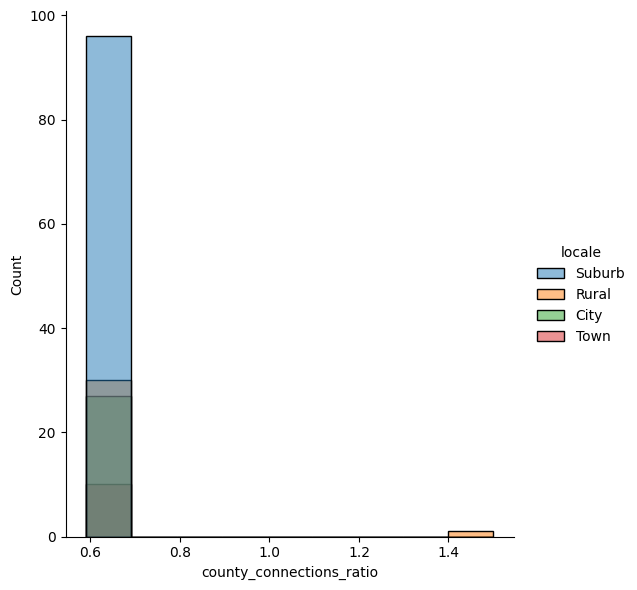

In [32]:
# distribution of county connection ratio with locale
sns.displot(data=districts_dataframe, x="county_connections_ratio", hue='locale', height=6, aspect=.9)
plt.show()

* Above plot shows that **locale** 'Suburb' has majority of data points for **county_connections_ratio** distribution.

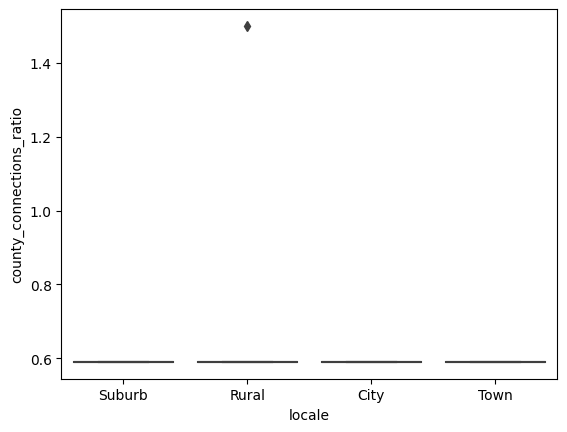

In [33]:
#distribution of county_connections_ratio by locale
sns.boxplot(x='locale',y='county_connections_ratio',data=districts_dataframe, palette='tab20')
plt.show()

* Above box plot shows that **locale** 'Rural' appears to have outlier of data points for **county_connections_ratio** distribution.

---
**Q: What is the distribution for pp_total_raw?**

---

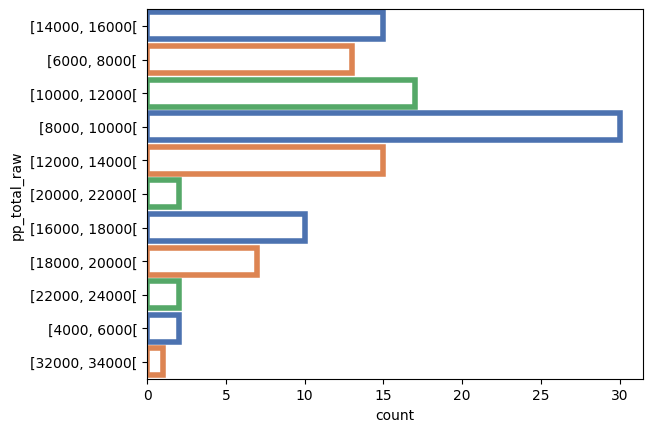

In [34]:
#distribution of count for pp_total_raw
sns.countplot(data=districts_dataframe, y='pp_total_raw', facecolor=(0, 0, 0, 0),linewidth=4,edgecolor=sns.color_palette("deep", 3))
plt.show()

* Above plot shows that majority data points is for range 8000,10000 for total expenditure

* **pp_total_raw** does have missing values so we need to impute those with median value and we will also extract numeric range value to mean value for expenditure.

In [35]:
# process and separate pp_total_raw
pp_total_raw = districts_dataframe['pp_total_raw'].str.split(",",n=1,expand=True)
# extract local and federal expenditure value
districts_dataframe['pp_local']=pp_total_raw[0].str.replace('[','',regex=True)
districts_dataframe['pp_federal']= pp_total_raw[1].str.replace('[','',regex=True)
# convert pp_local and pp_federal to numeric
districts_dataframe['pp_local']=pd.to_numeric(districts_dataframe['pp_local'])
districts_dataframe['pp_federal']=pd.to_numeric(districts_dataframe['pp_federal'])

In [36]:
# populate missing value for pp_local and pp_federal with median
districts_dataframe['pp_local'].fillna(districts_dataframe['pp_local'].median(), inplace=True)
districts_dataframe['pp_federal'].fillna(districts_dataframe['pp_federal'].median(), inplace=True)
# combine with mean value
districts_dataframe['pp_total_raw']=(districts_dataframe['pp_local'] + districts_dataframe['pp_federal'])/2

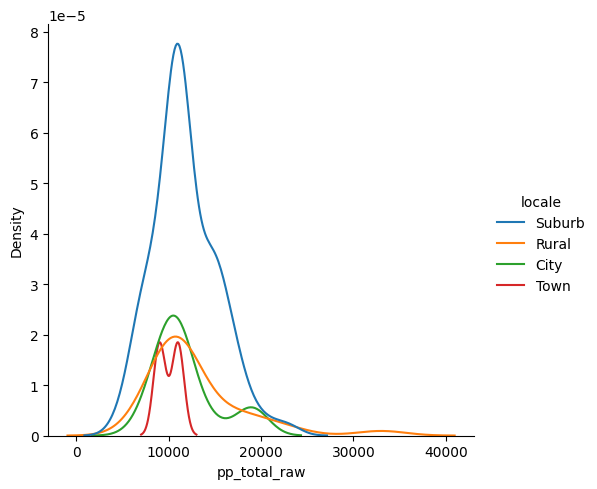

In [37]:
# distribution of pp_total_raw expenditure with locale
sns.displot(data=districts_dataframe, x='pp_total_raw', hue='locale',kind='kde')
plt.show()

* Above plot shows that **locale** 'Suburb' appears to have majority of data points for **pp_total_raw**

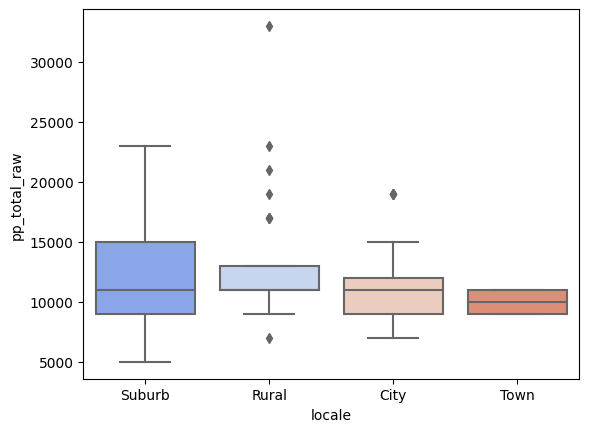

In [38]:
#distribution of pp_total_raw by locale
sns.boxplot(x='locale',y='pp_total_raw',data=districts_dataframe, palette='coolwarm')
plt.show()

* Above box plot shows that **locale** 'Rural' and 'City' appears to have outlier data points for **pp_total_raw**

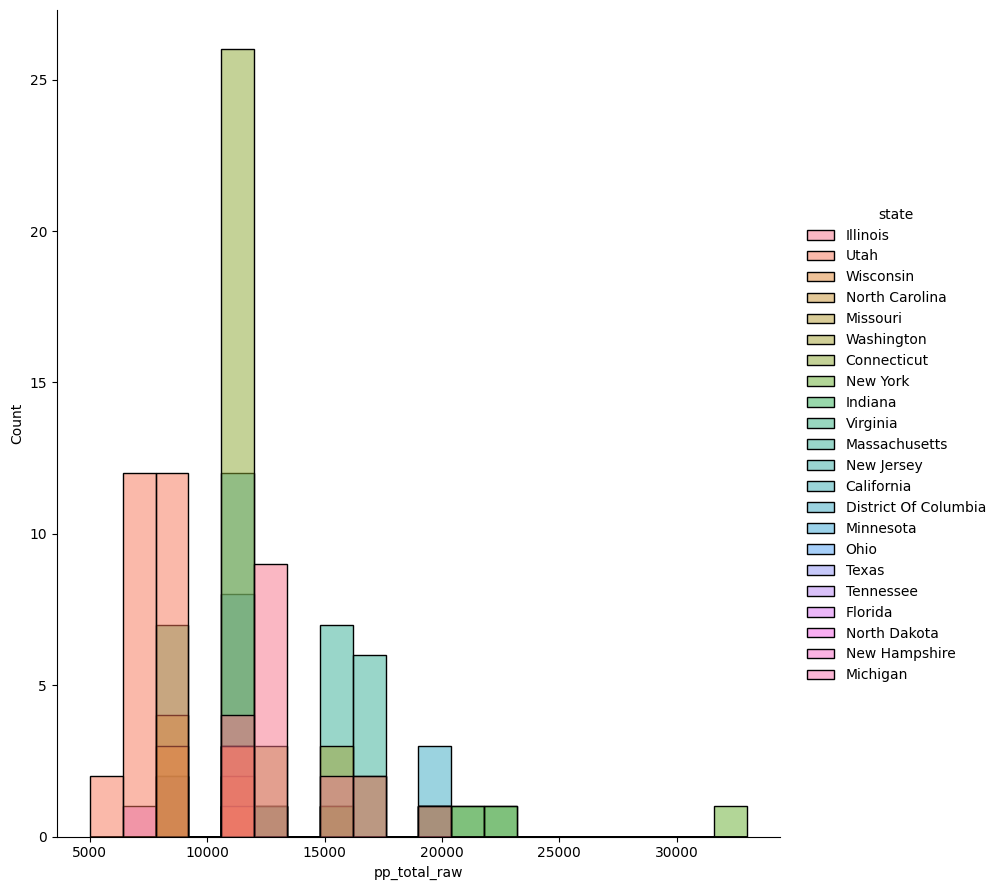

In [39]:
# distribution of pp_total_raw expenditure with state
sns.displot(data=districts_dataframe, x="pp_total_raw", hue='state', height=9, aspect=.9)
plt.show()

* Above plot shows that majority of **state** has average distribution of data points for **pp_total_raw** with few state dominating in count.

---

**Note:** Need to remove temporary columns created for special handling.

In [40]:
# print summary of updated dataframe
districts_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               164 non-null    int64  
 1   state                     164 non-null    object 
 2   locale                    164 non-null    object 
 3   pct_black/hispanic        164 non-null    float64
 4   pct_free/reduced          164 non-null    float64
 5   county_connections_ratio  164 non-null    float64
 6   pp_total_raw              164 non-null    float64
 7   pct_black                 164 non-null    float64
 8   pct_hispanic              164 non-null    float64
 9   pct_free                  164 non-null    float64
 10  pct_reduced               164 non-null    float64
 11  county                    164 non-null    float64
 12  connections               164 non-null    float64
 13  pp_local                  164 non-null    float64
 14  pp_federal

In [41]:
#drop temporary columns which is not required for analysis
districts_dataframe = districts_dataframe.drop(columns=['pct_black','pct_hispanic','pct_free','pct_reduced','county','connections','pp_local','pp_federal'])

print("Shape of districts info in dataset is", districts_dataframe.shape)

# print summary of updated dataframe
districts_dataframe.info()

Shape of districts info in dataset is (164, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               164 non-null    int64  
 1   state                     164 non-null    object 
 2   locale                    164 non-null    object 
 3   pct_black/hispanic        164 non-null    float64
 4   pct_free/reduced          164 non-null    float64
 5   county_connections_ratio  164 non-null    float64
 6   pp_total_raw              164 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 14.3+ KB


---
**Q: What is the distribution and relationship for numerical variables?**

---

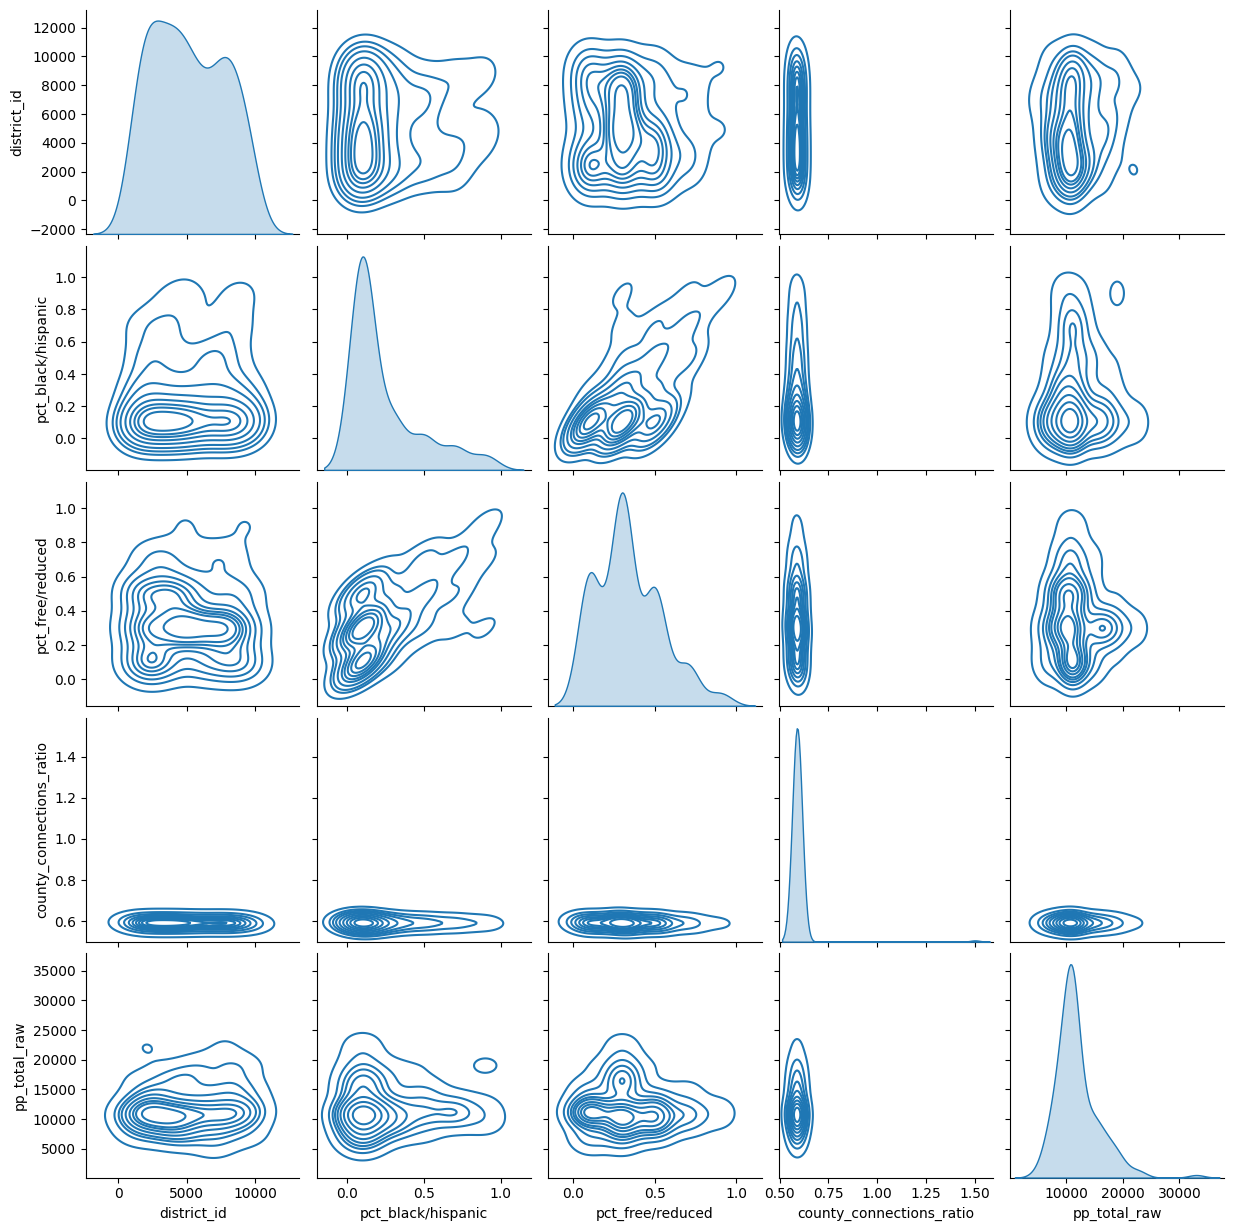

In [42]:
#plot pairwise relationship for numeric type
sns.pairplot(data=districts_dataframe,kind='kde')
plt.show()

* Above pairplot shows distribution and relationship between numeric features (columns)and there appears to be some positive correlation between **pct_black/hispanic** and **pct_free/reduced**.

---
**Q: What is the correlation for numerical variables?**

---

<ipython-input-43-8e86eb729802>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = districts_dataframe.corr(method='pearson')


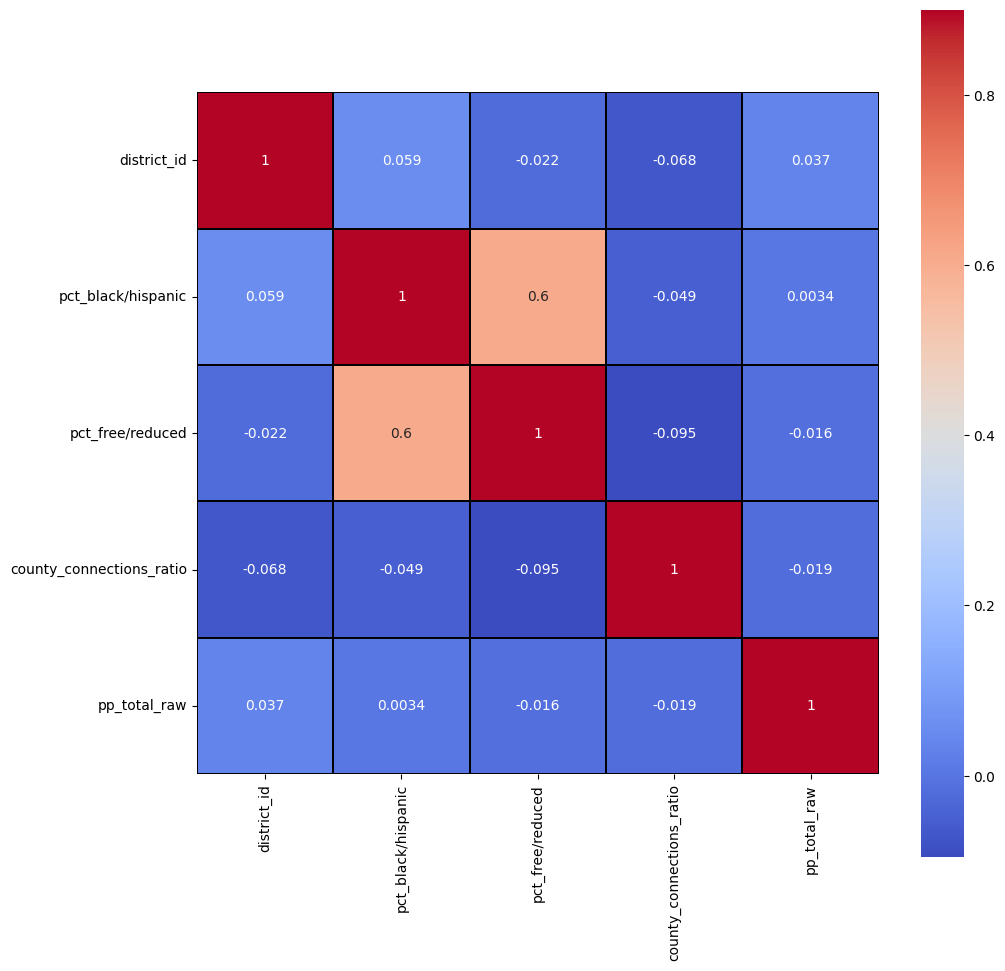

In [43]:
#Check corelation primarily between Numerical features
corr = districts_dataframe.corr(method='pearson')
plt.figure(figsize=(11,11))
sns.heatmap(corr,vmax=.9,linewidth=.02, square = True, annot = True,cmap='coolwarm',linecolor ='Black')
plt.show()

* Above heatmap plot shows correlation between numeric features (columns) and there appears to be some positive correlation between **pct_black/hispanic** and **pct_free/reduced**.

---

# Data Definition/Description of products info

---

**Data Definition:**

B) Product information data
* The product file products_info.csv includes information about the characteristics of the top 372 products with most users in 2020.
 * The categories listed in this file are part of LearnPlatform's product taxonomy. Data were labeled by our team.
 * Some products may not have labels due to being duplicate, lack of accurate url or other reasons.

 ---

In [44]:
# Loading dataset products_info.csv
products_dataframe = pd.read_csv('/content/products_info.csv')

---
**Q: What is the structure of products info dataset?**

---
| No. | Feature Name | Description of the feature |
| :-- | :--| :--|
|01| **LP ID**   | The unique identifier of the product|
|02| **URL** | Web Link to the specific product                 |
|03| **Product Name**   | Name of the specific product|
|04| **Provider/Company Name** | Name of the product provider                 |
|05| **Sector(s)**   | Sector of education where the product is used|
|06| **Primary Essential Function** | The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled                 |

In [45]:
# get shape of dataframe
print('The Shape of products info in the dataset:', products_dataframe.shape)

# print summary of dataframe
products_dataframe.info()

The Shape of products info in the dataset: (372, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


**products info dataset information:**

* There are 372 data points (rows) and six feature (column) in products info dataset.
* There is one numerical column and five columns are of categorical or object type.
* There are missing values for Provider/Company Name, Sector(s) and Primary Essential Function column.

---

---
**Q: What does data looks like for products info dataset?**

---

In [46]:
# print first 10 rows of dataframe
products_dataframe.head(10)

LP ID                            URL    Product Name  \
0  13117     https://www.splashmath.com     SplashLearn   
1  66933           https://abcmouse.com    ABCmouse.com   
2  50479          https://www.abcya.com          ABCya!   
3  92993          http://www.aleks.com/           ALEKS   
4  73104   https://www.achieve3000.com/     Achieve3000   
5  37600  http://www.activelylearn.com/  Actively Learn   
6  18663     http://www.adaptedmind.com     AdaptedMind   
7  65131        http://www.amplify.com/         Amplify   
8  26491        http://www.answers.com/         Answers   
9  56441         http://www.audible.com         Audible   

     Provider/Company Name                      Sector(s)  \
0            StudyPad Inc.                        PreK-12   
1    Age of Learning, Inc                         PreK-12   
2           ABCya.com, LLC                        PreK-12   
3      McGraw-Hill PreK-12             PreK-12; Higher Ed   
4              Achieve3000                        PreK-12   
5           Actively Learn                        PreK-12   
6                 GloWorld                        PreK-12   
7  Amplify Education, Inc.                        PreK-12   
8                  Answers             PreK-12; Higher Ed   
9        Amazon.com, Inc.   PreK-12; Higher Ed; Corporate   

                          Primary Essential Function  
0                    LC - Digital Learning Platforms  
1                    LC - Digital Learning Platforms  
2  LC - Sites, Resources & Reference - Games & Si...  
3                    LC - Digital Learning Platforms  
4                    LC - Digital Learning Platforms  
5                    LC - Digital Learning Platforms  
6                    LC - Digital Learning Platforms  
7                        LC - Courseware & Textbooks  
8                             LC - Study Tools - Q&A  
9  LC - Sites, Resources & Reference - Streaming ...

---
**Q: What is the statistics description for products info dataset?**

---

In [47]:
# print descriptive statistics for both object and numeric type
products_dataframe.describe(include='all')

LP ID                         URL Product Name  \
count     372.000000                         372          372   
unique           NaN                         372          372   
top              NaN  https://www.splashmath.com  SplashLearn   
freq             NaN                           1            1   
mean    54565.795699                         NaN          NaN   
std     26247.551437                         NaN          NaN   
min     10533.000000                         NaN          NaN   
25%     30451.000000                         NaN          NaN   
50%     53942.500000                         NaN          NaN   
75%     77497.000000                         NaN          NaN   
max     99916.000000                         NaN          NaN   

       Provider/Company Name Sector(s)       Primary Essential Function  
count                    371       352                              352  
unique                   290         5                               35  
top               Google LLC   PreK-12  LC - Digital Learning Platforms  
freq                      30       170                               74  
mean                     NaN       NaN                              NaN  
std                      NaN       NaN                              NaN  
min                      NaN       NaN                              NaN  
25%                      NaN       NaN                              NaN  
50%                      NaN       NaN                              NaN  
75%                      NaN       NaN                              NaN  
max                      NaN       NaN                              NaN

**products info dataset data description:**

* There are 372 **URL** and **Product Name** unique type for which data points are available.
* There are 290 **Provider/Company Name** unique type for which data points are available.
* Google LLC **Provider/Company Name** has the highest frequency of occurrence.
* There are 5 **Sector(s)** unique type for which data points are available.
* Prek-12 **Sector(s)** has the highest frequency of occurrence.
* There are 35 **Primary Essential Function** unique type for which data points are available.
* LC - Digital Learning Platforms **Primary Essential Function** has the highest frequency of occurrence.
* Note: Need to rename **LP ID** to match lp_id as listed in engagement_data

--------

**Handle missing value for products_data:**

---

In [48]:
#check for missing values
products_dataframe.isna().sum()

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

* Need to impute missing value for **Provider/Company Name**

In [49]:
# Marking missing value as "Missing" as it is one off value
products_dataframe['Provider/Company Name'].fillna("Missing", inplace=True)

* Need to impute missing value for **Sector(s)** with mode value which is Prek-12

In [50]:
# populate missing value with mode value'Prek-12'
sector_mode= products_dataframe['Sector(s)'].mode()
products_dataframe['Sector(s)'].fillna(value=sector_mode[0], inplace=True)

* Need to impute missing value for **Primary Essential Function** with mode value which is LC - Digital Learning Platforms

In [51]:
# populate missing value with mode
essential_mode= products_dataframe['Primary Essential Function'].mode()
products_dataframe['Primary Essential Function'].fillna(value=essential_mode[0], inplace=True)

In [52]:
# rename LP ID column to lp_id for it to match as in engagement_data
products_dataframe.rename(columns={'LP ID':'lp_id'}, inplace=True)

---

# Data Analysis/EDA of products info

---

**products info dataset data distribution:**

* Explore products info dataset and check distribution of data with respect to various features (columns).

---

---
**Q: What is the distribution count for Sector(s) feature?**

---

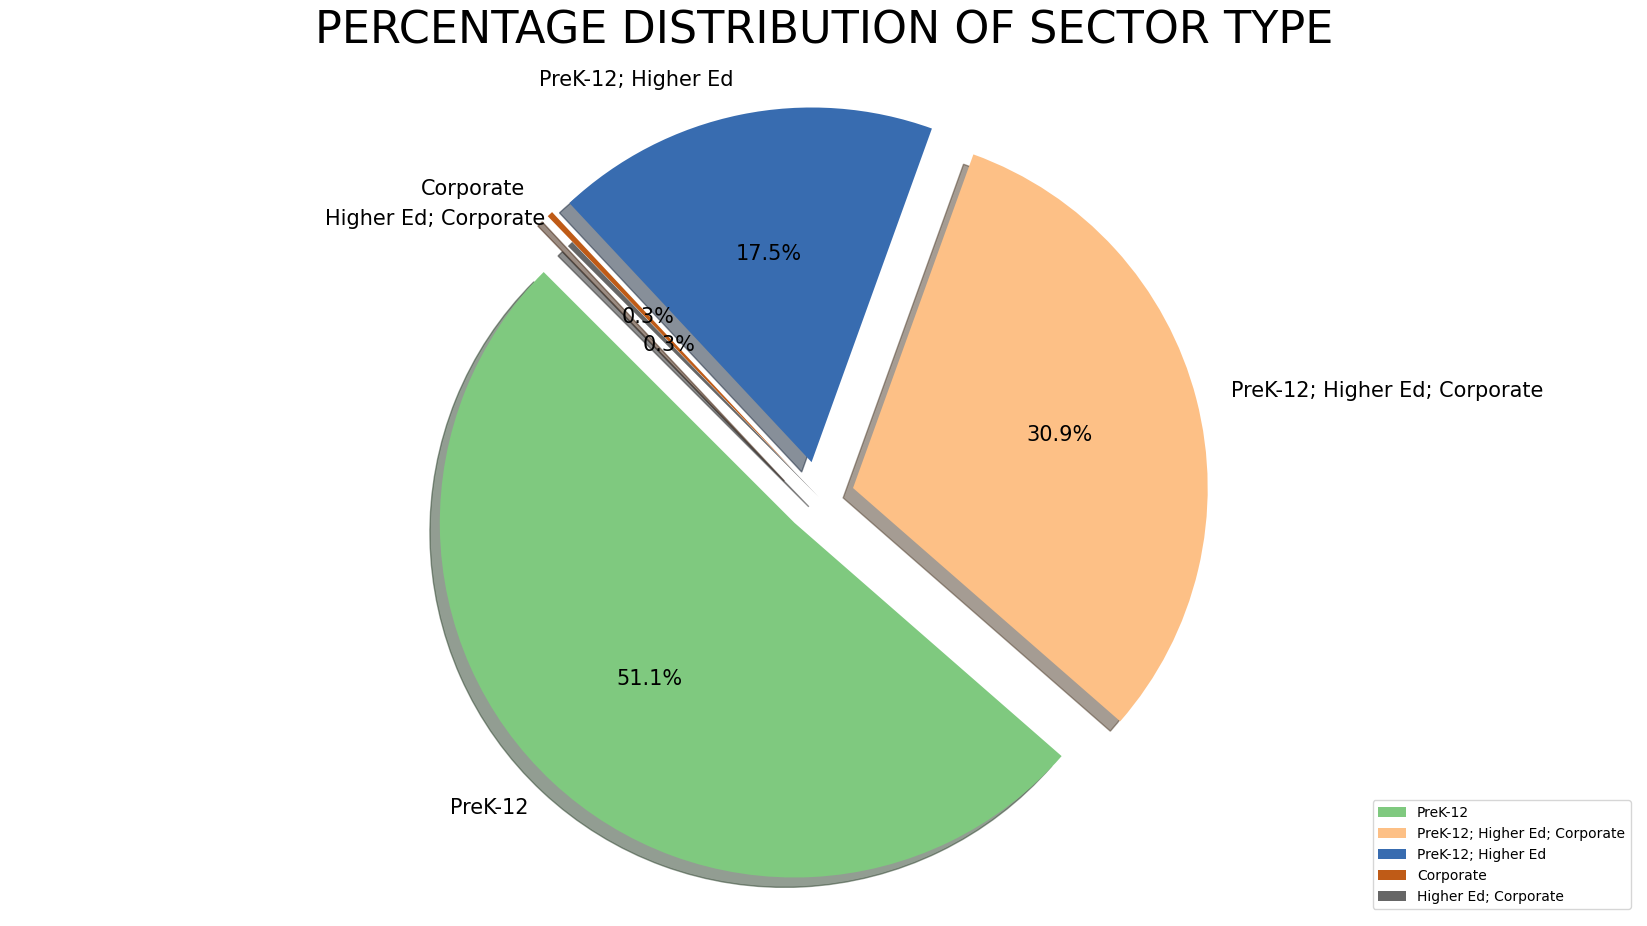

In [53]:
# plot percentage distribution of Sector(s)
products_dataframe['Sector(s)'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1,0], fontsize=15, autopct='%3.1f%%',
                                               figsize=(21,11), shadow=True, startangle=135, legend=False, cmap='Accent')
plt.title('PERCENTAGE DISTRIBUTION OF SECTOR TYPE', y = 1.02, size = 32)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = products_dataframe['Sector(s)'].value_counts().index, loc ='lower right', frameon = True)
plt.show()

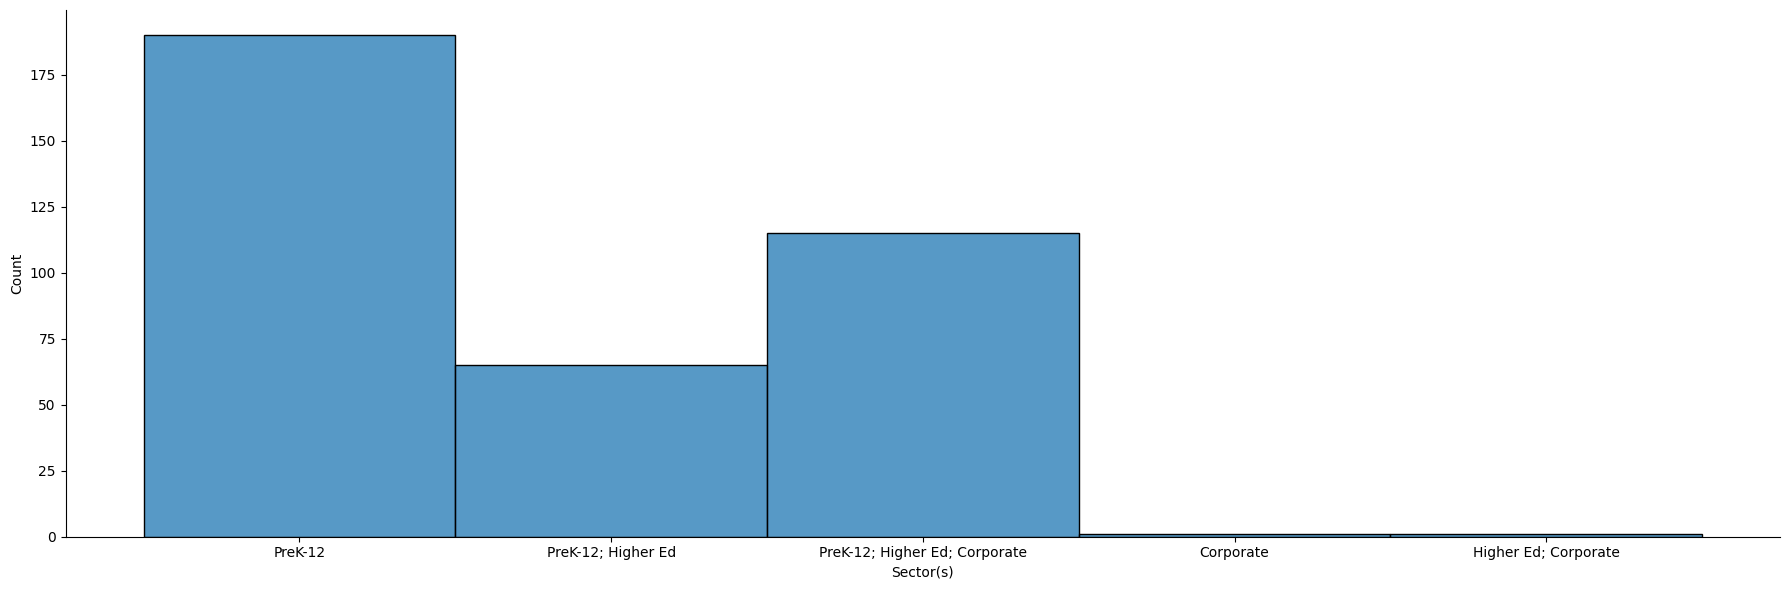

In [54]:
# distribution of Sectors
sns.displot(data=products_dataframe, x='Sector(s)', height=6, aspect=3)
plt.show()

* Above plot shows that majority of data points for **Sector(s)** is around 'PreK-12'

---
**Q: What is the distribution count for Primary Essential Function feature?**

---

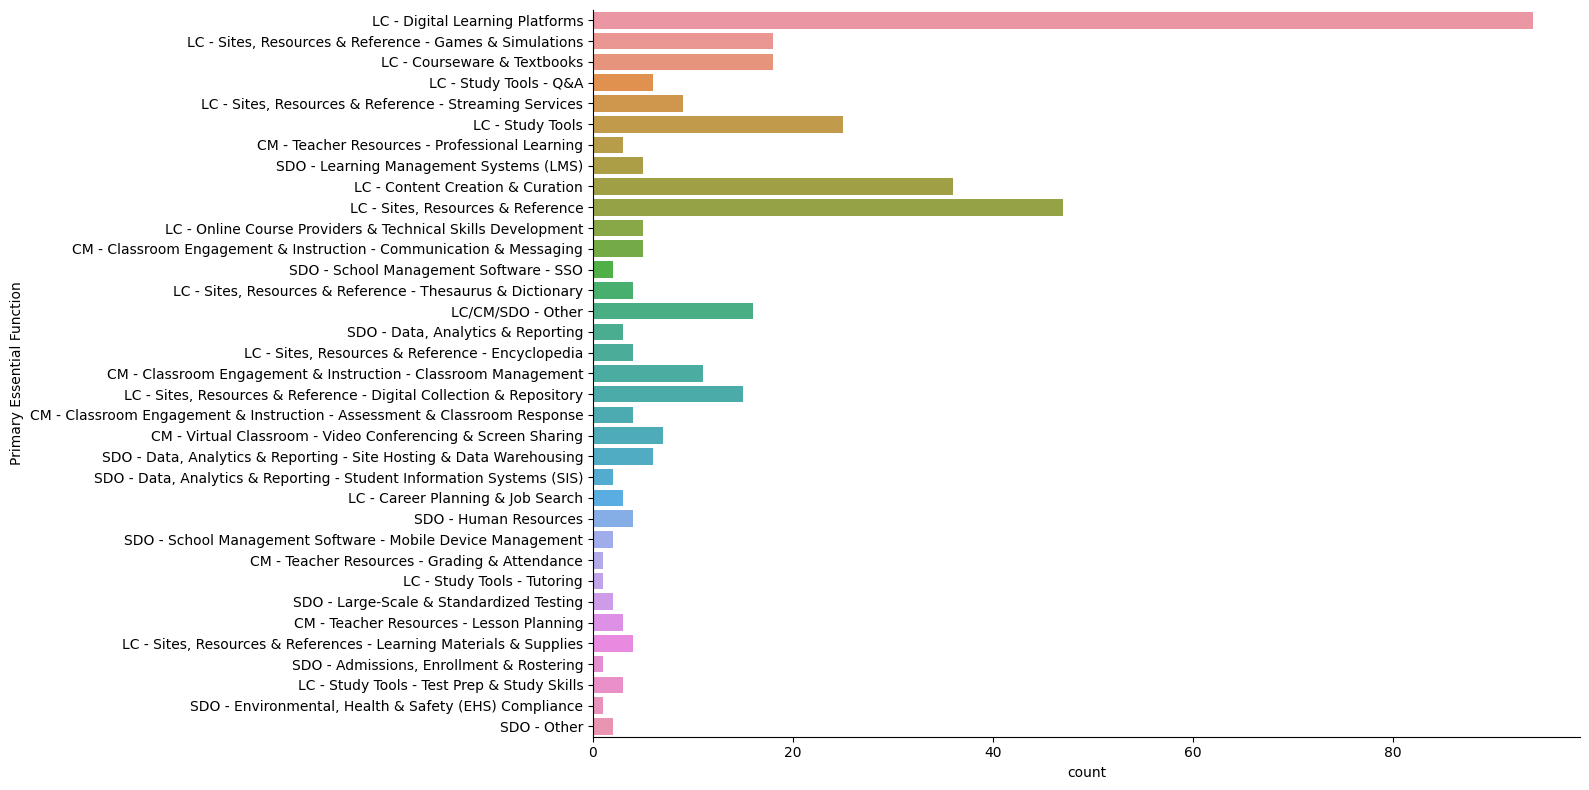

In [55]:
#distribution of count for Primary Essential Function
sns.catplot(data=products_dataframe,y='Primary Essential Function', kind='count', height=8, aspect=2)
plt.show()

* Above plot shows that majority of data points is for **Primary Essential Function** is for LC based function.

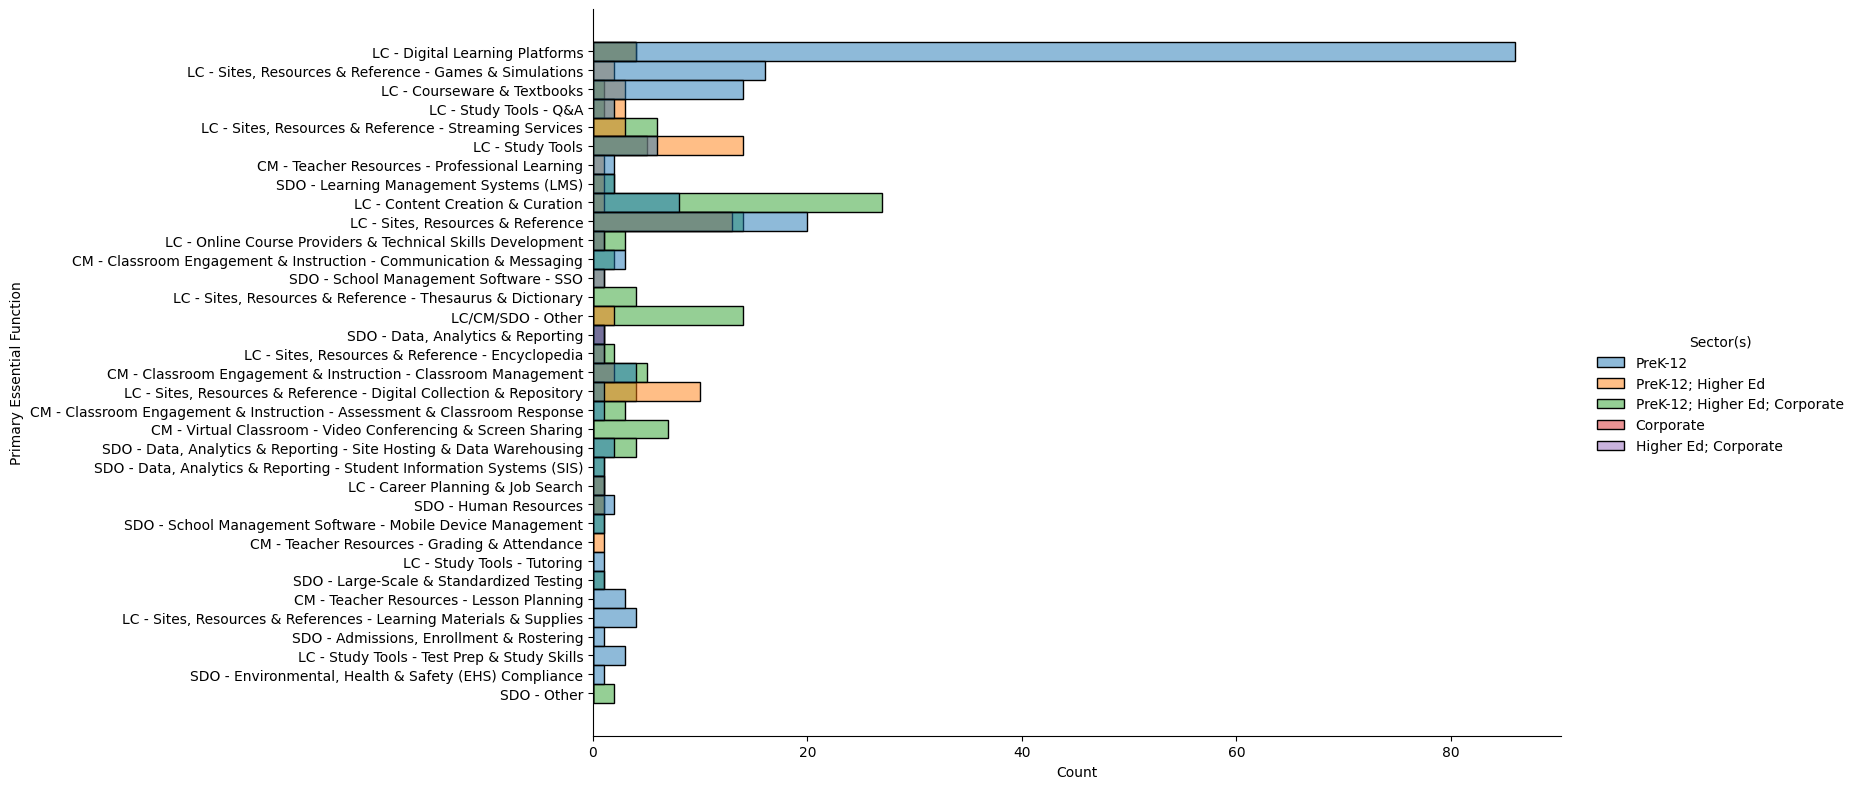

In [56]:
#distribution of Primary Essential Function and Sector(s)
sns.displot(data=products_dataframe, y='Primary Essential Function', hue='Sector(s)', height=8, aspect=2)
plt.show()

* Above plot shows that majority of 'Prek-12' **Sector(s)** is with LC- Digital Learning Platform

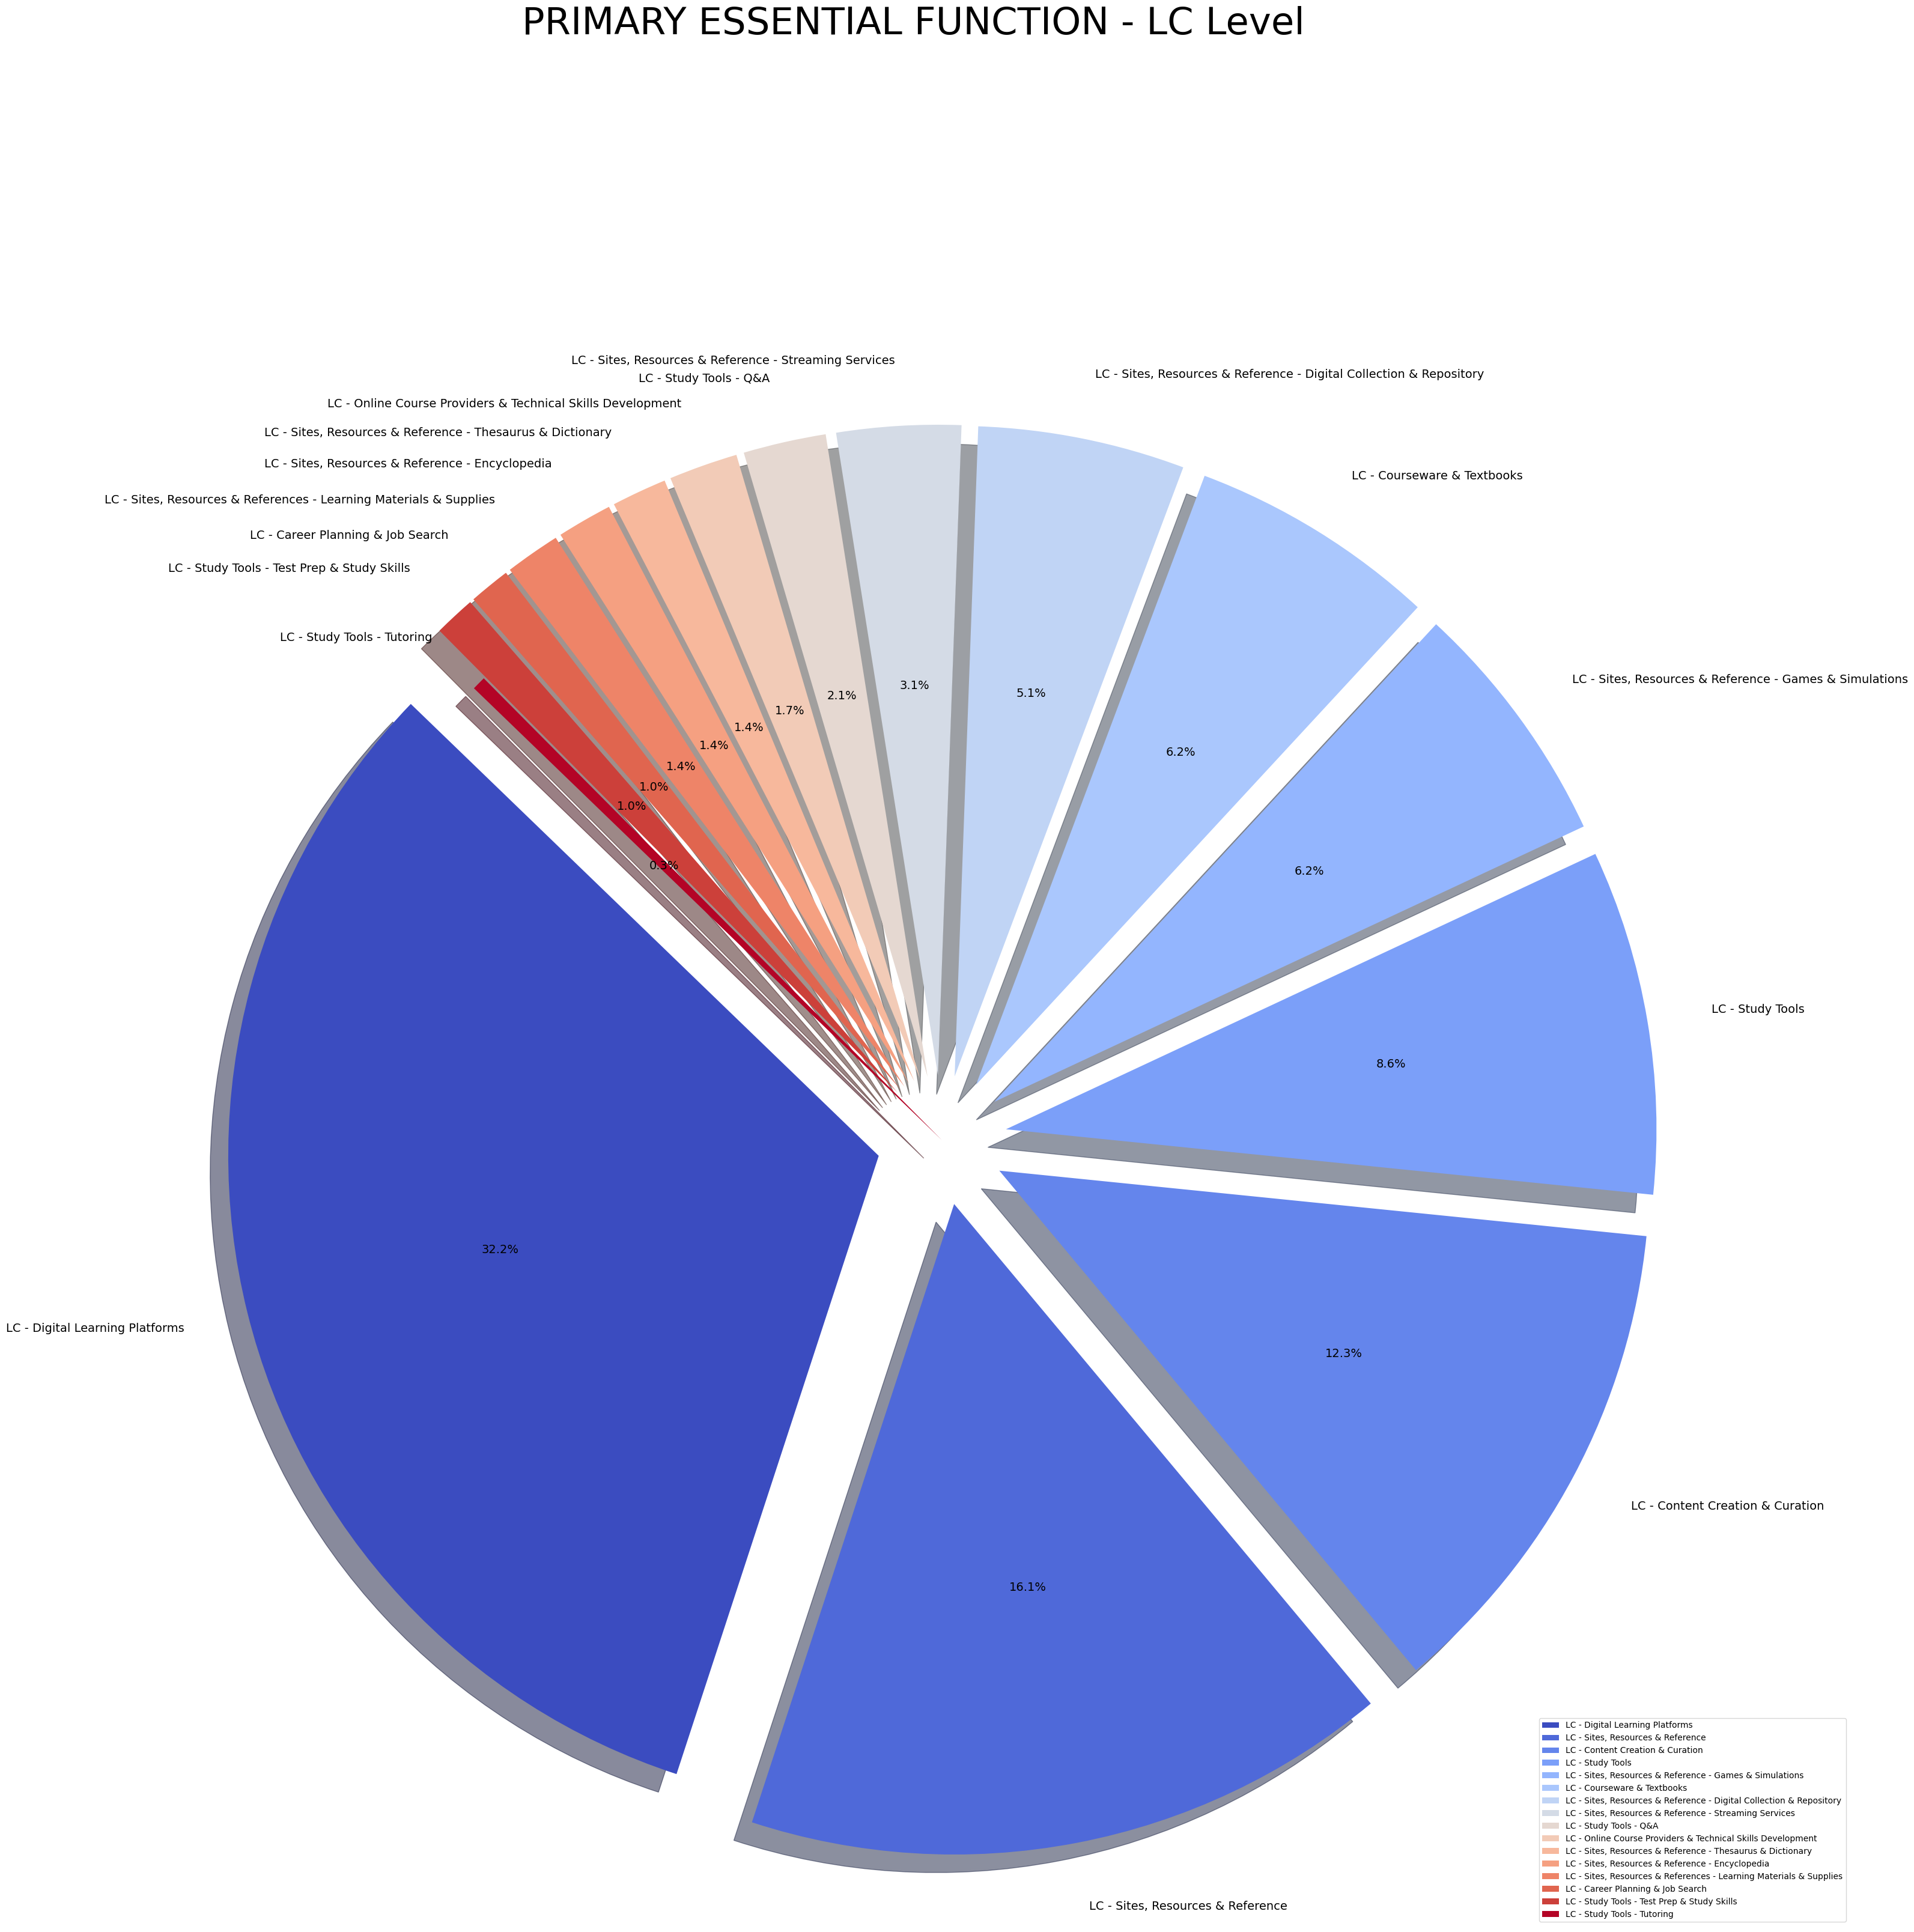

In [57]:
#check distribution of Primary Essential Function - LC Level
products_LC=products_dataframe[products_dataframe['Primary Essential Function'].str.contains("LC - ")]
products_LC['Primary Essential Function'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0], fontsize=14, autopct='%3.1f%%',
                                               figsize=(39,34), shadow=True, startangle=136, legend=False, cmap='coolwarm')
plt.suptitle(t = 'PRIMARY ESSENTIAL FUNCTION - LC Level', y = 1.05, size = 45)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = products_LC['Primary Essential Function'].value_counts().index, loc ='lower right', frameon = True)
plt.show()

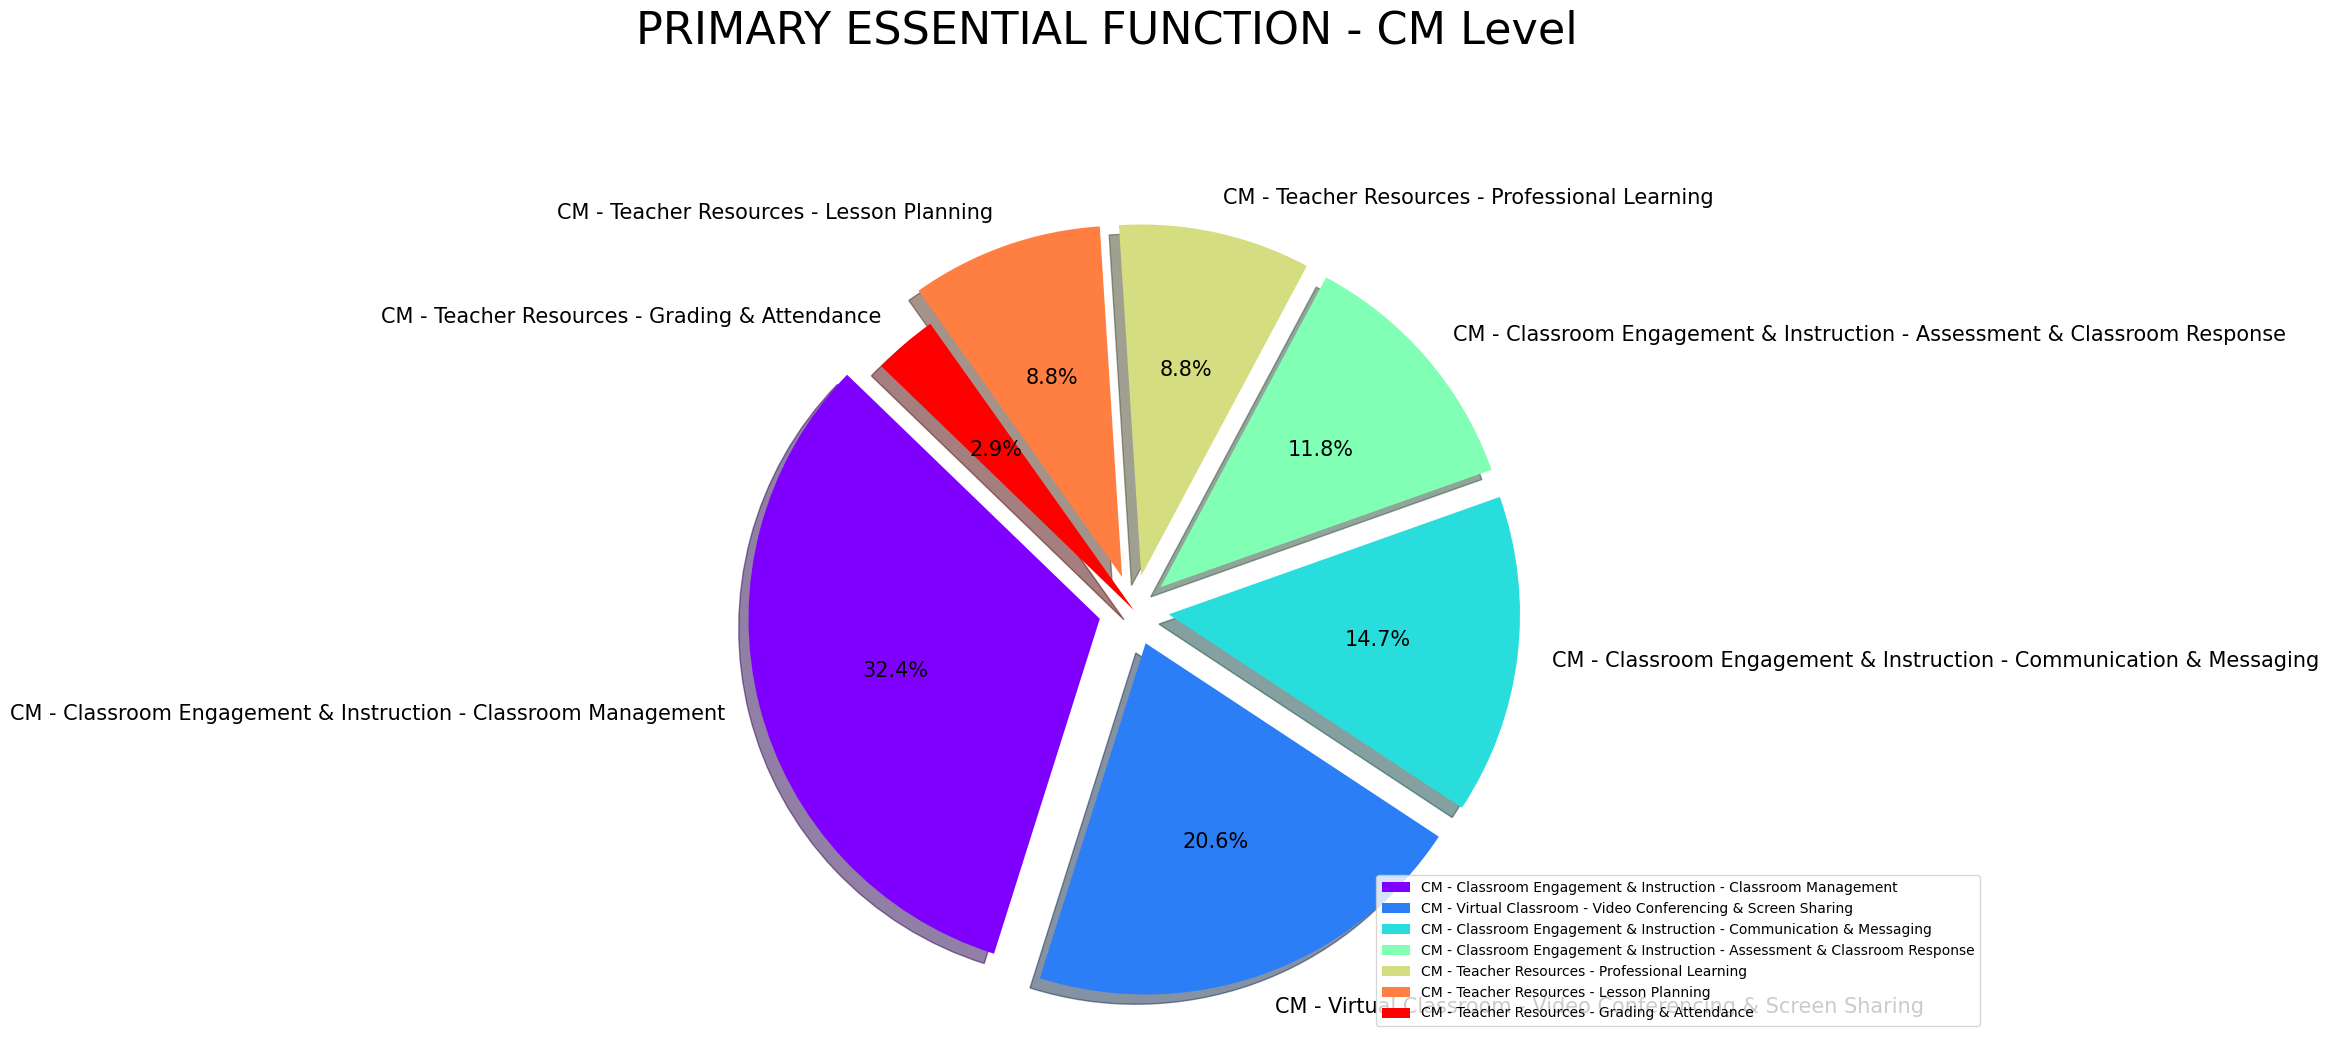

In [58]:
#check distribution of Primary Essential Function - CM Level
products_CM=products_dataframe[products_dataframe['Primary Essential Function'].str.contains("CM - ")]
products_CM['Primary Essential Function'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1,0.1,0.1,0], fontsize=15, autopct='%3.1f%%',
                                               figsize=(22,11), shadow=True, startangle=136, legend=False, cmap='rainbow')
plt.suptitle(t = 'PRIMARY ESSENTIAL FUNCTION - CM Level', y = 1.04, size = 32)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = products_CM['Primary Essential Function'].value_counts().index, loc ='lower right', frameon = True)
plt.show()

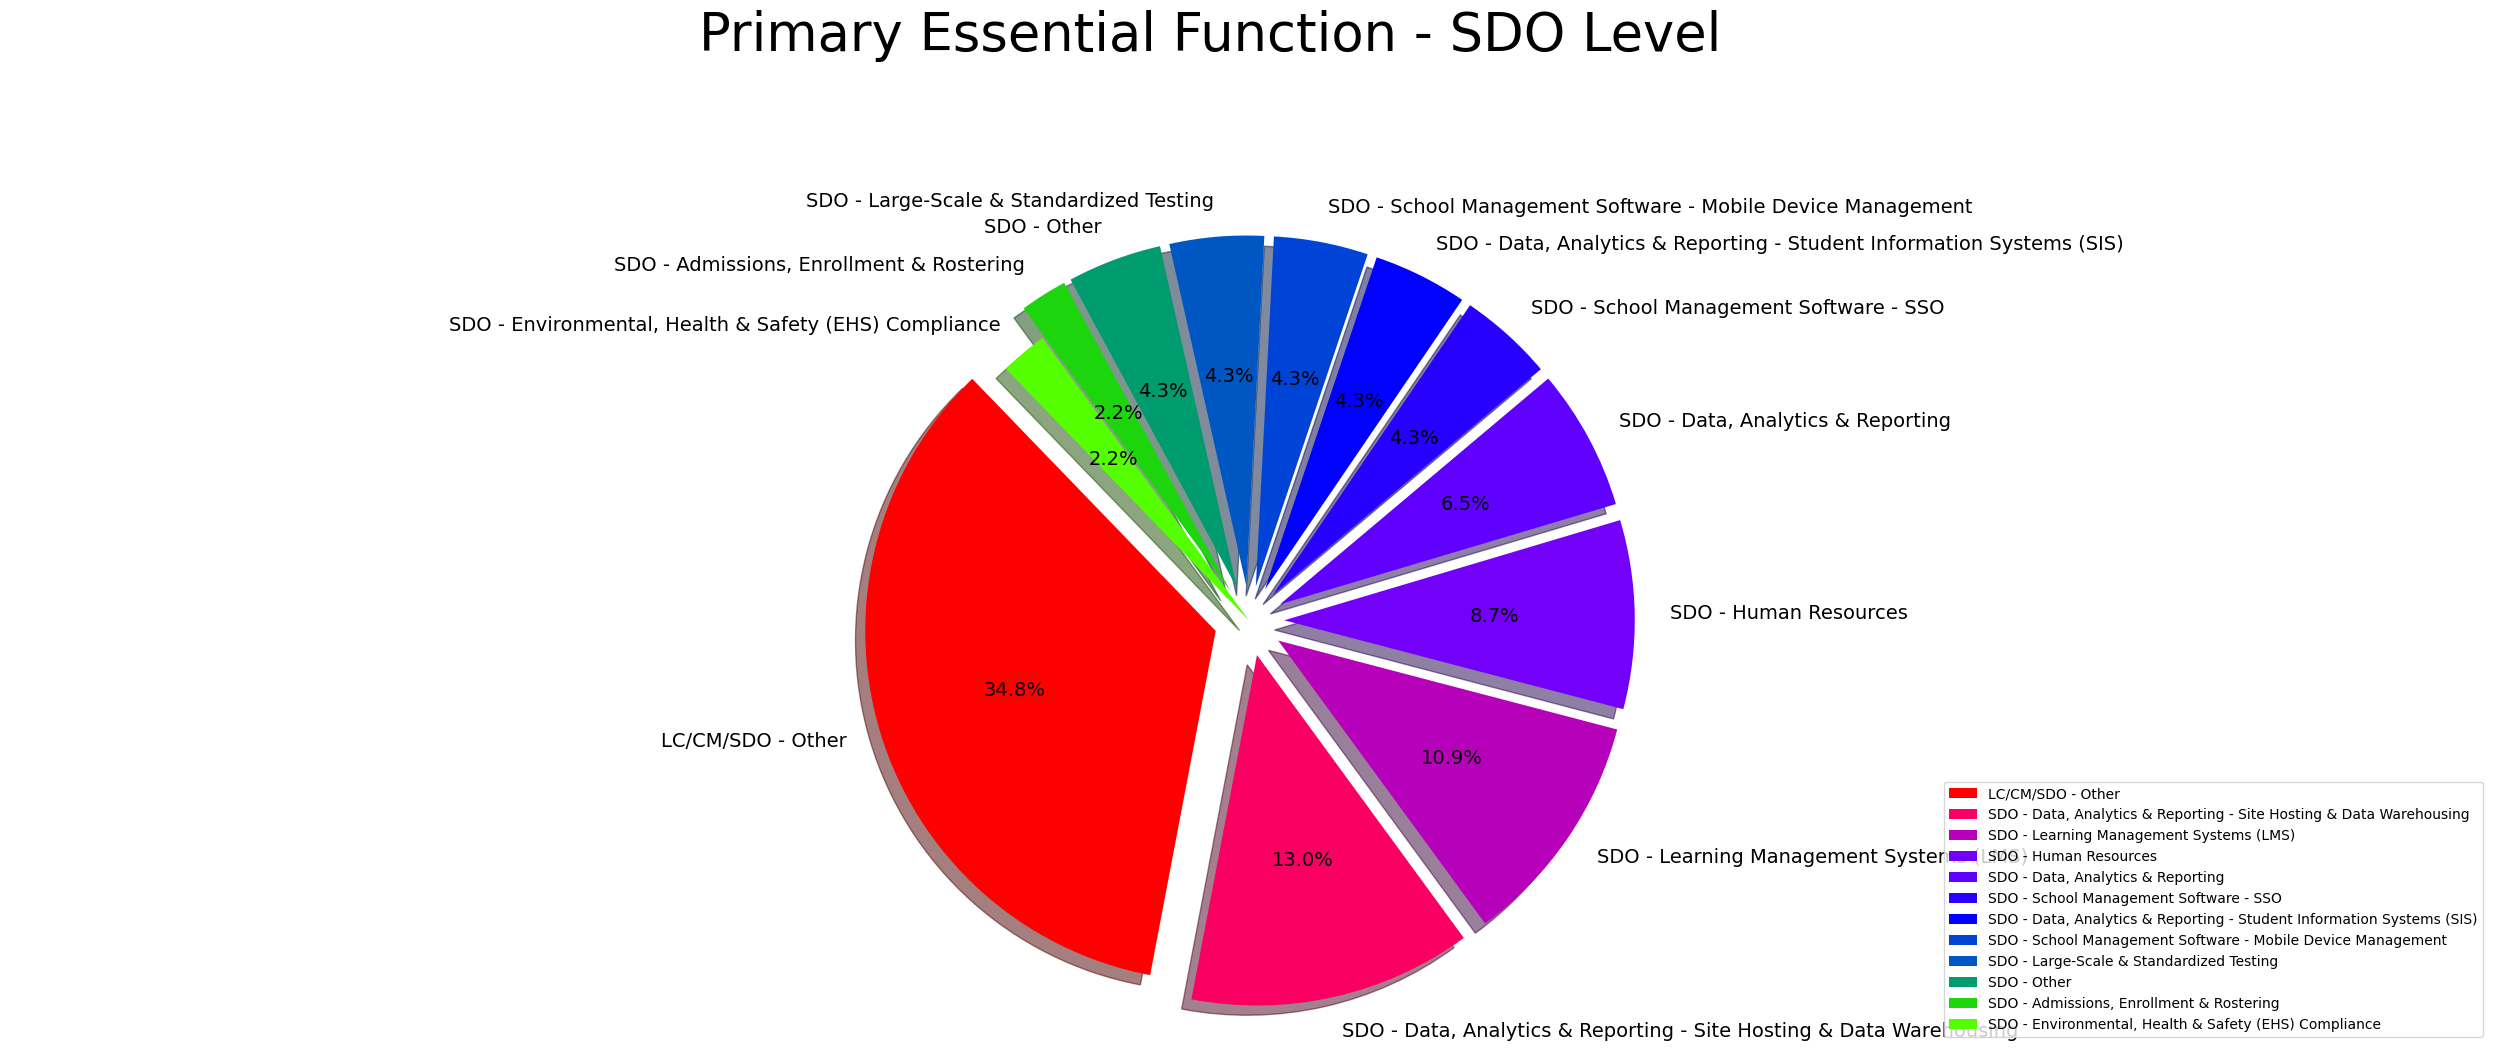

In [59]:
#check distribution of Primary Essential Function - SDO Level
products_SDO=products_dataframe[products_dataframe['Primary Essential Function'].str.contains("SDO - ")]
products_SDO['Primary Essential Function'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0], fontsize=14, autopct='%3.1f%%',
                                               figsize=(32,11), shadow=True, startangle=134, legend=False, cmap='prism')
plt.suptitle(t = 'Primary Essential Function - SDO Level', y = 1.05, size = 38)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = products_SDO['Primary Essential Function'].value_counts().index, loc ='lower right', frameon = True)
plt.show()

---
**Q: What is the text distribution view for Product Name feature?**

---

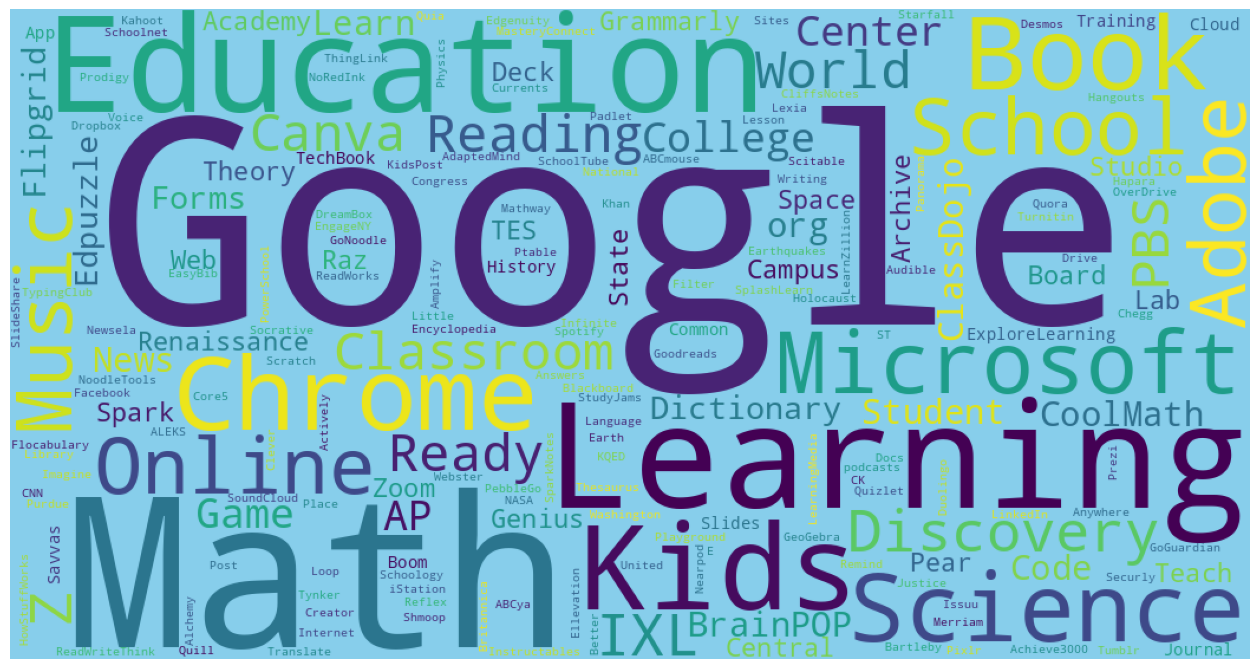

In [60]:
# get unique Product Name
products_name= products_dataframe['Product Name'].unique()
# convert numpy array to string
products_name_str = ",".join(products_name)

# create WordCloud with converted string
wordcloud = WordCloud(width = 1050, height = 550, random_state=1, background_color='skyblue', collocations=False).generate(products_name_str)
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

---
**Q: What is the text distribution view for Provider/Company Name feature?**

---

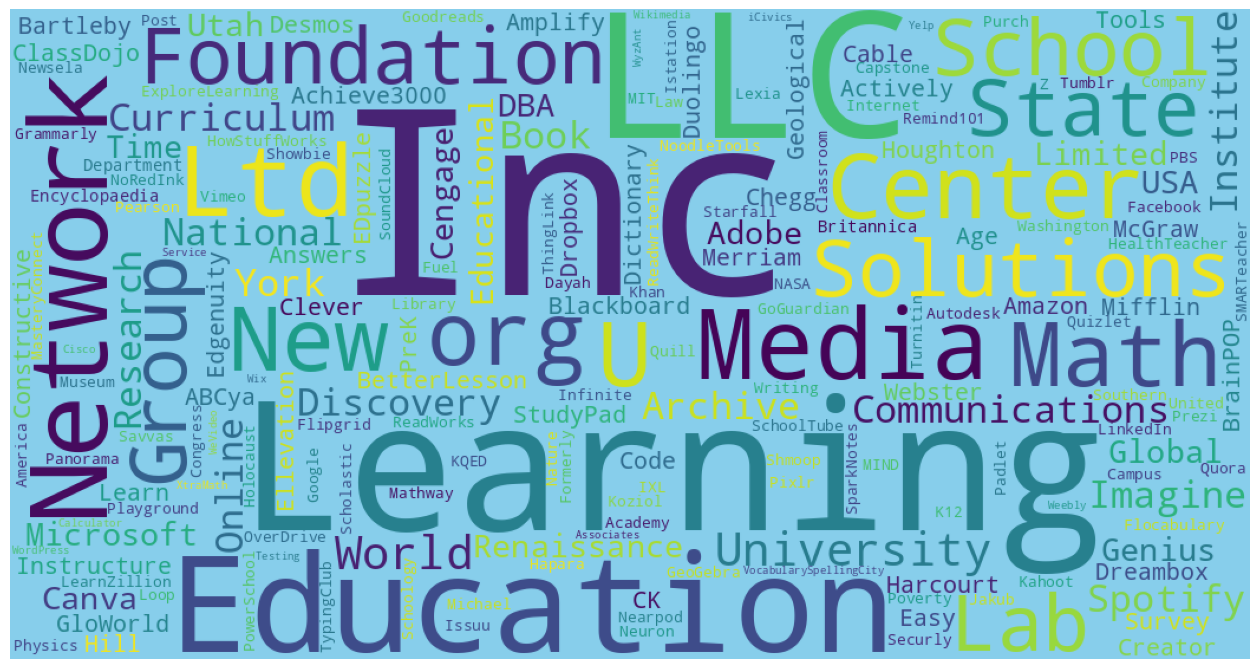

In [61]:
# get unique Provider/Company Name
products_provider= products_dataframe['Provider/Company Name'].unique()
# convert numpy array to string
products_provider_str = ",".join(products_provider)

# create WordCloud with converted string
wordcloud = WordCloud(width = 1050, height = 550, random_state=1, background_color='skyblue', collocations=True).generate(products_provider_str)
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

---

# Data Definition/Description of engagement data

---

**Data Definition:**

C) Engagement data
* The engagement data are aggregated at school district level, and each file in the folder engagement_data represents data from one school district.
 * The 4-digit file name represents district_id which can be used to link to district information in districts_info.csv.
 * The lp_id can be used to link to product information in products_info.csv.

 ---

In [62]:
#Loading CSV files for engagement_data
path = '/content/drive/MyDrive/engagement_data'
print(path)
csv_files = glob.glob(os.path.join(path, "*.csv"))
data = []
# loop over the list of csv files
for f in csv_files:
    # read the csv file
    frame = pd.read_csv(f)
    # split filename and extension
    filename = os.path.splitext(f)
    # extract district ID from CSV filename tuple
    frame['district_id'] = os.path.basename(filename[0])
    # add new column to new list
    data.append(frame)

    # create dataframe for engagement data
    engagement_dataframe = pd.concat(data)

/content/drive/MyDrive/engagement_data


---
**Q: What is the structure of engagement dataset?**

---
**Note:** 4-digit filename value was added as new column "district_id" in engagement_data

| No. | Feature Name | Description of the feature |
| :-- | :--| :--|
|01| **time**   | date in "YYYY-MM-DD"                          |
|02| **lp_id** | The unique identifier of the product                 |
|03| **pct_access**   | Percentage of students in the district have at least one page-load event of a given product and on a given day                          |
|04| **engagement_index**   | Total page-load events per one thousand students of a given product and on a given day                          |
|05| **district_id**   | Extracted from filename|

In [63]:
# get shape of dataframe
print('The Shape of engagement in dataset:', engagement_dataframe.shape)

# print summary of dataframe
engagement_dataframe.info(show_counts=True)

The Shape of engagement in dataset: (22324190, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22324190 entries, 0 to 116881
Data columns (total 5 columns):
 #   Column            Non-Null Count     Dtype  
---  ------            --------------     -----  
 0   time              22324190 non-null  object 
 1   lp_id             22323649 non-null  float64
 2   pct_access        22310743 non-null  float64
 3   engagement_index  16945781 non-null  float64
 4   district_id       22324190 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1021.9+ MB


**engagement dataset information:**

* There are 22324190 data points (rows) and five feature (column) in engagement dataset.
* There are three numerical column and two columns are of categorical or object type.
* There are missing values for lp_id, pct_access and engagement_index column.
* Note: district_id need to be converted to numeric type and lp_id need to be converted to numeric int type

---

---
**Q: What does data looks like for engagement dataset?**

---

In [64]:
# print first 10 rows of dataframe
engagement_dataframe.head(5)

time    lp_id  pct_access  engagement_index district_id
0  2020-01-01  57513.0        0.49            141.28        1052
1  2020-01-01  42091.0        0.04              0.41        1052
2  2020-01-01  53399.0        0.04              8.19        1052
3  2020-01-01  32213.0        0.90             44.23        1052
4  2020-01-01  85836.0        0.04              0.41        1052

---
**Q: What is the statistics description for engagement dataset?**

---

In [65]:
# print descriptive statistics for both object and numeric type
engagement_dataframe.describe(include='all')

time         lp_id    pct_access  engagement_index district_id
count     22324190  2.232365e+07  2.231074e+07      1.694578e+07    22324190
unique         366           NaN           NaN               NaN         233
top     2020-12-10           NaN           NaN               NaN        2956
freq        102833           NaN           NaN               NaN      290683
mean           NaN  5.470879e+04  5.042399e-01      1.676063e+02         NaN
std            NaN  2.647069e+04  3.180568e+00      1.682223e+03         NaN
min            NaN  1.000300e+04  0.000000e+00      1.000000e-02         NaN
25%            NaN  3.085100e+04  0.000000e+00      3.700000e-01         NaN
50%            NaN  5.500700e+04  2.000000e-02      1.920000e+00         NaN
75%            NaN  7.766000e+04  9.000000e-02      1.365000e+01         NaN
max            NaN  9.999100e+04  1.000000e+02      2.130455e+05         NaN

**engagement dataset data description:**

* There are 366 **time** unique type for which data points are available.
* 2020-12-10 **time** has the highest frequency of occurrence.
* mean value (0.5) is higher than median value value (0.02) for  **pct_access** which appears that it is positively skewed.
* mean value (167) is higher than median value value (1.92) for  **engagement_index** which appears that it is positively skewed.

--------

**Handle missing value for engagement_data:**

---

In [66]:
#check for missing values
engagement_dataframe.isna().sum()

time                      0
lp_id                   541
pct_access            13447
engagement_index    5378409
district_id               0
dtype: int64

In [67]:
# drop missing values as they are not required for analysis
engagement_dataframe.dropna(inplace=True)

In [68]:
#check for missing values
engagement_dataframe.isna().sum()

time                0
lp_id               0
pct_access          0
engagement_index    0
district_id         0
dtype: int64

In [69]:
#convert lp_id from float to int numeric type
engagement_dataframe['lp_id']= engagement_dataframe['lp_id'].astype(int)

In [70]:
# convert district_id from object type to numeric type
engagement_dataframe['district_id'] = pd.to_numeric(engagement_dataframe['district_id'])

In [71]:
# convert time from object type to datetime type
engagement_dataframe['time']= pd.to_datetime(engagement_dataframe['time'])

In [72]:
# print summary of dataframe
engagement_dataframe.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16945301 entries, 0 to 116881
Data columns (total 5 columns):
 #   Column            Non-Null Count     Dtype         
---  ------            --------------     -----         
 0   time              16945301 non-null  datetime64[ns]
 1   lp_id             16945301 non-null  int64         
 2   pct_access        16945301 non-null  float64       
 3   engagement_index  16945301 non-null  float64       
 4   district_id       16945301 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 775.7 MB


---
**Q: What does data looks like for engagement dataset?**

---

In [73]:
# print first 10 rows of dataframe
engagement_dataframe.head(5)

time  lp_id  pct_access  engagement_index  district_id
0 2020-01-01  57513        0.49            141.28         1052
1 2020-01-01  42091        0.04              0.41         1052
2 2020-01-01  53399        0.04              8.19         1052
3 2020-01-01  32213        0.90             44.23         1052
4 2020-01-01  85836        0.04              0.41         1052

# Data Analysis/EDA of engagement data

---

**engagement data dataset data distribution:**

* Explore engagement data dataset and check distribution of data with respect to various features (columns).

---

---
**Q: What is the trend for engagement_index in 2020?**

---

In [74]:
# group by time without index
engagement_data_by_date11 = engagement_dataframe.groupby(by = 'time', as_index = False).agg('mean')

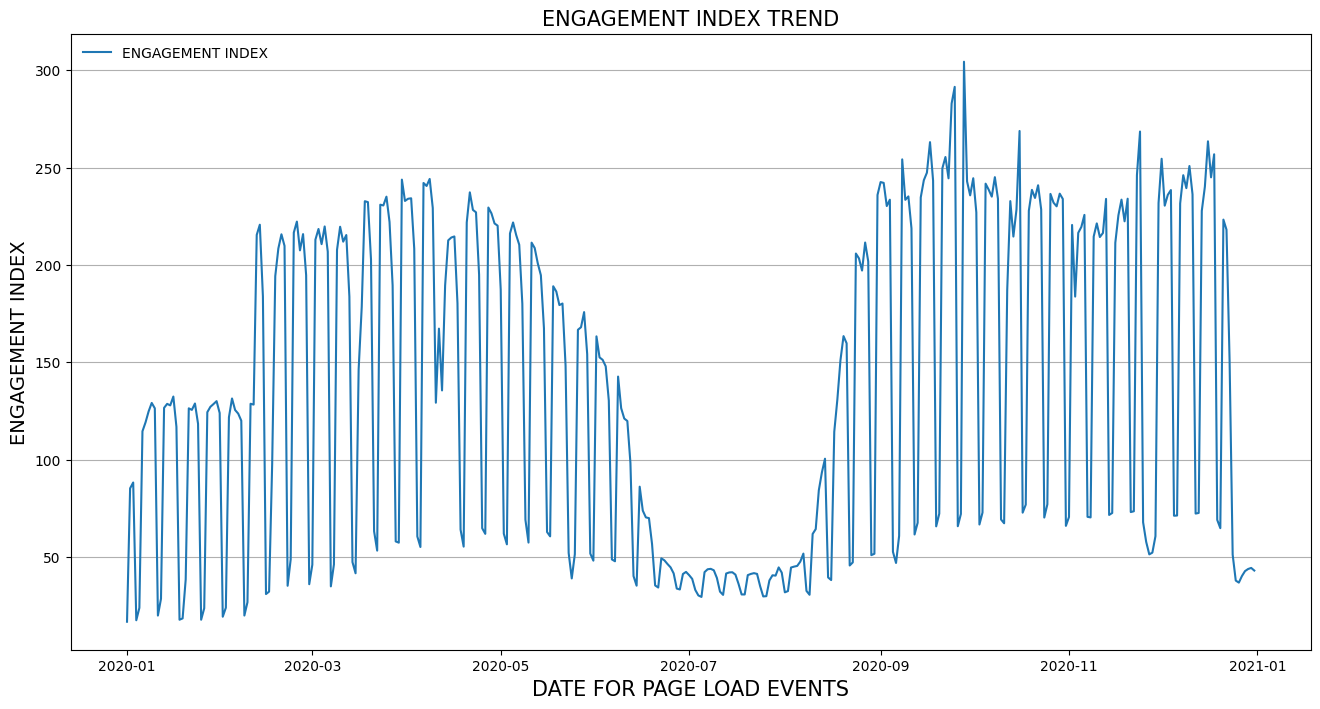

In [75]:
fig, ax = plt.subplots(figsize=[16, 8])
sns.lineplot(x='time', y='engagement_index', data=engagement_data_by_date11, color='#1f77b4', ax=ax)

ax.set_xlabel('DATE FOR PAGE LOAD EVENTS', size=15)
ax.set_ylabel('ENGAGEMENT INDEX', size=14)
ax.legend(labels=['ENGAGEMENT INDEX'], loc='upper left', frameon=False)
ax.set_title('ENGAGEMENT INDEX TREND', size=15)
ax.grid(True, axis='y')
plt.show()


* Above line plot shows that there appears to be drop in **engagement_index** between May 2020 and Sept 2020

---
**Q: What is the trend for pct_access in 2020?**

---

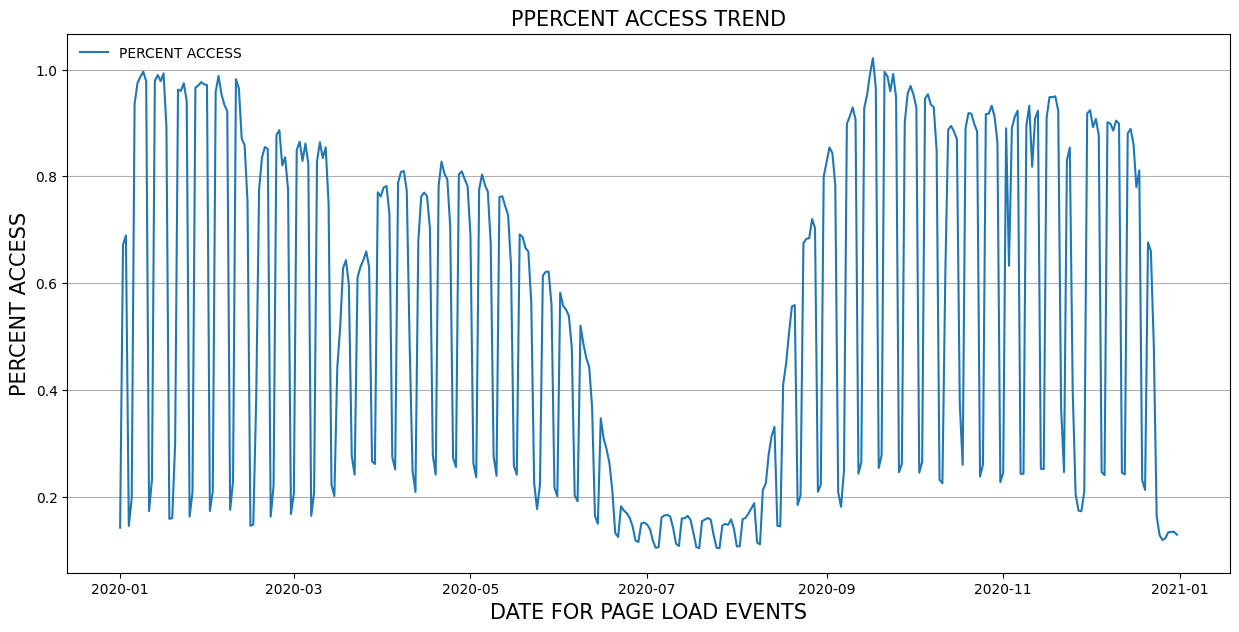

In [76]:
fig, ax = plt.subplots(figsize=[15, 7])
sns.lineplot(x='time', y='pct_access', data=engagement_data_by_date11, color='#1f77b4', ax=ax)

ax.set_xlabel('DATE FOR PAGE LOAD EVENTS', size=15)
ax.set_ylabel('PERCENT ACCESS', size=15)
ax.legend(labels=['PERCENT ACCESS'], loc='upper left', frameon=False)
ax.set_title('PPERCENT ACCESS TREND', size=15)
ax.grid(True, axis='y')
plt.show()


* Above line plot shows that there appears to be drop in **pct_access** between May 2020 and Sept 2020

---
**Q: What is the trend for engagement_index between May 2020 and Sep 2020?**

---

In [77]:
# group by time with time as index
engagement_data_by_date22 = engagement_dataframe.groupby(by = 'time', as_index = True).agg('mean')

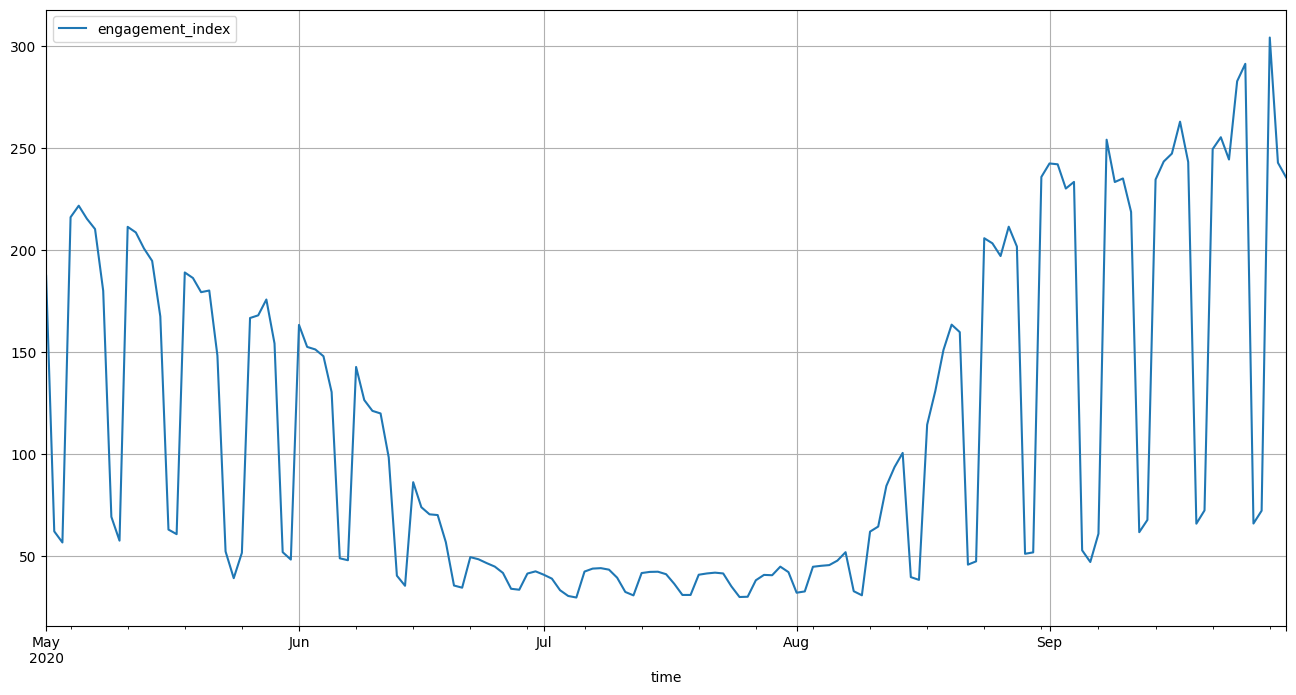

In [78]:
# trend for engagement_index between May 2020 and Sept 2020
matplotlib.rcParams['figure.figsize']= [16, 8]
start_date = datetime(2020,5,1)
end_date = datetime(2020,9,30)
engagement_data_by_date22[(start_date<=engagement_data_by_date22.index) & (engagement_data_by_date22.index<=end_date)].plot(y='engagement_index',grid=True)
plt.show()

---
**Q: What is the trend for pct_access between May 2020 and Sep 2020?**

---

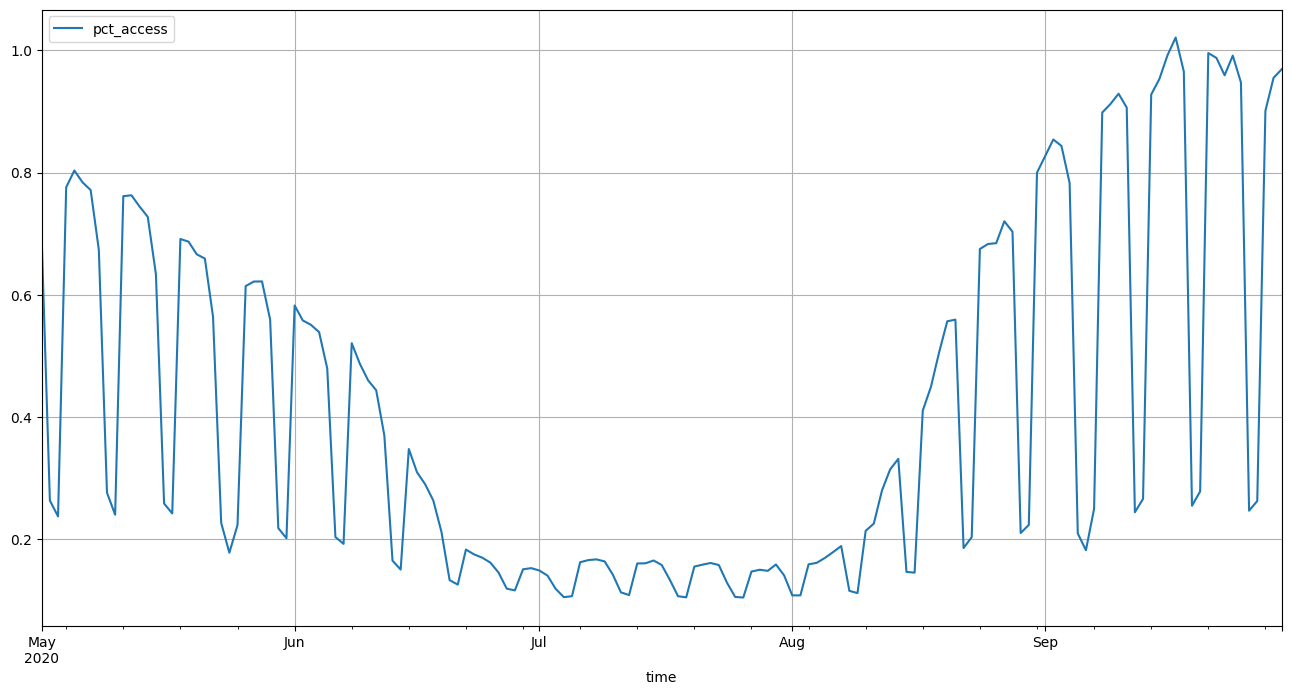

In [79]:
# trend for pct_access between May 2020 and Sept 2020
matplotlib.rcParams['figure.figsize']= [16, 8]
engagement_data_by_date22[(start_date<=engagement_data_by_date22.index) & (engagement_data_by_date22.index<=end_date)].plot(y='pct_access',grid=True)
plt.show()

---
**Q: What is the distribution for shape of data for engagement_index with respect to time?**

---

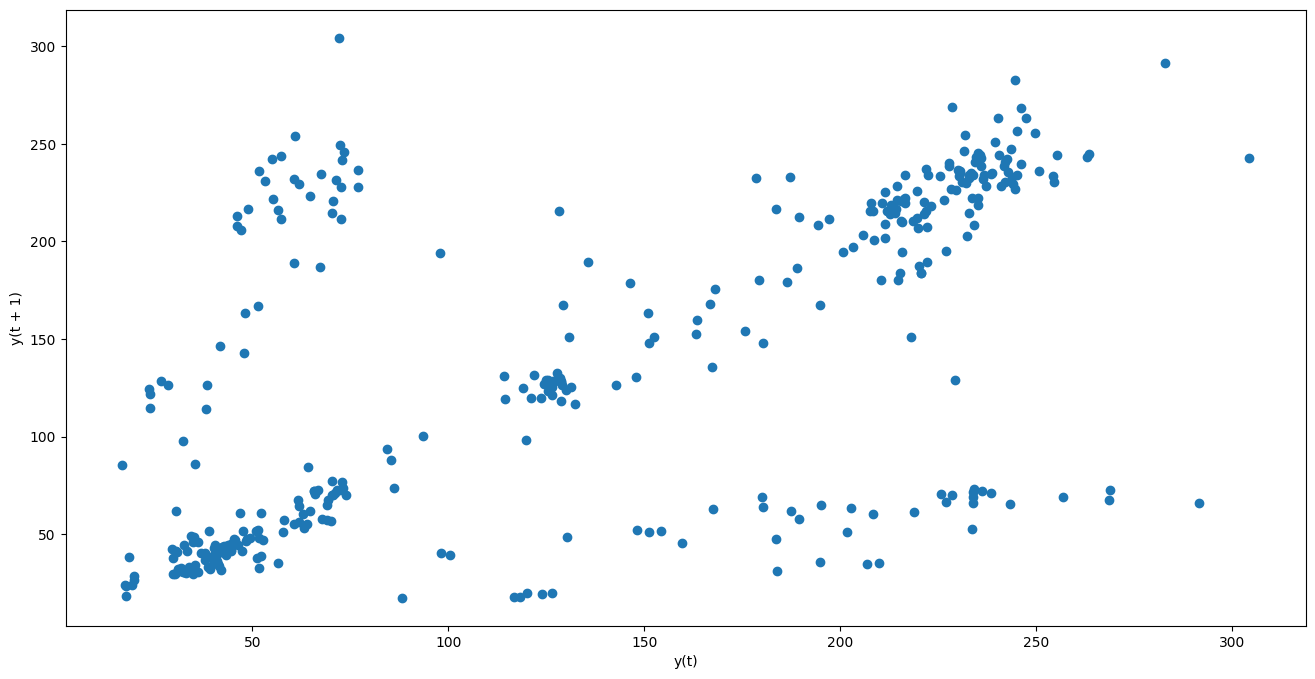

In [80]:
#Checking with lag_plot for engagement_index
from pandas.plotting import lag_plot
plt.figure(figsize=(16,8))
lag_plot(engagement_data_by_date22.engagement_index)
plt.show()

* Above lag plot for **engagement_index** shows that there is linear shape distribution but also contains outliers.

---
**Q: What is the distribution for shape of data for pct_access with respect to time?**

---

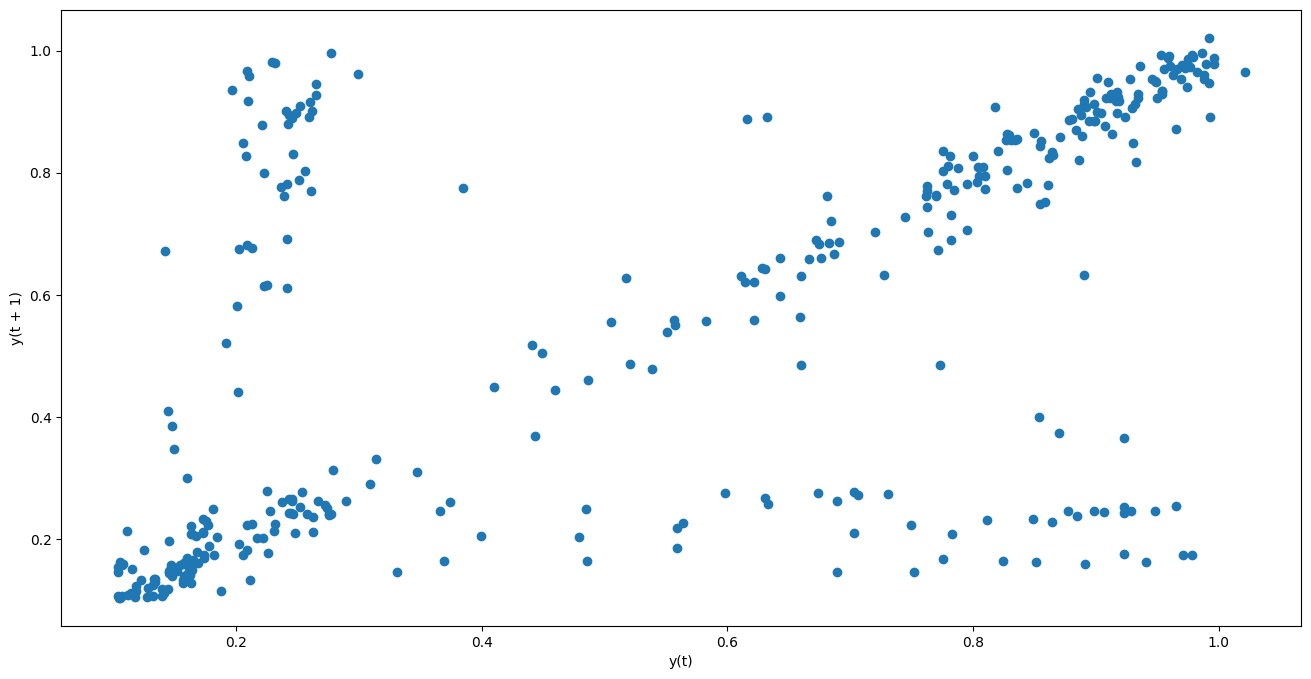

In [81]:
#Checking with lag_plot for pct_access
from pandas.plotting import lag_plot
plt.figure(figsize=(16,8))
lag_plot(engagement_data_by_date22.pct_access)
plt.show()

* Above lag plot for **pct_access** shows that there is linear shape distribution but also contains outliers.

---

---
**Handle merge of engagement data with districts info and products info:**

---

* Need to merge districts_data with engagement_data using district_id as key.

In [82]:
# merge dataframe using district_id as key
learn__Platform_data = pd.merge(engagement_dataframe,districts_dataframe,on=['district_id'])

In [83]:
# print summary of dataframe
learn__Platform_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12360909 entries, 0 to 12360908
Data columns (total 11 columns):
 #   Column                    Non-Null Count     Dtype         
---  ------                    --------------     -----         
 0   time                      12360909 non-null  datetime64[ns]
 1   lp_id                     12360909 non-null  int64         
 2   pct_access                12360909 non-null  float64       
 3   engagement_index          12360909 non-null  float64       
 4   district_id               12360909 non-null  int64         
 5   state                     12360909 non-null  object        
 6   locale                    12360909 non-null  object        
 7   pct_black/hispanic        12360909 non-null  float64       
 8   pct_free/reduced          12360909 non-null  float64       
 9   county_connections_ratio  12360909 non-null  float64       
 10  pp_total_raw              12360909 non-null  float64       
dtypes: datetime64[ns](1), float64(6), i

* Need to merge products_data with engagement_data using lp_id as key.

In [84]:
# merge dataframe using lp_id as key
learn__Platform_data = pd.merge(learn__Platform_data,products_dataframe,on=['lp_id'])

In [85]:
# print summary of dataframe
learn__Platform_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6846182 entries, 0 to 6846181
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   time                        6846182 non-null  datetime64[ns]
 1   lp_id                       6846182 non-null  int64         
 2   pct_access                  6846182 non-null  float64       
 3   engagement_index            6846182 non-null  float64       
 4   district_id                 6846182 non-null  int64         
 5   state                       6846182 non-null  object        
 6   locale                      6846182 non-null  object        
 7   pct_black/hispanic          6846182 non-null  float64       
 8   pct_free/reduced            6846182 non-null  float64       
 9   county_connections_ratio    6846182 non-null  float64       
 10  pp_total_raw                6846182 non-null  float64       
 11  URL                     

---

# Data Definition/Description of LearnPlatform dataset

---

**Data Definition:**

D) LearnPlatform data
* learnPlatform_data is created from merge of engagement_data with districts_data using district_id and products_data using lp_id.

---

**Q: What is the new structure of learnPlatform dataset?**

---
| No. | Feature Name | Description of the feature |
| :-- | :--| :--|
|01| **time**   | date in "YYYY-MM-DD"                          |
|02| **lp_id** | The unique identifier of the product                 |
|03| **pct_access**   | Percentage of students in the district have at least one page-load event of a given product and on a given day                          |
|04| **engagement_index**   | Total page-load events per one thousand students of a given product and on a given day |
|05| **district_id**   |The unique identifier of the school district|
|06| **state** | The state where the district resides in                 |
|07| **locale**   | NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information. |
|08| **pct_black/hispanic** | Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data |
|09| **pct_free/reduced**   | Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data |
|10| **county_connections_ratio**   | ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.|
|11| **pp_total_raw**   | Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.|
|12| **URL** | Web Link to the specific product                 |
|13| **Product Name**   | Name of the specific product|
|14| **Provider/Company Name** | Name of the product provider                 |
|15| **Sector(s)**   | Sector of education where the product is used|
|16| **Primary Essential Function** | The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled|





In [86]:
# print summary of dataframe
learn__Platform_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6846182 entries, 0 to 6846181
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   time                        6846182 non-null  datetime64[ns]
 1   lp_id                       6846182 non-null  int64         
 2   pct_access                  6846182 non-null  float64       
 3   engagement_index            6846182 non-null  float64       
 4   district_id                 6846182 non-null  int64         
 5   state                       6846182 non-null  object        
 6   locale                      6846182 non-null  object        
 7   pct_black/hispanic          6846182 non-null  float64       
 8   pct_free/reduced            6846182 non-null  float64       
 9   county_connections_ratio    6846182 non-null  float64       
 10  pp_total_raw                6846182 non-null  float64       
 11  URL                     

---
**Q: What does data looks like for learnPlatform dataset?**

---

In [87]:
# print first 10 rows of dataframe
learn__Platform_data.head(5)

time  lp_id  pct_access  engagement_index  district_id     state  \
0 2020-01-01  53399        0.04              8.19         1052  Illinois   
1 2020-01-02  53399        0.12             25.39         1052  Illinois   
2 2020-01-03  53399        0.04              5.32         1052  Illinois   
3 2020-01-04  53399        0.25             18.02         1052  Illinois   
4 2020-01-05  53399        0.20             28.26         1052  Illinois   

   locale  pct_black/hispanic  pct_free/reduced  county_connections_ratio  \
0  Suburb                 0.3               0.3                      0.59   
1  Suburb                 0.3               0.3                      0.59   
2  Suburb                 0.3               0.3                      0.59   
3  Suburb                 0.3               0.3                      0.59   
4  Suburb                 0.3               0.3                      0.59   

   pp_total_raw                                 URL      Product Name  \
0       17000.0  https://spark.adobe.com/about/page  Adobe Spark Page   
1       17000.0  https://spark.adobe.com/about/page  Adobe Spark Page   
2       17000.0  https://spark.adobe.com/about/page  Adobe Spark Page   
3       17000.0  https://spark.adobe.com/about/page  Adobe Spark Page   
4       17000.0  https://spark.adobe.com/about/page  Adobe Spark Page   

  Provider/Company Name Sector(s)       Primary Essential Function  
0            Adobe Inc.   PreK-12  LC - Digital Learning Platforms  
1            Adobe Inc.   PreK-12  LC - Digital Learning Platforms  
2            Adobe Inc.   PreK-12  LC - Digital Learning Platforms  
3            Adobe Inc.   PreK-12  LC - Digital Learning Platforms  
4            Adobe Inc.   PreK-12  LC - Digital Learning Platforms

---
**Q: What is the overall statistics description for learnPlatform dataset?**

---

In [88]:
# print descriptive statistics for both object and numeric type
learn__Platform_data.describe(include='all',datetime_is_numeric=True).transpose()

count unique                              top  \
time                          6846182    NaN                              NaN   
lp_id                       6846182.0    NaN                              NaN   
pct_access                  6846182.0    NaN                              NaN   
engagement_index            6846182.0    NaN                              NaN   
district_id                 6846182.0    NaN                              NaN   
state                         6846182     22                      Connecticut   
locale                        6846182      4                           Suburb   
pct_black/hispanic          6846182.0    NaN                              NaN   
pct_free/reduced            6846182.0    NaN                              NaN   
county_connections_ratio    6846182.0    NaN                              NaN   
pp_total_raw                6846182.0    NaN                              NaN   
URL                           6846182    369          http://docs.google.com/   
Product Name                  6846182    369                      Google Docs   
Provider/Company Name         6846182    289                       Google LLC   
Sector(s)                     6846182      5                          PreK-12   
Primary Essential Function    6846182     35  LC - Digital Learning Platforms   

                               freq                           mean  \
time                            NaN  2020-07-07 19:09:40.855023360   
lp_id                           NaN                   54963.663806   
pct_access                      NaN                       1.037242   
engagement_index                NaN                     258.319783   
district_id                     NaN                    5197.881231   
state                       1081995                            NaN   
locale                      4202589                            NaN   
pct_black/hispanic              NaN                       0.251313   
pct_free/reduced                NaN                       0.340137   
county_connections_ratio        NaN                        0.59016   
pp_total_raw                    NaN                   11774.976476   
URL                           53219                            NaN   
Product Name                  53219                            NaN   
Provider/Company Name        842990                            NaN   
Sector(s)                   2991455                            NaN   
Primary Essential Function  1665899                            NaN   

                                            min                  25%  \
time                        2020-01-01 00:00:00  2020-04-01 00:00:00   
lp_id                                   10533.0              31827.0   
pct_access                                  0.0                 0.03   
engagement_index                           0.01                 0.91   
district_id                              1000.0               2956.0   
state                                       NaN                  NaN   
locale                                      NaN                  NaN   
pct_black/hispanic                          0.1                  0.1   
pct_free/reduced                            0.1                  0.1   
county_connections_ratio                   0.59                 0.59   
pp_total_raw                             5000.0               9000.0   
URL                                         NaN                  NaN   
Product Name                                NaN                  NaN   
Provider/Company Name                       NaN                  NaN   
Sector(s)                                   NaN                  NaN   
Primary Essential Function                  NaN                  NaN   

                                            50%                  75%  \
time                        2020-07-07 00:00:00  2020-10-17 00:00:00   
lp_id                                   55031.0              77698.0   
pct_access            

In [89]:
# print summary of dataframe
learn__Platform_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6846182 entries, 0 to 6846181
Data columns (total 16 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   time                        datetime64[ns]
 1   lp_id                       int64         
 2   pct_access                  float64       
 3   engagement_index            float64       
 4   district_id                 int64         
 5   state                       object        
 6   locale                      object        
 7   pct_black/hispanic          float64       
 8   pct_free/reduced            float64       
 9   county_connections_ratio    float64       
 10  pp_total_raw                float64       
 11  URL                         object        
 12  Product Name                object        
 13  Provider/Company Name       object        
 14  Sector(s)                   object        
 15  Primary Essential Function  object        
dtypes: datetime64[ns](

---
# Data Analysis/EDA of learnPlatform dataset

---

**learnPlatform dataset data distribution:**

* Explore learnPlatform dataset and check distribution of data with respect to various features (columns)

---

---
**Q: What is the distribution for Primary Essential Function with respect to engagement_index?**

---

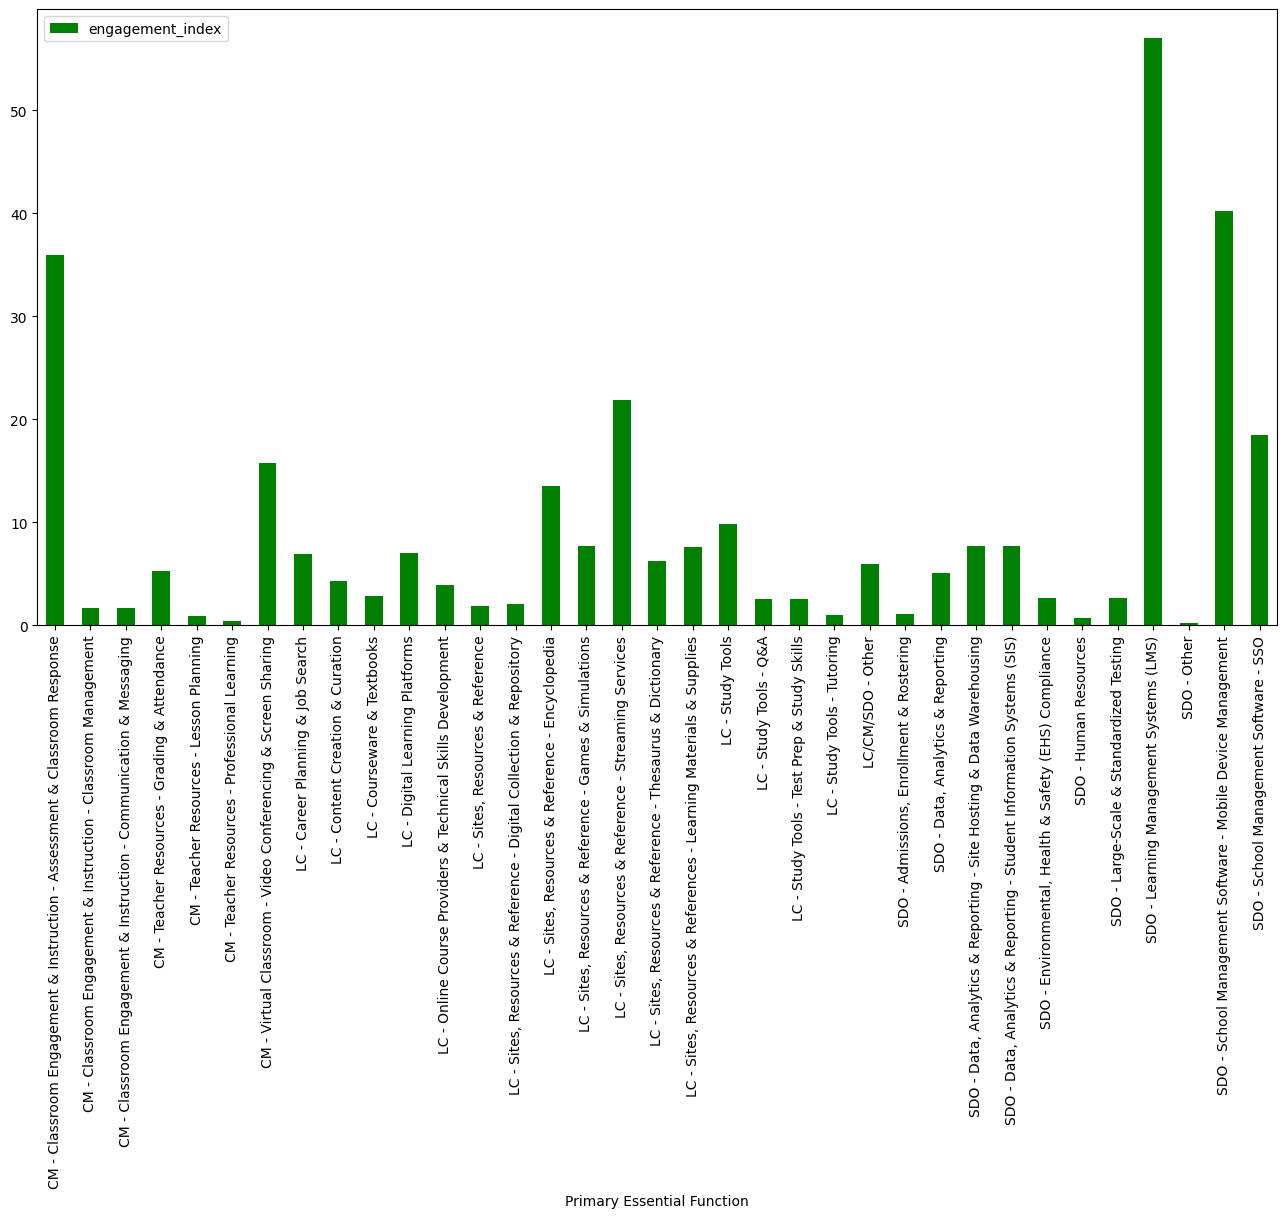

In [90]:
# distribution of Primary Essential Function with respect to engagement_index
learn__Platform_data.groupby('Primary Essential Function')[['engagement_index']].median().plot(kind='bar', figsize=(16, 8), color=['Green'])
plt.show()

* Above plot shows that **engagement_index** is higher for Primary Essential Function such as 'SDO-School Management Software- Mobile Device Management', 'SDO - Learning Management System (LMS)', 'SDO -School Management Software -SSO' and 'LC- Sites, Resources and References - Encyclopedia' followed by 'LC-Sites, Resources and References - Streaming Services' and 'LC - Study Tools'.

---
**Q: What is the distribution for Primary Essential Function with respect to pct_access?**

---

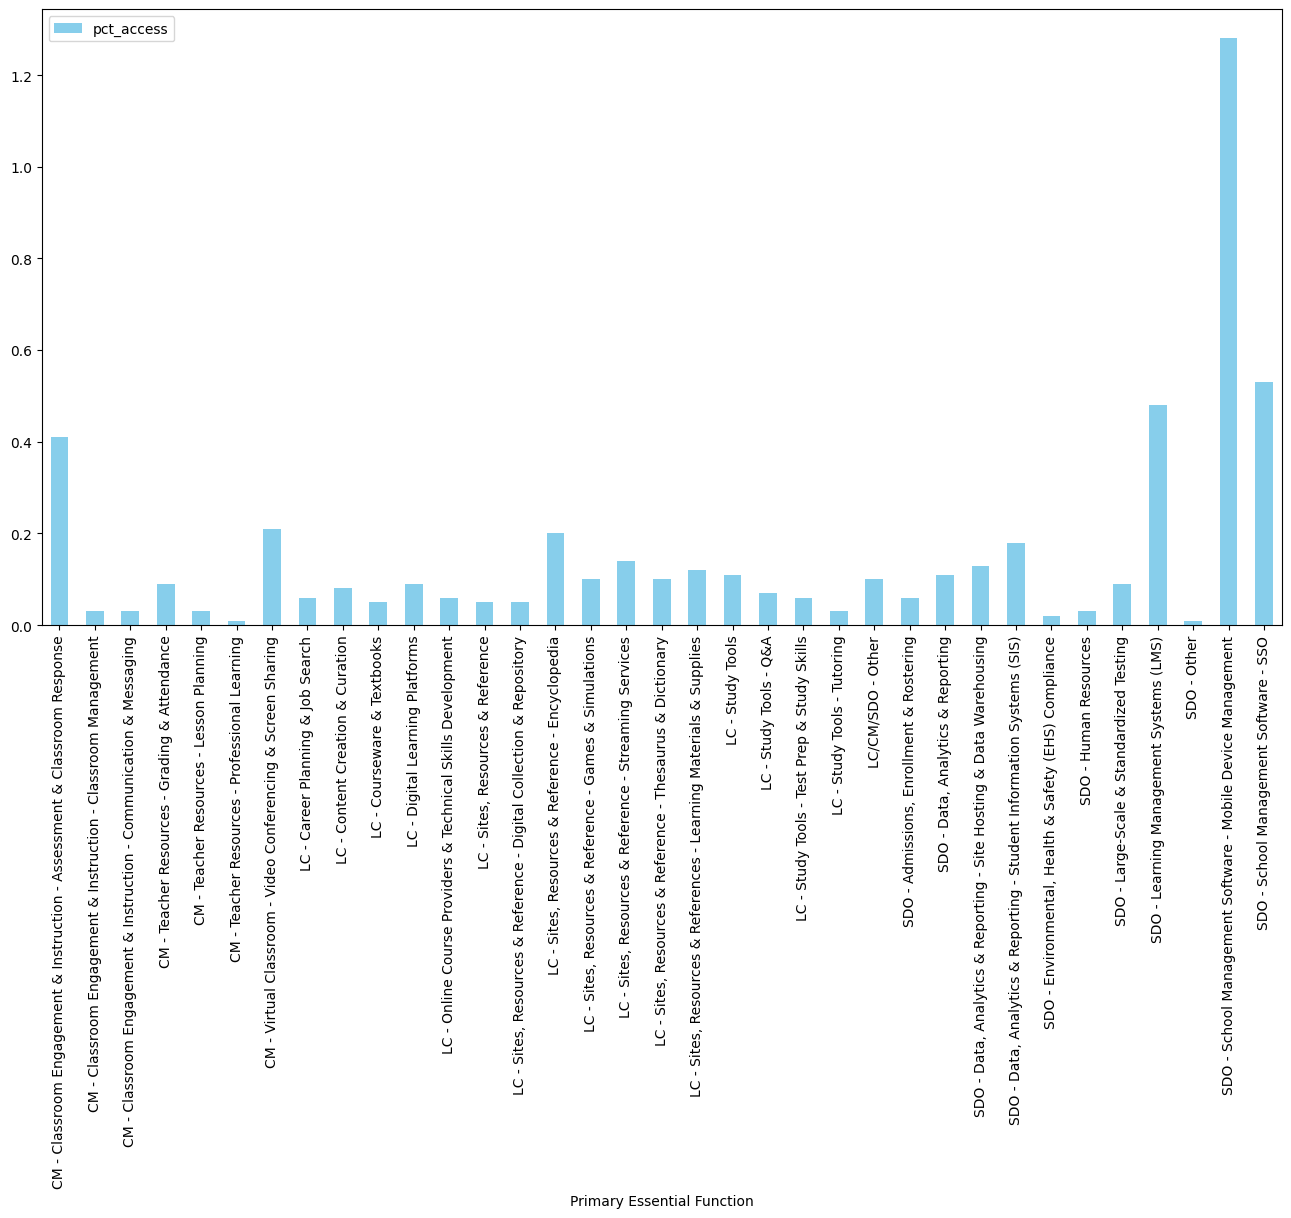

In [91]:
# distribution of Primary Essential Function with respect to pct_acess
learn__Platform_data.groupby('Primary Essential Function')[['pct_access']].median().plot(kind='bar', figsize=(16, 8), color=['skyblue'])
plt.show()

* Above plot shows that **pct_access** is higher for Primary Essential Function such as 'SDO-School Management Software- Mobile Device Management', 'SDO -School Management Software -SSO' followed by 'LC- Sites, Resources and References - Encyclopedia'.

---
**Q: What is the distribution for Sector(s) with respect to engagement_index?**

---

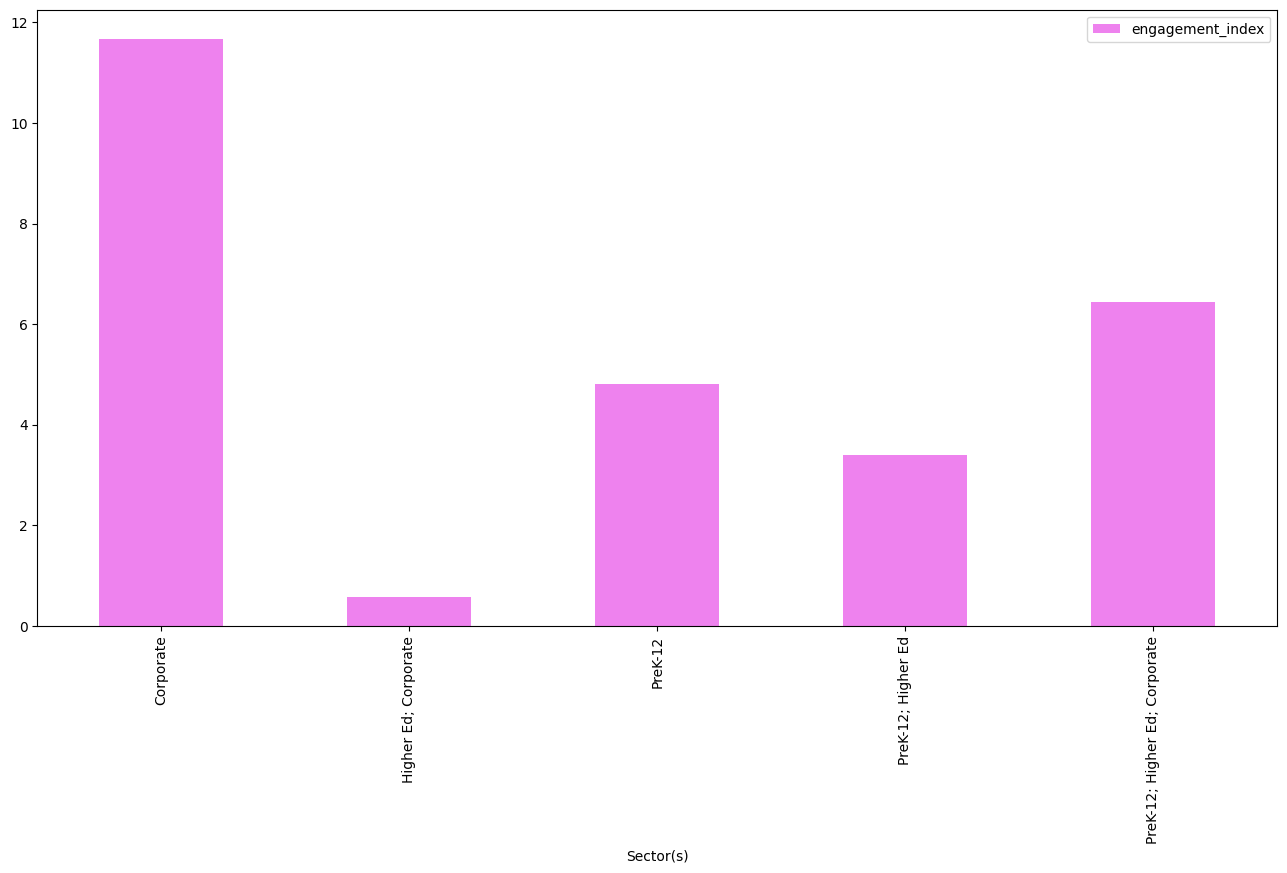

In [92]:
# distribution of Sectors with respect to engagement_index
learn__Platform_data.groupby('Sector(s)')[['engagement_index']].median().plot(kind='bar', figsize=(16, 8), color=['violet'])
plt.show()

* Above plot shows that **engagement_index** is higher for 'Corporate' followed by 'Prek-12;Higher Ed;Corporate' category.

---
**Q: What is the distribution for Sector(s) with respect to pct_access?**

---

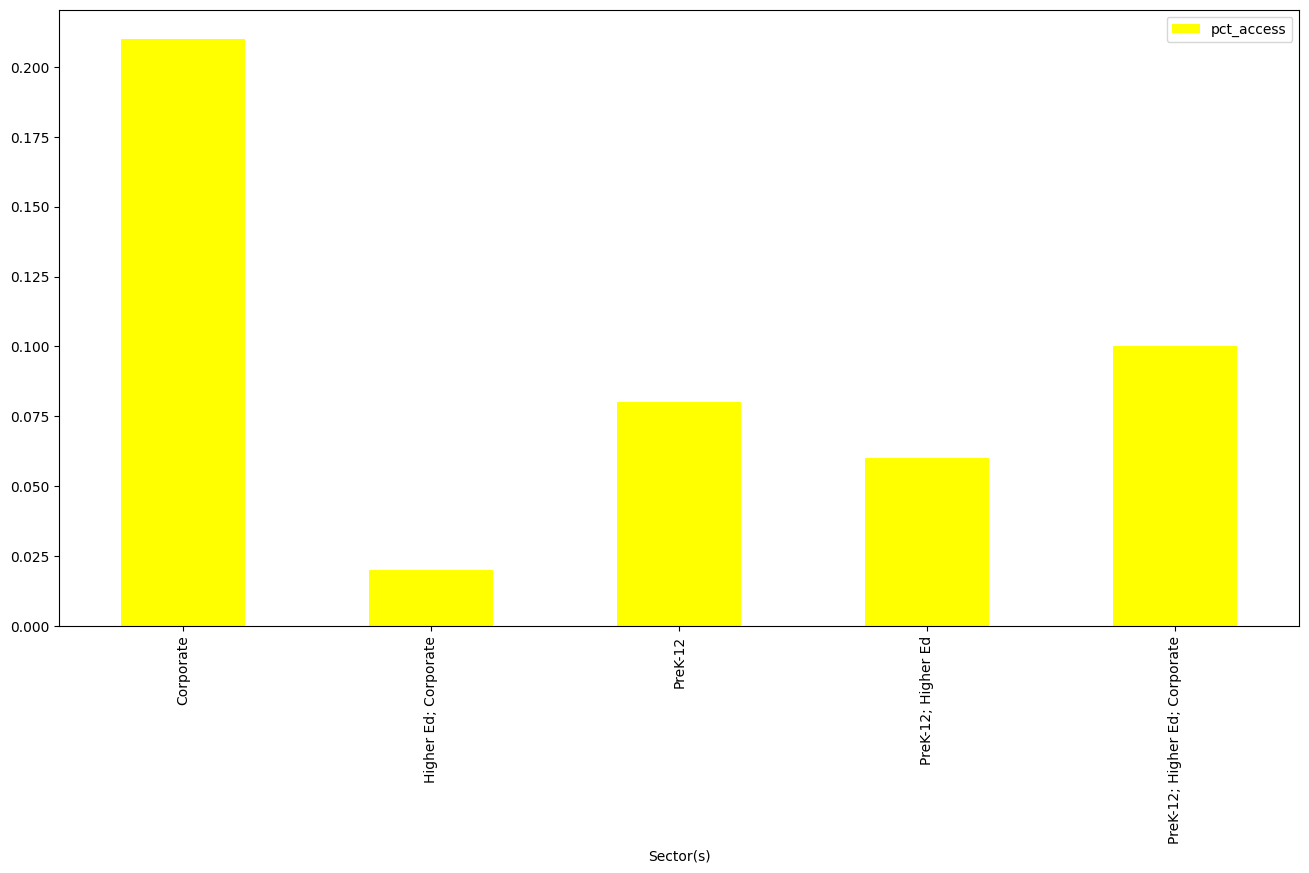

In [93]:
# distribution of Sectors with respect to pct_index
learn__Platform_data.groupby('Sector(s)')[['pct_access']].median().plot(kind='bar', figsize=(16, 8), color=['yellow'])
plt.show()

* Above plot shows that **pct_access** is higher for 'Corporate' followed by 'Prek-12;Higher Ed;Corporate' category.

---
**Q: What is the correlation value between numeric variables?**

---

In [94]:
#checking correlation between numeric variables
learn__Platform_data.corr()

<ipython-input-94-4056d8e94de3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  learn__Platform_data.corr()


lp_id  pct_access  engagement_index  district_id  \
lp_id                     1.000000    0.059346          0.047553    -0.004195   
pct_access                0.059346    1.000000          0.733094    -0.001161   
engagement_index          0.047553    0.733094          1.000000     0.001762   
district_id              -0.004195   -0.001161          0.001762     1.000000   
pct_black/hispanic       -0.001915   -0.016329         -0.011080     0.068327   
pct_free/reduced          0.001735   -0.019005         -0.013028    -0.006337   
county_connections_ratio  0.000586    0.007795          0.001471    -0.011677   
pp_total_raw              0.001442    0.031840          0.021871     0.043147   

                          pct_black/hispanic  pct_free/reduced  \
lp_id                              -0.001915          0.001735   
pct_access                         -0.016329         -0.019005   
engagement_index                   -0.011080         -0.013028   
district_id                         0.068327         -0.006337   
pct_black/hispanic                  1.000000          0.644704   
pct_free/reduced                    0.644704          1.000000   
county_connections_ratio           -0.008703         -0.016235   
pp_total_raw                        0.030620         -0.055185   

                          county_connections_ratio  pp_total_raw  
lp_id                                     0.000586      0.001442  
pct_access                                0.007795      0.031840  
engagement_index                          0.001471      0.021871  
district_id                              -0.011677      0.043147  
pct_black/hispanic                       -0.008703      0.030620  
pct_free/reduced                         -0.016235     -0.055185  
county_connections_ratio                  1.000000     -0.003050  
pp_total_raw                             -0.003050      1.000000

* engagement_index and pct_access appears to have positive correlation.
* pct_black/hispanic and pct_free/reduced appears to have positive correlation.

---
**Q: What is the correlation heatmap between numeric variables?**

---

<ipython-input-95-be5b39abb733>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = learn__Platform_data.corr(method='pearson')


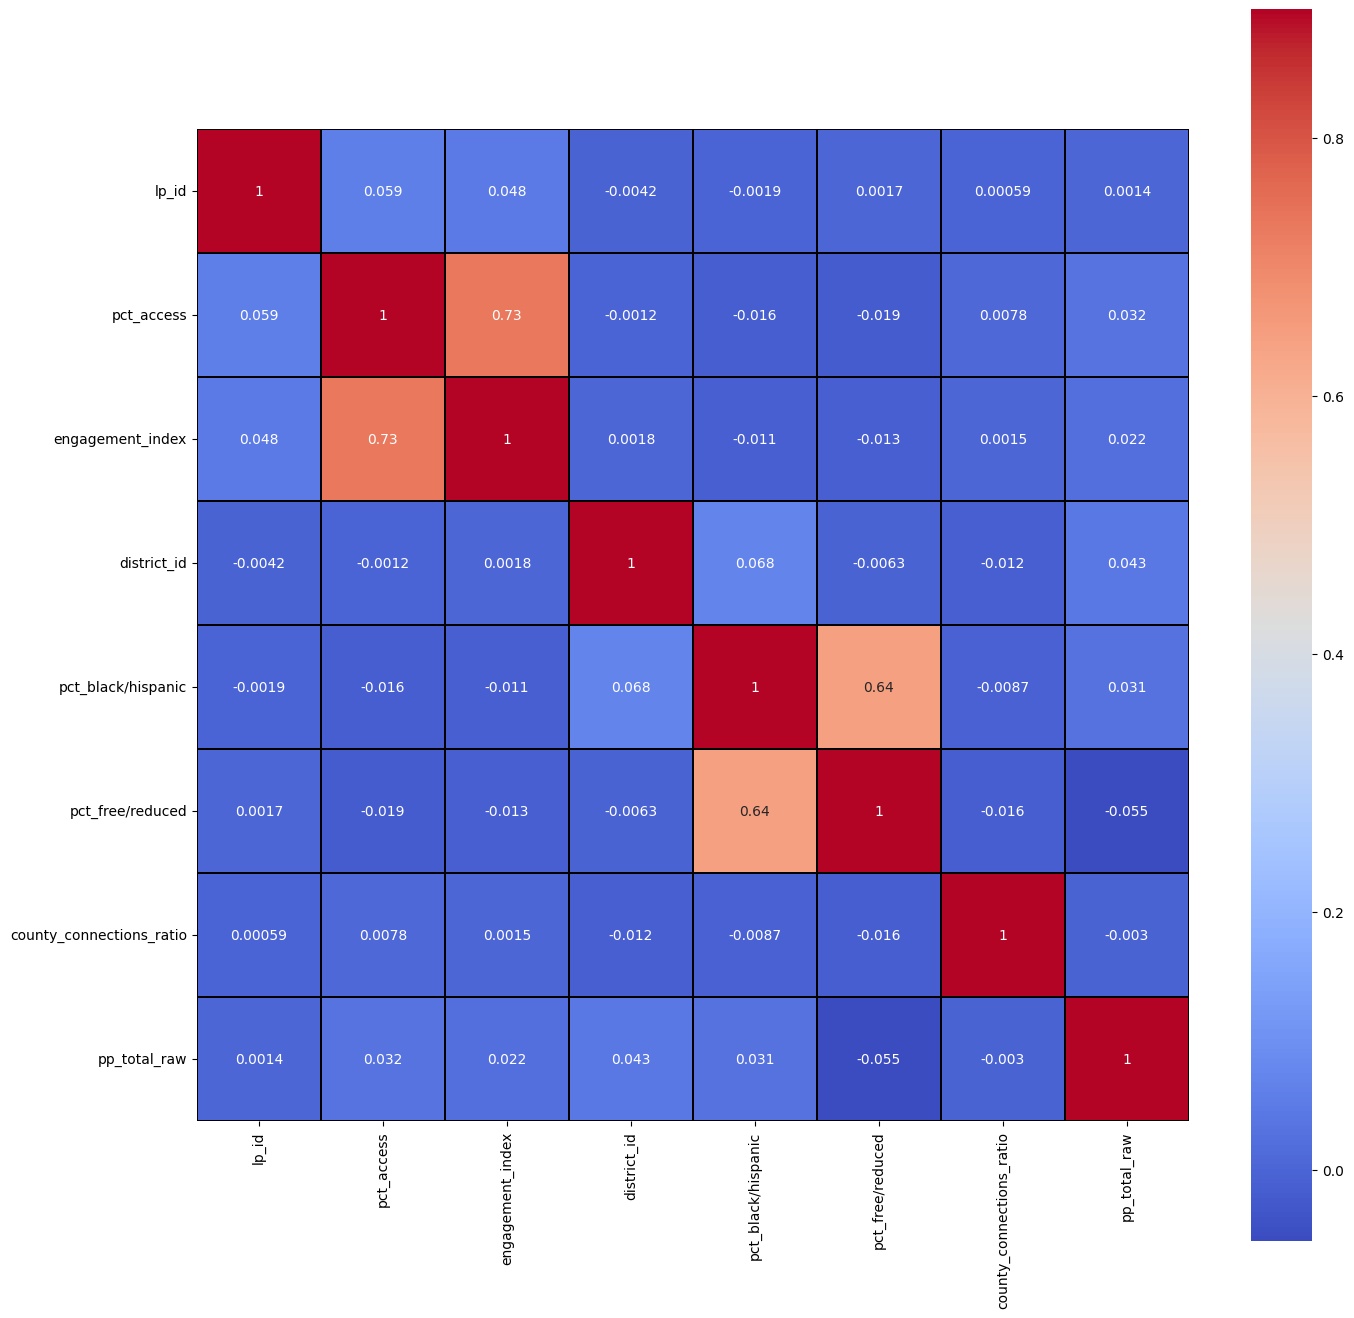

In [95]:
#checking correlation between numeric variables via heatmap
corr = learn__Platform_data.corr(method='pearson')
plt.figure(figsize=(16,16))
sns.heatmap(corr,vmax=.9,linewidth=.01, square = True, annot = True,cmap='coolwarm',linecolor ='black')
plt.show()

* engagement_index and pct_access appears to have positive correlation.
* pct_black/hispanic and pct_free/reduced appears to have positive correlation.

---
**Q: What is the distribution for locale with respect to engagement_index?**

---

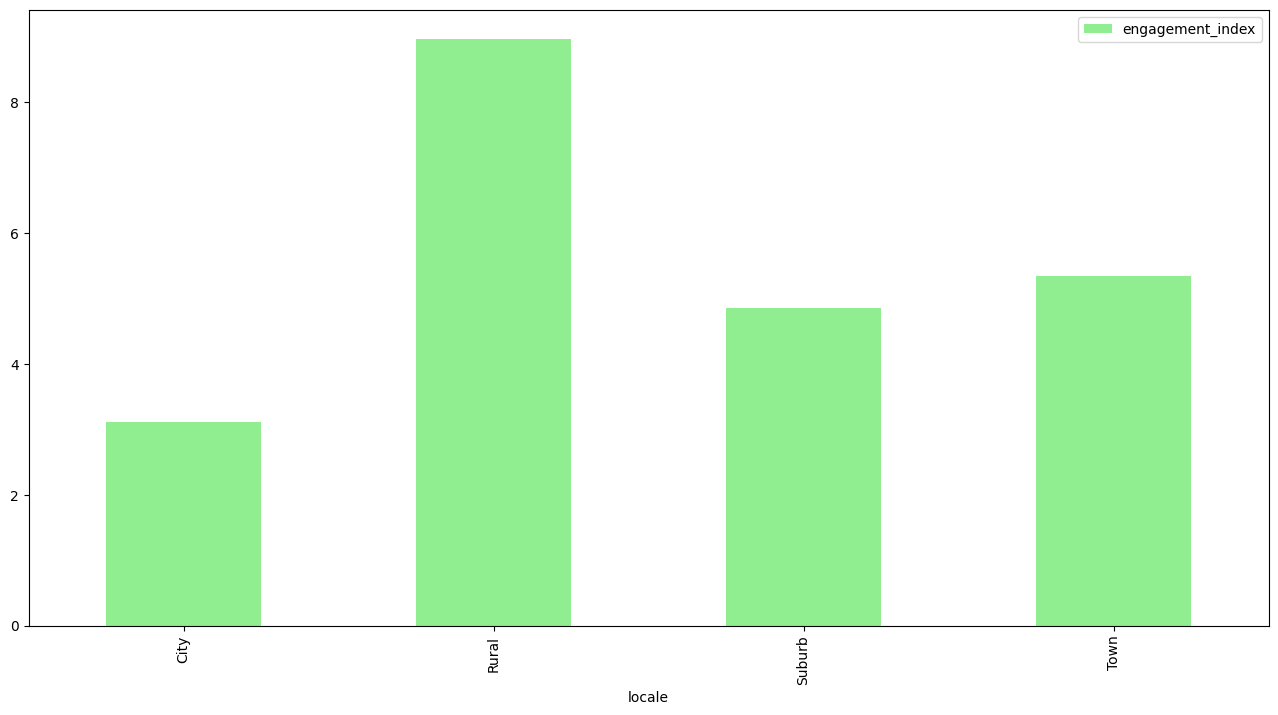

In [96]:
# distribution of group by locale with respect to engagement_index
learn__Platform_data.groupby(['locale'])[['engagement_index']].median().plot(kind='bar', figsize=(16, 8),color=['lightgreen'])
plt.show()

* Above plot shows that **engagement_index** is higher for 'Rural' followed by 'Suburb' and 'Town'

---
**Q: What is the distribution for locale with respect to pct_index?**

---

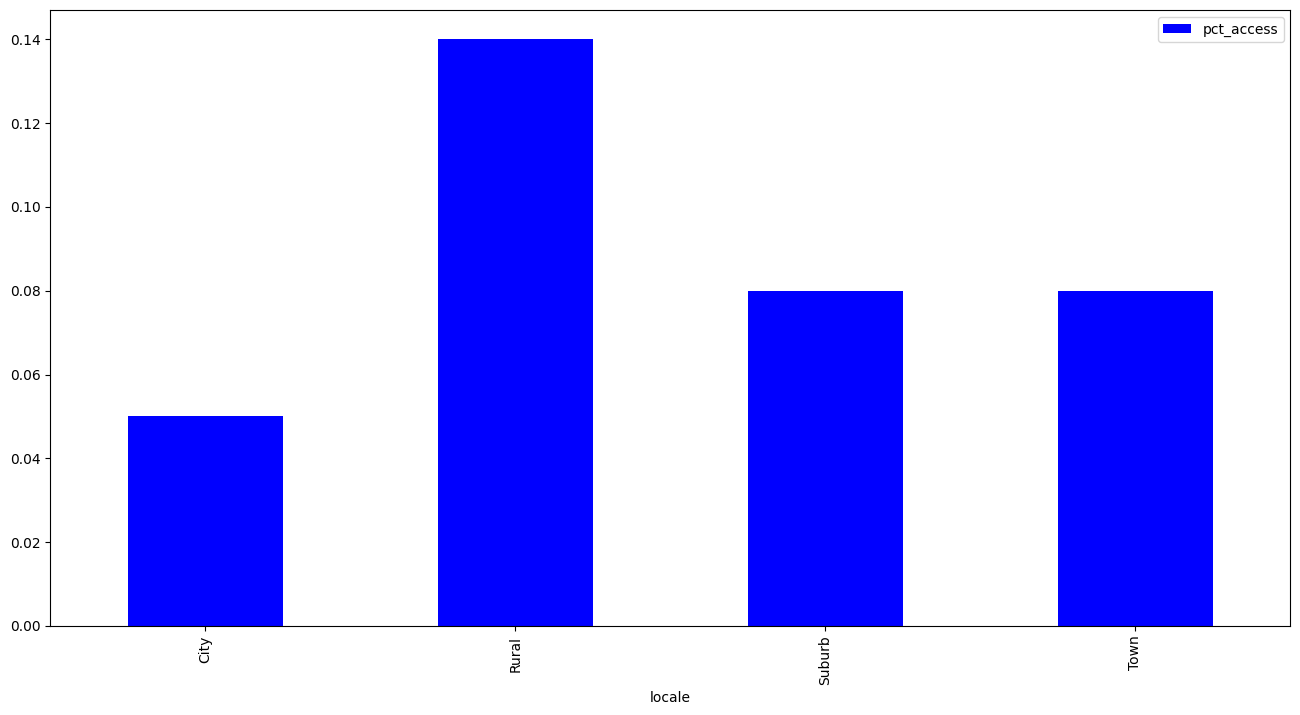

In [97]:
# distribution of group by locale with respect to pct_access
learn__Platform_data.groupby(['locale'])[['pct_access']].median().plot(kind='bar', figsize=(16, 8),color=['blue'])
plt.show()

* Above plot shows that **pct_access** is higher for 'Rural' followed by 'Suburb' and 'Town'.

---
**Q: What is the distribution for state with respect to engagement_index?**

---

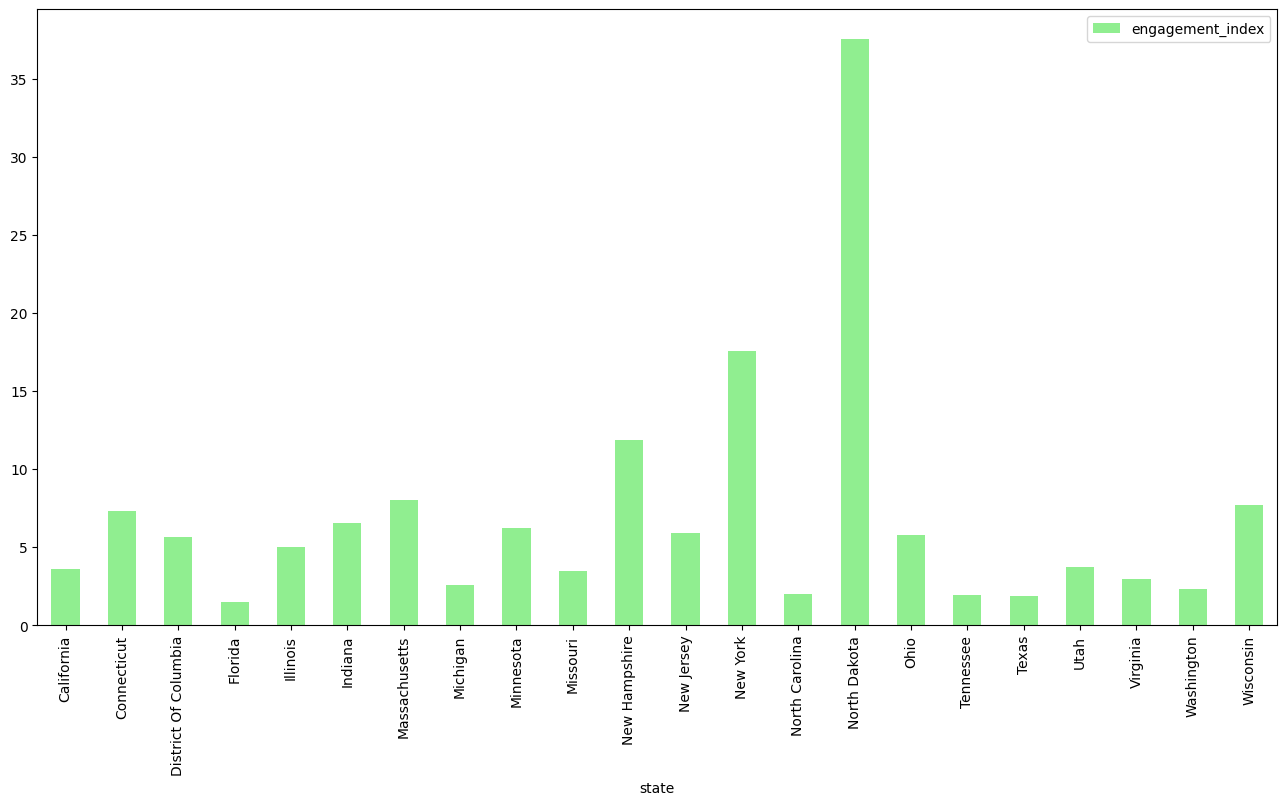

In [98]:
# distribution of group by state with respect to engagement_index
learn__Platform_data.groupby(['state'])[['engagement_index']].median().plot(kind='bar', figsize=(16, 8), color=['lightgreen'])
plt.show()

* Above plot shows that **engagement_index** is higher for 'North Dakota' followed by 'New York' and 'New Hampshire'.

---
**Q: What is the distribution for state with respect to pct_access?**

---

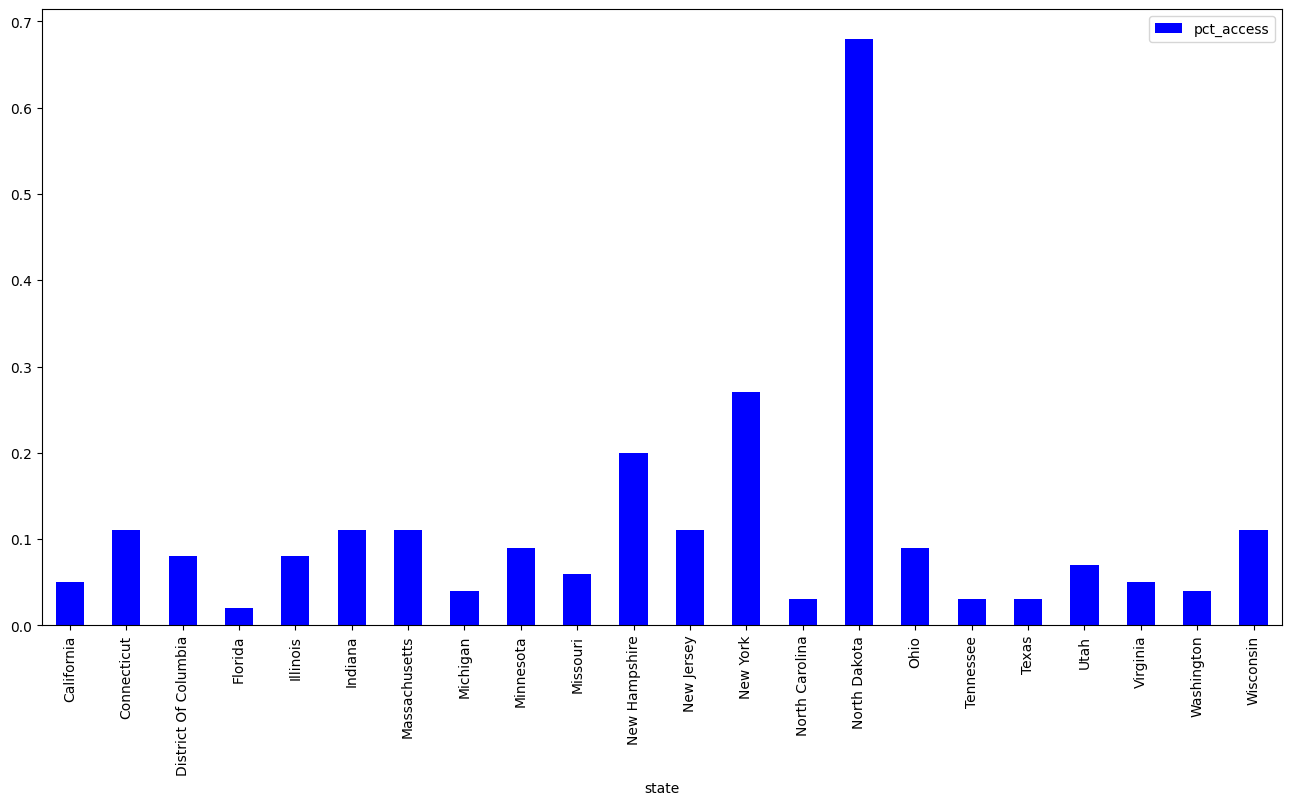

In [99]:
# distribution of group by state with respect to pct_access
learn__Platform_data.groupby(['state'])[['pct_access']].median().plot(kind='bar', figsize=(16, 8), color=['blue'])
plt.show()

* Above plot shows that **pct_access** is higher for North Dakota followed by 'New York' and 'New Hampshire'.

---

# Summary

---

**EDA Involves:**
* the **state of digital learning in 2020** and
* **how the engagement of digital learning relates** to factors such as **district demographics**, **broadband access**, and **state/national level policies and events**.

There was major disruption due to COVID-19 in 2020 and especially during peak case surge between May 2020 to Sept 2020 in USA (COVID-19 Case data) and it impacted every district primarily due to lockdown which resulted on closure of business and schools.

---

* What is the picture of **digital connectivity** and **engagement** in 2020?

Based on trend analysis with respect to engagement index, there was significant impact due to COVID-19 especially during peak case surge between May 2020 to Sept 2020 across demographics for digital connectivity and engagement.

---
* What is the effect of the COVID-19 pandemic on **online and distance learning**, and how might this also evolve in the future?

Based on trend analysis the effect of COVID-19 on online and distance learning was significant and it varies across demographics,Sector(s),Primary Essential Function and Product Name access.

---
* How does **student engagement** with different types of education technology change over the course of the pandemic?

Based on trend analysis with engagement index, student engagement was higher with SDO and CM level primary essential function followed by LC Level primary eseential function.

---
* How does **student engagement** with online learning platforms relate to different **geography**? **Demographic** context (e.g., race/ethnicity, ESL, learning disability)? **Learning** context? **Socioeconomic** status?

Based on trend analysis with enagement index, student engagement appears higher for Rural locale followed by Suburb and Town, state such as North Dakota , New York and New Hampshire appeared to be higher side for enagement index as they also had majority of Rural locale with higher engagement index.

---
* Do certain state **interventions, practices or policies** (e.g., stimulus, reopening, eviction moratorium) **correlate** with the increase or decrease online engagement?

This trend was not clearly visible with available dataset but may be possible by comparing with public dataset on COVID-19 policies.

---

**Highlights:**

---
**Q:What are the top 10 Product Name with respect to Engagement Index?**

---

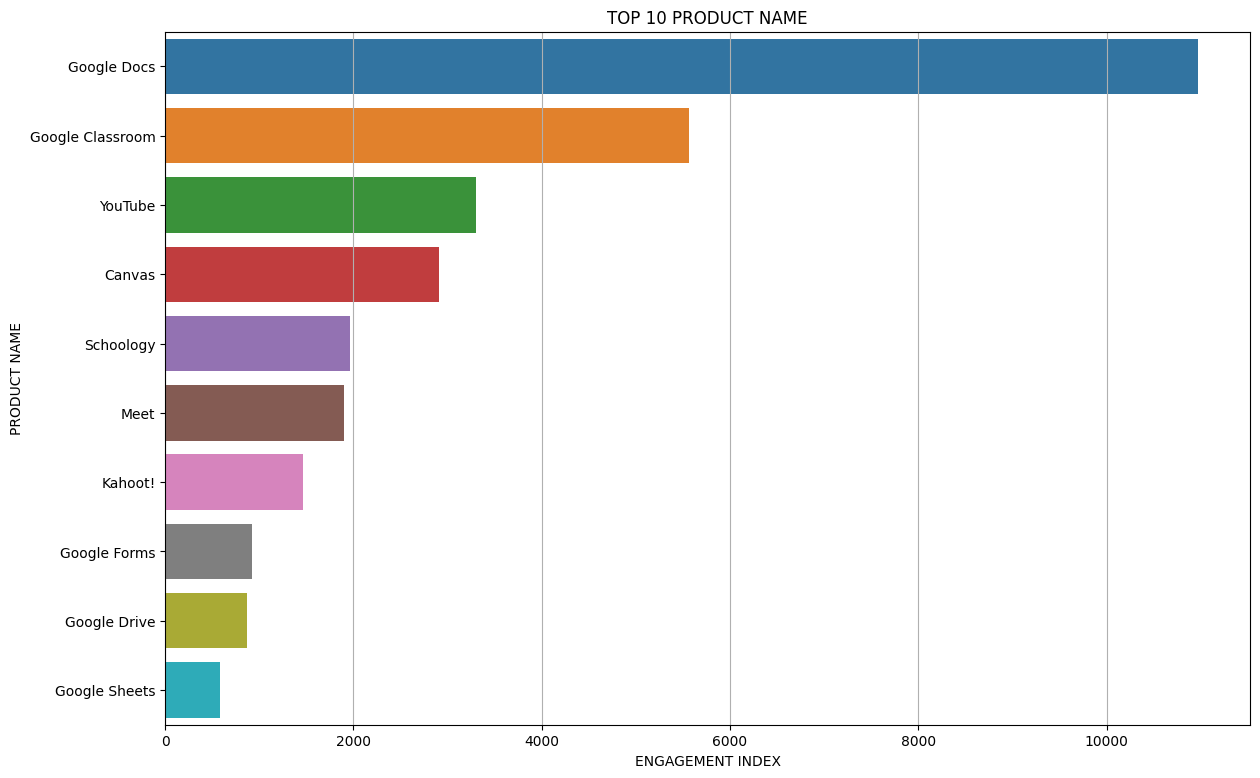

In [100]:
# Get product name sorted by engagement_index
top___product_name = learn__Platform_data.groupby(by='Product Name', as_index=False)['engagement_index'].agg('mean').sort_values(by='engagement_index', ascending=False)

# Set plot figure size
figure = plt.figure(figsize=[14, 9])

# Plot comparison of top 10 product names
sns.barplot(x='engagement_index', y='Product Name', data=top___product_name[0:10])

# Set plot labels
plt.xlabel('ENGAGEMENT INDEX')
plt.ylabel('PRODUCT NAME')
plt.title('TOP 10 PRODUCT NAME')

# Using the grid function without specifying 'b'
plt.grid(axis='x')

plt.show()


* Google docs and Google Classroom seems to dominate with respect to **engagement_index**

---
**Q:What are the top Sectors with respect to Engagement Index?**

---

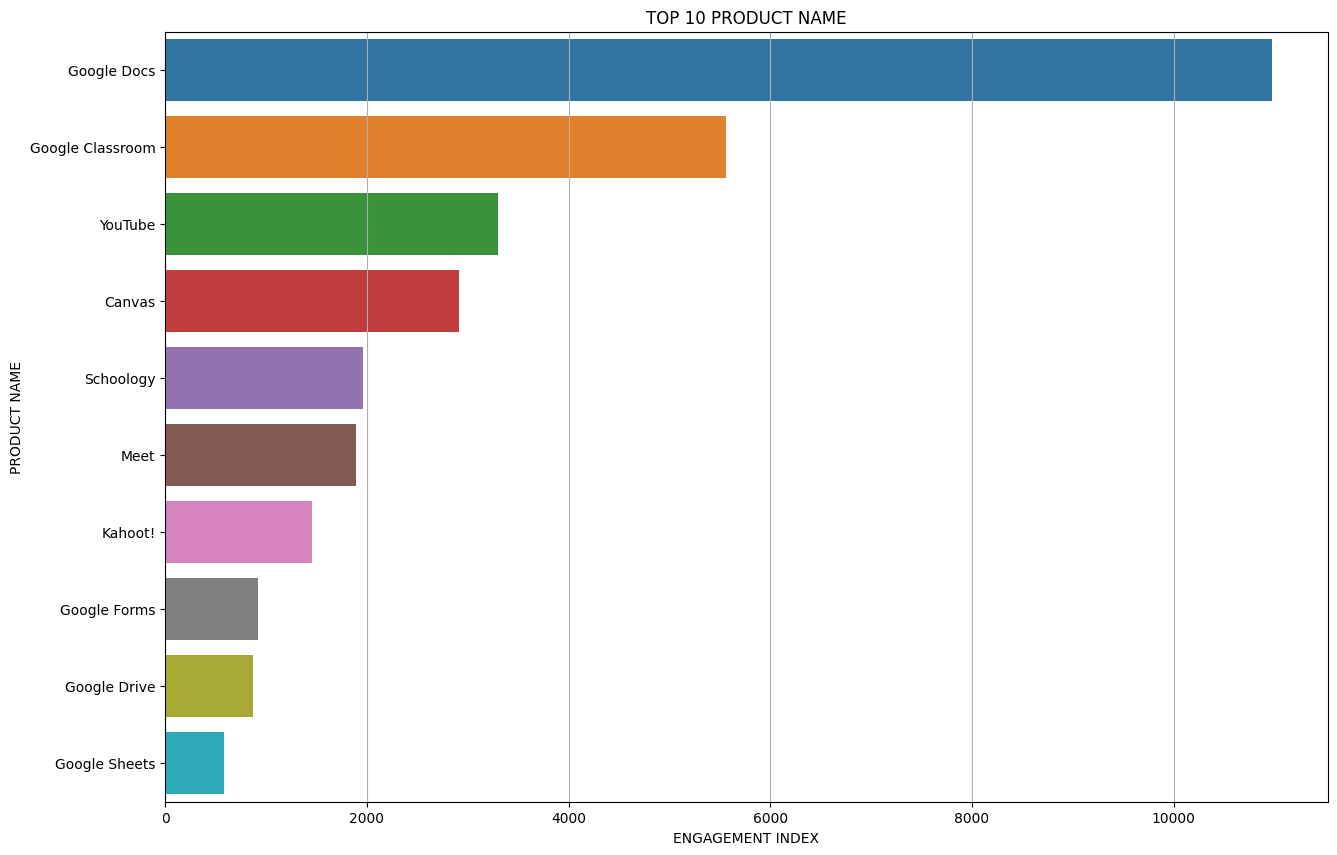

In [101]:
fig, ax = plt.subplots(figsize=[15, 10])
sns.barplot(x='engagement_index', y='Product Name', data=top___product_name[0:10], ax=ax)
ax.set_xlabel('ENGAGEMENT INDEX')
ax.set_ylabel('PRODUCT NAME')
ax.set_title('TOP 10 PRODUCT NAME')
ax.xaxis.grid(True)  # Adding grid lines only on the x-axis
plt.show()


* Prek-12;Higher Ed;Corporate category seems to dominate with respect to **engagement_index**.

---
**Q:What are the top 10 Primary Essential Function with respect to Engagement Index?**

---

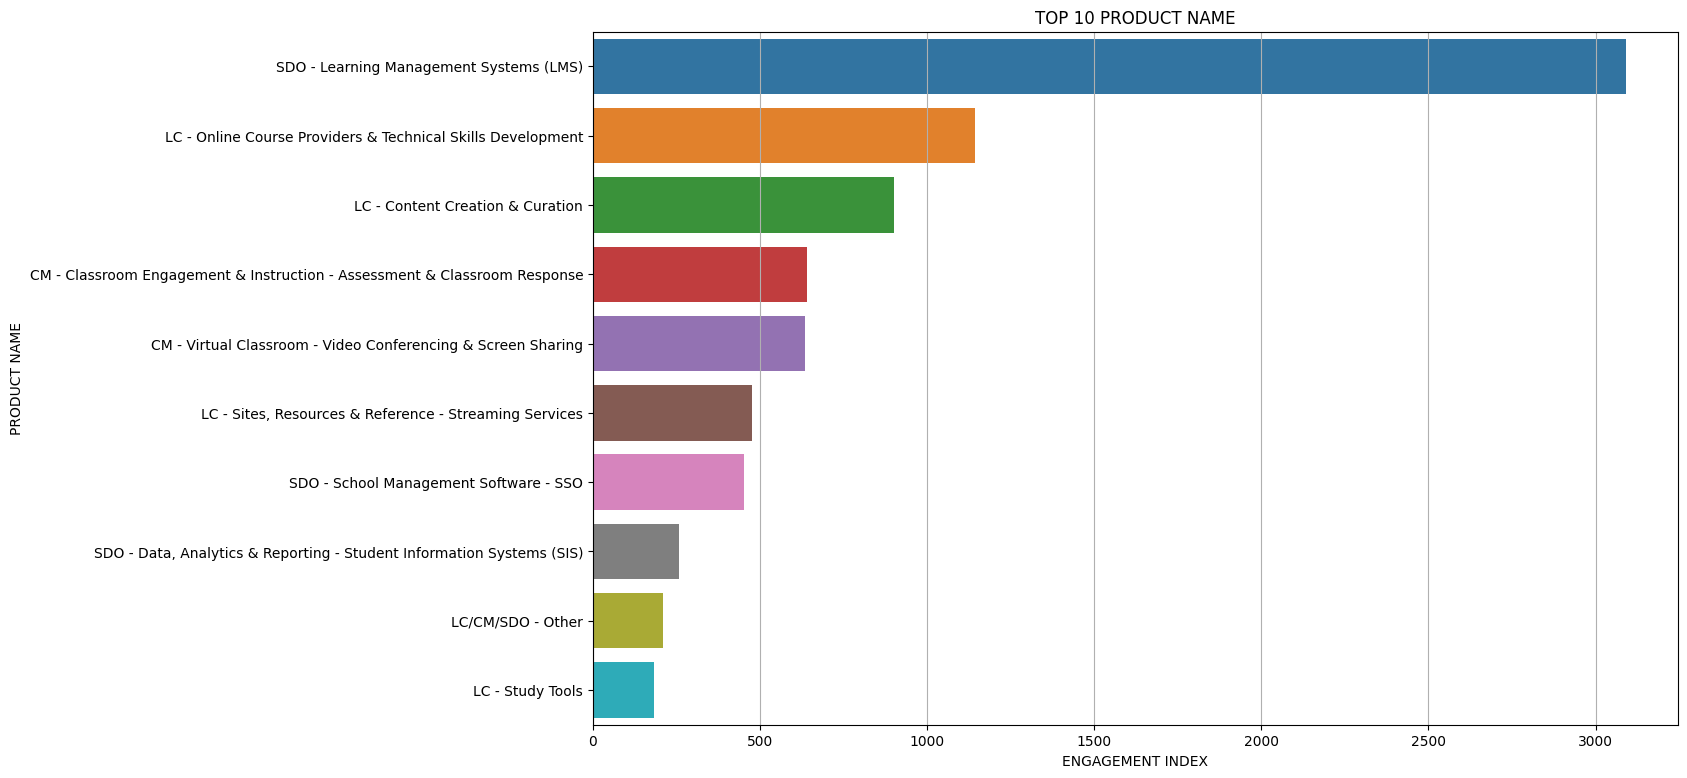

In [102]:
# Get primary essential function sorted by engagement_index
top___primary_essential = learn__Platform_data.groupby(by='Primary Essential Function', as_index=False)['engagement_index'].agg('mean').sort_values(by='engagement_index', ascending=False)

# Set plot figure size
fig, ax = plt.subplots(figsize=[14, 9])

# Plot comparison of top 10 primary essential functions
sns.barplot(x='engagement_index', y='Primary Essential Function', data=top___primary_essential[0:10], ax=ax)

# Set plot labels
ax.set_xlabel('ENGAGEMENT INDEX')
ax.set_ylabel('PRODUCT NAME')
ax.set_title('TOP 10 PRODUCT NAME')

# Adding grid lines only on the x-axis using Axes object
ax.xaxis.grid(True)

plt.show()


* SDO - Learning Management System (LMS) and LC - Online Course Provider & Technical Skills Development seems to dominate with respect to **engagement_index**.

---
**Q:What are the top Primary Essential Function in LC Level with respect to Engagement Index?**

---

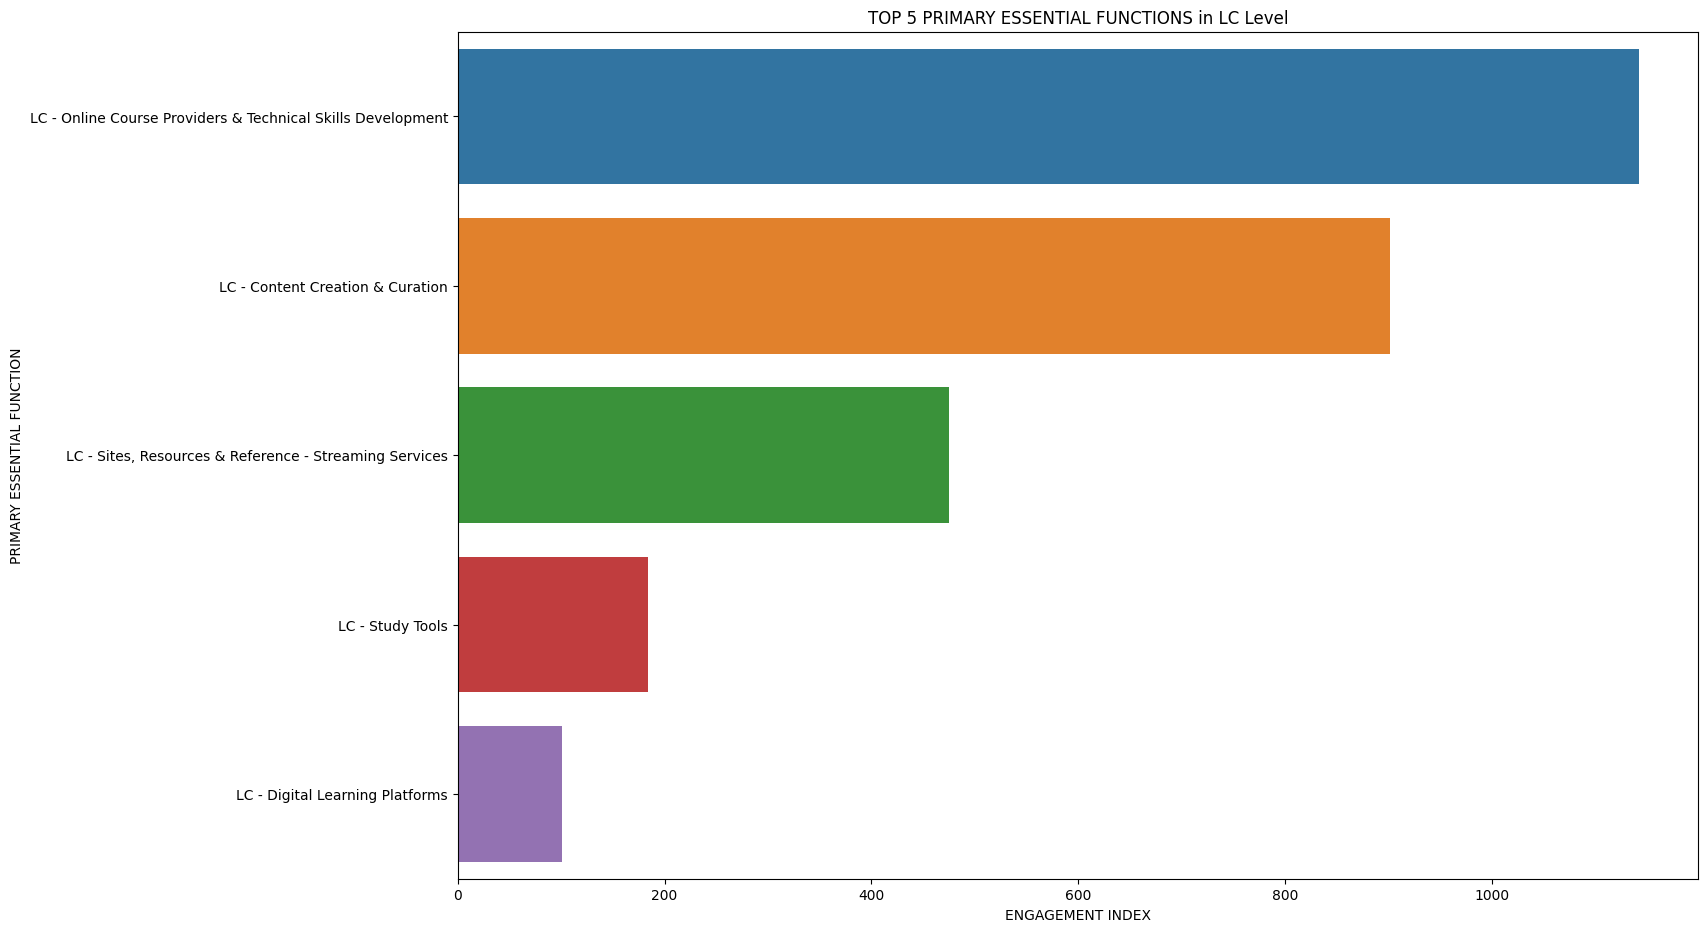

In [103]:
# Get primary essential function for LC Level sorted by engagement_index
learnPlatform__LC = learn__Platform_data[learn__Platform_data['Primary Essential Function'].str.contains("LC - ")]
top_primary__lc = learnPlatform__LC.groupby(by='Primary Essential Function', as_index=False)['engagement_index'].agg('mean').sort_values(by='engagement_index', ascending=False)

# Set plot figure size
figure = plt.figure(figsize=[16, 11])

# Plot comparison of top 5 primary essential functions for LC Level
sns.barplot(x='engagement_index', y='Primary Essential Function', data= top_primary__lc[0:5])

# Set plot labels
plt.xlabel('ENGAGEMENT INDEX')
plt.ylabel('PRIMARY ESSENTIAL FUNCTION')
plt.title('TOP 5 PRIMARY ESSENTIAL FUNCTIONS in LC Level')

# Remove the plt.grid() call
plt.show()

* LC - Online Course Provider & Technical Skills Development seems to dominate with respect to **engagement_index**.

---
**Q:What are the top Primary Essential Function in CM Level with respect to Engagement Index?**

---

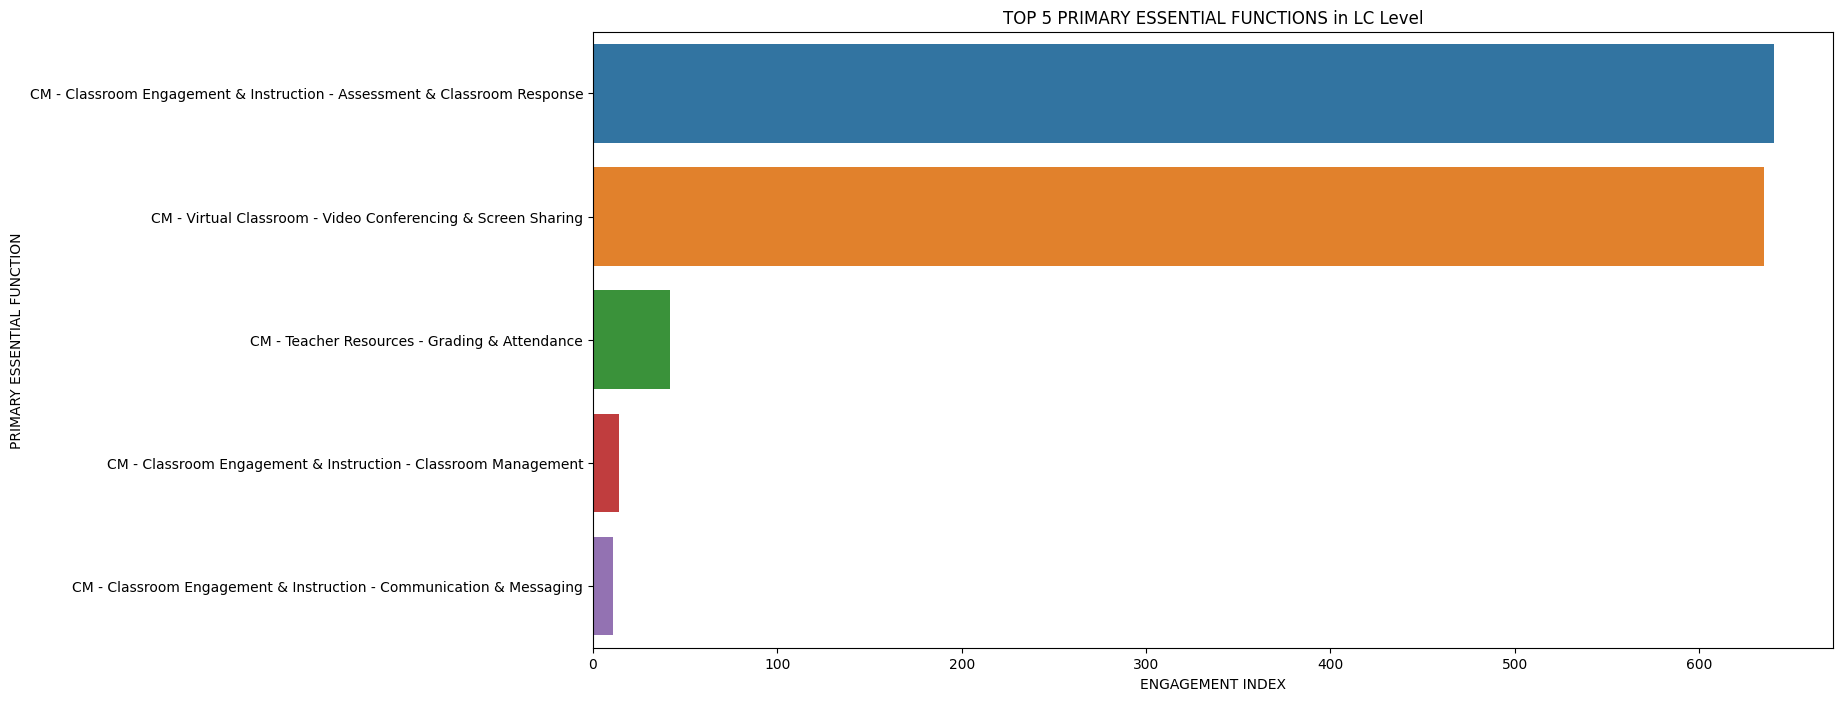

In [104]:
# Get primary essential function for CM Level sorted by engagement_index
learnPlatform___CM = learn__Platform_data[learn__Platform_data['Primary Essential Function'].str.contains("CM - ")]
top_primary_cm = learnPlatform___CM.groupby(by='Primary Essential Function', as_index=False)['engagement_index'].agg('mean').sort_values(by='engagement_index', ascending=False)

# Set plot figure size
figure = plt.figure(figsize=[16, 8])

# Plot comparison of top 5 primary essential functions for CM Level
sns.barplot(x='engagement_index', y='Primary Essential Function', data=top_primary_cm[0:5])

# Set plot labels
plt.xlabel('ENGAGEMENT INDEX')
plt.ylabel('PRIMARY ESSENTIAL FUNCTION')
plt.title('TOP 5 PRIMARY ESSENTIAL FUNCTIONS in LC Level')

# Remove the plt.grid() call
plt.show()


* CM - Classroom Engagement & Instruction - Assessment & Classroom Response followed by CM -Virtual Classroom- Video Conferencing & Screen Sharing seems to dominate with respect to **engagement_index**.

---
**Q:What are the top Primary Essential Function in SDO Level with respect to Engagement Index?**

---

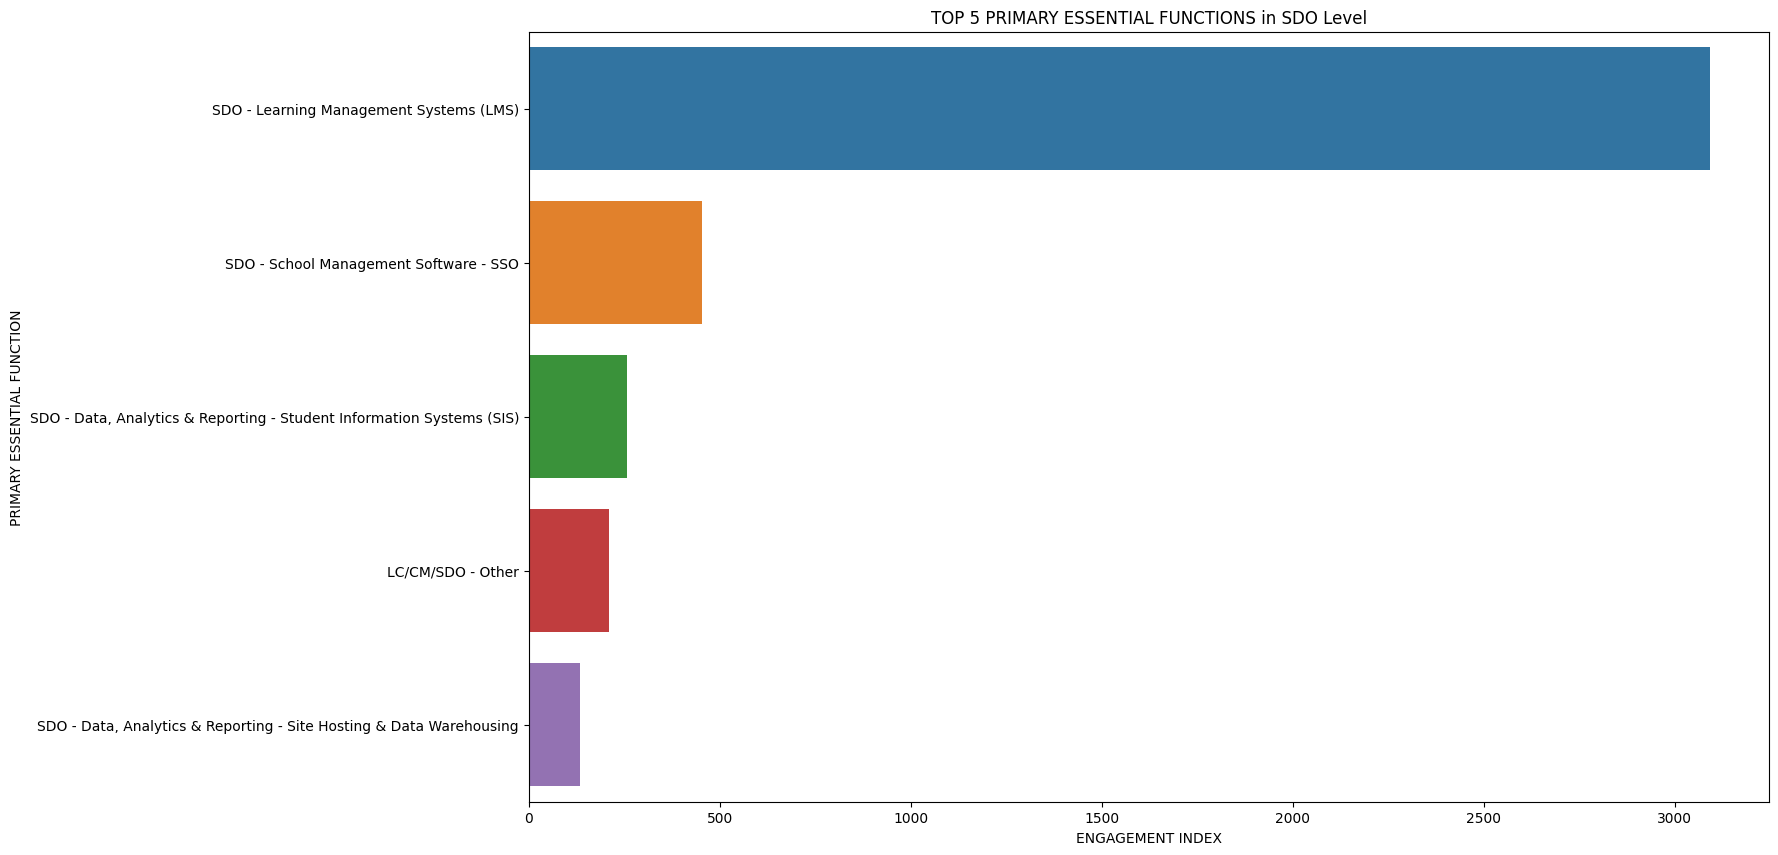

In [105]:
# Get primary essential function for SDO Level sorted by engagement_index
learn__Platform_SDO = learn__Platform_data[learn__Platform_data['Primary Essential Function'].str.contains("SDO - ")]
top_primary_sdo = learn__Platform_SDO.groupby(by='Primary Essential Function', as_index=False)['engagement_index'].agg('mean').sort_values(by='engagement_index', ascending=False)

# Set plot figure size
figure = plt.figure(figsize=[16, 10])

# Plot comparison of top 5 primary essential functions for SDO Level
sns.barplot(x='engagement_index', y='Primary Essential Function', data=top_primary_sdo[0:5])

# Set plot labels
plt.xlabel('ENGAGEMENT INDEX')
plt.ylabel('PRIMARY ESSENTIAL FUNCTION')
plt.title('TOP 5 PRIMARY ESSENTIAL FUNCTIONS in SDO Level')

# Omit the plt.grid() function to avoid the ValueError
plt.show()


* SDO - Learning Management System (LMS) seems to dominate with respect to **engagement_index**.

---
**Q:What are the top 10 States with respect to Engagement Index?**

---

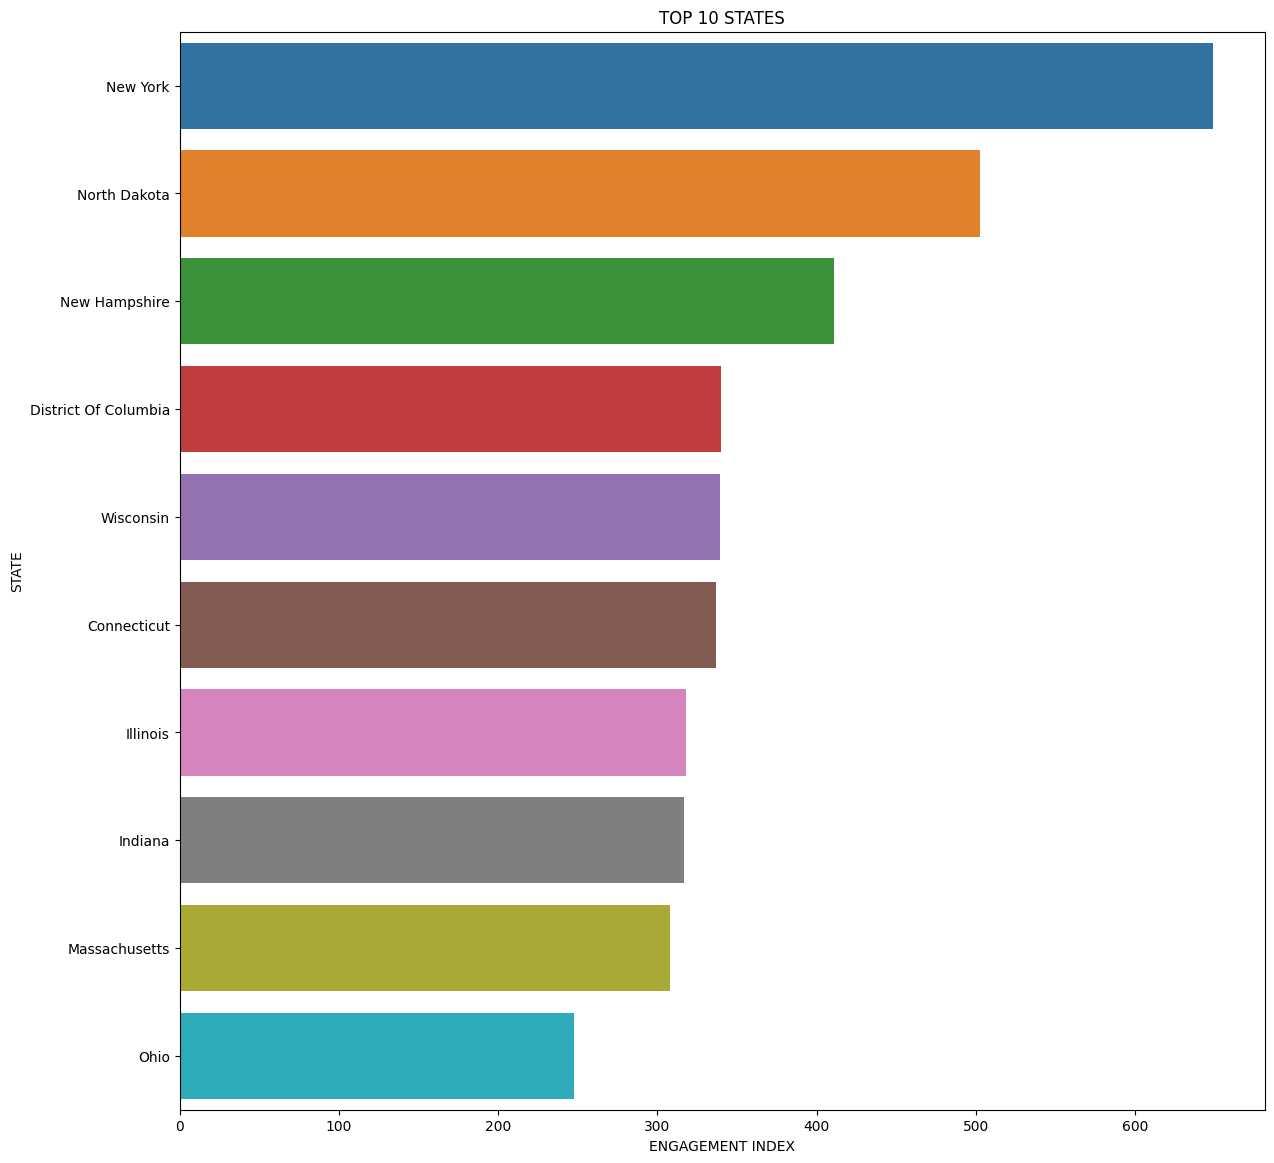

In [106]:
# Get state sorted by engagement_index
top_state = learn__Platform_data.groupby(by='state', as_index=False)['engagement_index'].agg('mean').sort_values(by='engagement_index', ascending=False)

# Set plot figure size
figure = plt.figure(figsize=[14, 14])

# Plot comparison of top 10 states
sns.barplot(x='engagement_index', y='state', data=top_state[0:10])

# Set plot labels
plt.xlabel('ENGAGEMENT INDEX')
plt.ylabel('STATE')
plt.title('TOP 10 STATES')

# Omit the plt.grid() function to avoid the ValueError
plt.show()


* New York, North Dakota followed by New Hampshire seems to dominate with respect to **enagagement_index**.

---
**Q:What are the top Locale with respect to Engagement Index?**

---

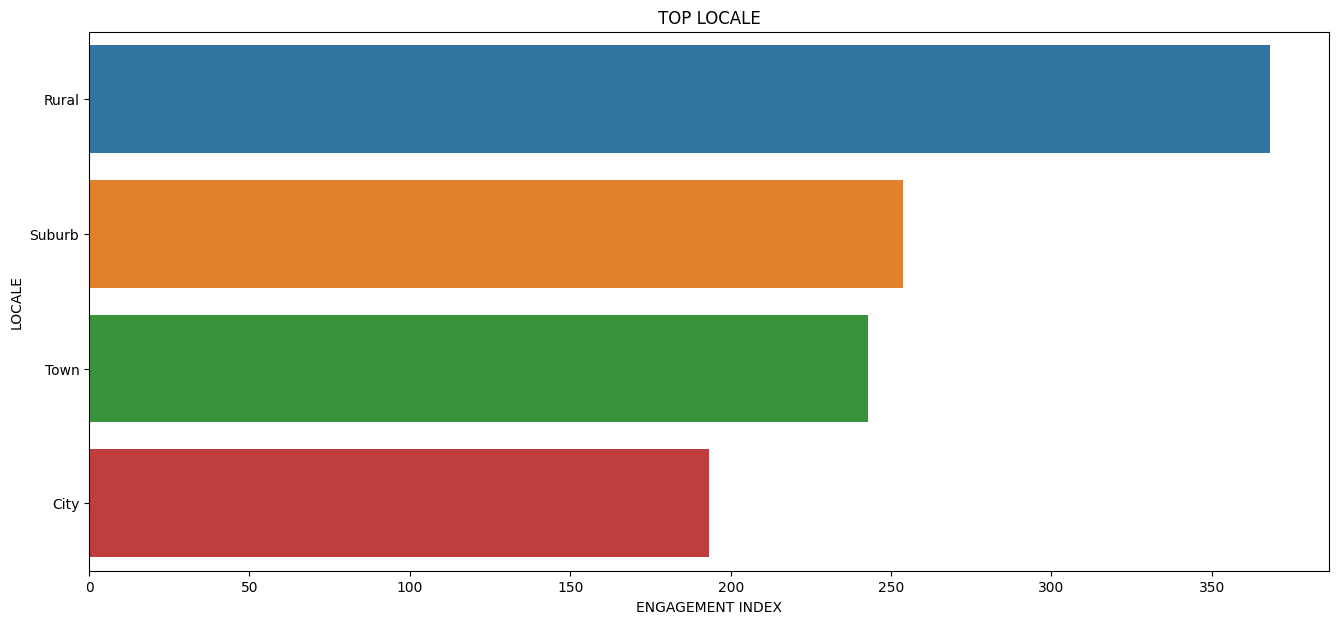

In [107]:
# Get locale sorted by engagement_index
top_locale = learn__Platform_data.groupby(by='locale', as_index=False)['engagement_index'].agg('mean').sort_values(by='engagement_index', ascending=False)

# Set plot figure size
figure = plt.figure(figsize=[16, 7])

# Plot comparison of top locales
sns.barplot(x='engagement_index', y='locale', data=top_locale[0:4])

# Set plot labels
plt.xlabel('ENGAGEMENT INDEX')
plt.ylabel('LOCALE')
plt.title('TOP LOCALE')

# Omit the plt.grid() function to avoid the ValueError
plt.show()


* Rural seems to dominate with respect to **engagement_index** followed by Suburb and Town.